# Importing fitted parameters and fitting time constants
### For data from `FERMI DiProI` endstation

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Rectangle, Circle
from scipy.optimize import curve_fit
#import xarray as xr
#import math
from labellines import labelLine, labelLines
#from matplotlib import cm
import os
import sys

import FittingDictParams as ft
import PostProcessing as pp
import misc_fctns as mf
import functions_RJ as RJ

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 6)
plt.rcParams['figure.dpi']= 200

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['mathtext.fontset'] = 'stix'

## File path and analysis options

In [3]:
path = '2D_fit_results'

# Folder name with fit results
sample = "Fit_results_v1"

# Folder with fit params
scan_fit_parmas = "Fit_params"

# Folder with fit error
scan_fit_error = "Fit_error" 

In [4]:
# Converting uJ pump to mJ/cm2
energy = np.array([1, 2.5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]) # pump energy in uJ. I got them from scan log or you can get them for h5 files in the raw data
spot_size_um = 390 # spot dia in um
fluence_mj_cm = RJ.uJ_to_mJ_cm2(energy, spot_size_um) # in mj/cm2

# Creating a list of pump fluence for creating legend in figures
fluence_list = []
for i in range (0, np.shape(fluence_mj_cm)[0]):
    fluence_list.append(f'{fluence_mj_cm[i]} mJ/cm$^2$')

## Get list of files to analyze
- This section adapted from Emmauelle Jal's example (2020-07-23)

In [5]:
# Build path for each file type; use fctn 'ls' in script file to get list of .h5 files
#============================
# importing the parameters file
try:
    path_BG = RJ.concat(3).format(path, sample, scan_fit_parmas)
    li_file_BG = mf.ls(path = path_BG,\
                  st = ".npy",\
                  show = False,\
                  ret = "name")
    nb_file_BG = len(li_file_BG)
    if nb_file_BG > 0:
        bool_BG = True
    else:
        bool_BG = False
        print("No files in the directory")
except:
    bool_BG = False
    print("No files in the directory")

#============================
# importing error files
try:
    path_OL = RJ.concat(3).format(path, sample, scan_fit_error)
    li_file_OL = mf.ls(path = path_OL,\
                  st = ".npy",\
                  show = False,\
                  ret = "name")
    nb_file_OL = len(li_file_OL)
    if nb_file_OL > 0:
        bool_OL = True
    else:
        bool_OL = False
        print("No files in the directory")
except:
    bool_OL = False
    print("No files in the directory")

In [6]:
path_BG

'2D_fit_results\\Fit_results_v1\\Fit_params'

In [7]:
if bool_BG is False:
    print("No files in the directory")
    exit()

## Loop over the lists to load data (background data first)
- This section adapted from Emmauelle Jal's example (2020-07-23)
- Note: all images are rotated 90 deg so they appear the same as on DiProI control screen

In [8]:
#============================
# Background data
if bool_BG == True:
    print()
    print("=== Fit_params ===")
    data_fit = []

    for i in range(0, nb_file_BG):
        # sometime it is impossible to get data
        try:
            name_file_BG = li_file_BG[i]
            path_BG_i = RJ.concat(2).format(path_BG, name_file_BG)
            
            fit_data     = np.load(path_BG_i)
            
            #data_fit[i] = fit_data
            data_fit.append(fit_data)
            
            print(name_file_BG)
        except:
            pass
    data_fit = np.array(data_fit)

#============================
# OL only data
if bool_OL == True:
    print()
    print("=== Fit_errors ===")
    data_error = []

    for i in range(0, nb_file_OL):
        # sometOLe it is impossible to get data
        try:
            name_file_OL = li_file_OL[i]
            path_OL_i = RJ.concat(2).format(path_OL, name_file_OL)
            
            fit_error    = np.load(path_OL_i)
            
            #data_error[i] = fit_error
            data_error.append(fit_error)
            
            print(name_file_OL)
        except:
            pass
    
    data_error = np.array(data_error)



=== Fit_params ===
1.0uJ_WX3_Y17_Scan009_Four_Har_fit_Nov28_19h_31m.h5.npy
2.5uJ_WX3_Y17_Scan011_Four_Har_fit_Nov28_20h_0m.h5.npy
WX15_Y16_Scan031_Four_Har_fit_Nov2_2h_10m.h5.npy
WX15_Y16_Scan032_Four_Har_fit_Nov2_2h_6m.h5.npy
WX15_Y16_Scan033_Four_Har_fit_Nov2_2h_2m.h5.npy
WX15_Y16_Scan034_Four_Har_fit_Nov2_1h_57m.h5.npy
WX15_Y16_Scan035_Four_Har_fit_Nov2_1h_53m.h5.npy
WX15_Y16_Scan036_Four_Har_fit_Nov2_1h_48m.h5.npy
WX15_Y16_Scan037_Four_Har_fit_Nov2_1h_44m.h5.npy
WX15_Y16_Scan038_Four_Har_fit_Nov2_1h_40m.h5.npy
WX15_Y16_Scan039_Four_Har_fit_Nov2_1h_36m.h5.npy
WX15_Y16_Scan040_Four_Har_fit_Nov2_1h_33m.h5.npy
WX15_Y16_Scan041_Four_Har_fit_Nov2_1h_29m.h5.npy

=== Fit_errors ===
1.0uJ_WX3_Y17_Scan009_Four_Har_fit_Nov28_19h_31m.h5.npy
2.5uJ_WX3_Y17_Scan011_Four_Har_fit_Nov28_20h_0m.h5.npy
WX15_Y16_Scan031_Four_Har_fit_Nov2_2h_10m.h5.npy
WX15_Y16_Scan032_Four_Har_fit_Nov2_2h_6m.h5.npy
WX15_Y16_Scan033_Four_Har_fit_Nov2_2h_2m.h5.npy
WX15_Y16_Scan034_Four_Har_fit_Nov2_1h_57m.h5.npy
WX15_Y1

C:\Users\Rahul\AppData\Local\Temp\ipykernel_26208\3252354420.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_fit = np.array(data_fit)
C:\Users\Rahul\AppData\Local\Temp\ipykernel_26208\3252354420.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_error = np.array(data_error)


In [9]:
# Remvoing outliers from the delay scans so time constants fits don't give large error bars
remove_bad_data = True

In [10]:
if remove_bad_data == True:
    # Removing data from 1st fit params file
    data_fit[0] = np.delete(data_fit[0], 0, axis = 0)
    # Removing data from 1st error file
    data_error[0] = np.delete(data_error[0], 0, axis = 0)
    
    
    # Removing data from 2nd fit params file
    data_fit[1] = np.delete(data_fit[1], 23, axis = 0)
    data_fit[1] = np.delete(data_fit[1], 22, axis = 0)
    data_fit[1] = np.delete(data_fit[1], 0, axis = 0)
    # Removing data from 2nd error file
    data_error[1] = np.delete(data_error[1], 23, axis = 0)
    data_error[1] = np.delete(data_error[1], 22, axis = 0)
    data_error[1] = np.delete(data_error[1], 0, axis = 0)
    
    ## Removing data from 3rd fit params file
    #data_fit[2] = np.delete(data_fit[2], 27, axis = 0)
    #data_fit[2] = np.delete(data_fit[2], 26, axis = 0)
    data_fit[2] = np.delete(data_fit[2], 18, axis = 0)
    data_fit[2] = np.delete(data_fit[2], 17, axis = 0)
    #data_fit[2] = np.delete(data_fit[2], 14, axis = 0)
    ## Removing data from 3rd error file
    #data_error[2] = np.delete(data_error[2], 27, axis = 0)
    #data_error[2] = np.delete(data_error[2], 26, axis = 0)
    data_error[2] = np.delete(data_error[2], 18, axis = 0)
    data_error[2] = np.delete(data_error[2], 17, axis = 0)
    #data_error[2] = np.delete(data_error[2], 14, axis = 0)
    
    # Removing data from 4th fit params file
    data_fit[3] = np.delete(data_fit[3], 27, axis = 0)
    # Removing data from 4th error file
    data_error[3] = np.delete(data_error[3], 27, axis = 0)
    
#     data_fit[6] = np.delete(data_fit[6], 2, axis = 0)
#     data_error[6] = np.delete(data_error[6], 2, axis = 0)
    
    data_fit[8] = np.delete(data_fit[8], 6, axis = 0)
    data_error[8] = np.delete(data_error[8], 6, axis = 0)
else:
    pass

# Plotting all fit parameters

In [11]:
# Define which specific scans to plot
scans_to_plot2 = np.linspace(0, 6, 7, dtype=int)
scans_to_plot = np.linspace(6, 0, 7, dtype=int)

In [12]:
print(scans_to_plot2)
print(scans_to_plot)

[0 1 2 3 4 5 6]
[6 5 4 3 2 1 0]


In [13]:
def plot_errorbars(x, y, yerr, **kwargs):
    #import pdb ; pdb.set_trace()
    #global color , color = color
    p = plt.plot(x, y, **kwargs)
    pfb = plt.fill_between(x, y - yerr, y + yerr, alpha=0.3)
    return p

In [14]:
def plot_errorbars1(x, y, yerr, **kwargs):
    #import pdb ; pdb.set_trace()
    global color #, color = color
    p = plt.plot(x, y, **kwargs)
    pfb = plt.fill_between(x, y - yerr, y + yerr, color = color, alpha=0.3)
    return p

## Plotting ring amp A0

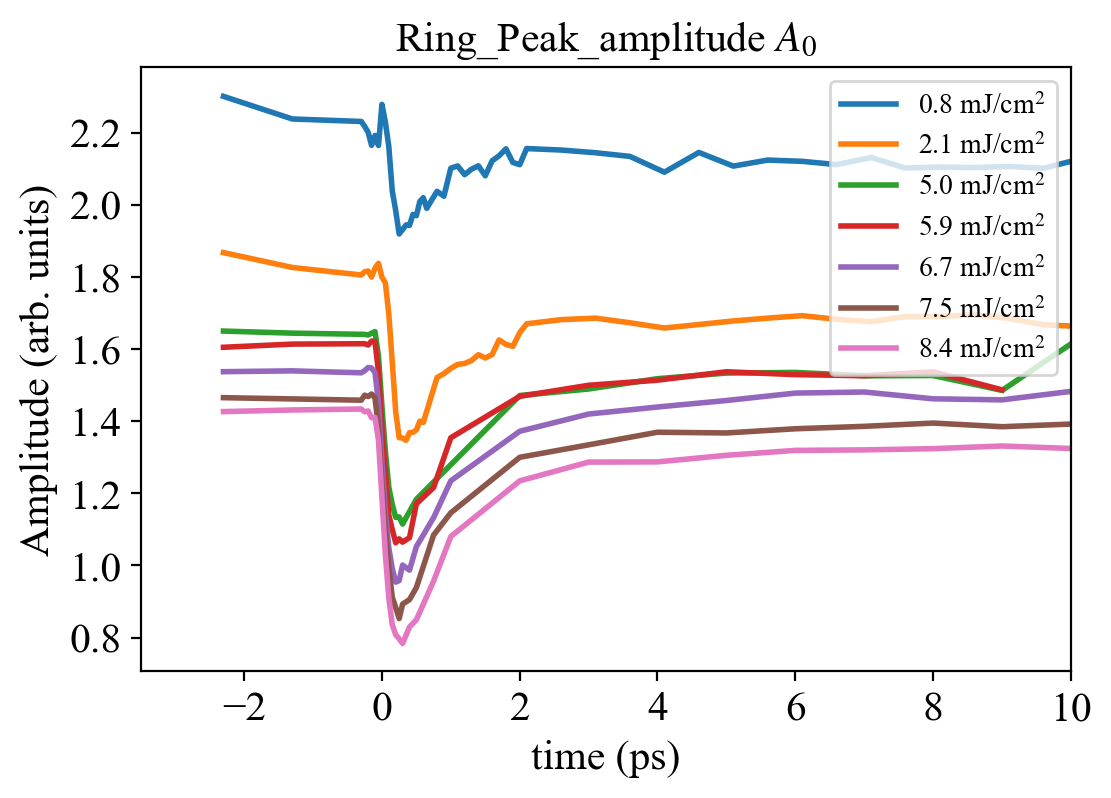

In [15]:
# Plotting Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
index = 4
for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], data_fit[i][ :, index], data_error[i][ :, index], linewidth=2, label = fluence_list[i])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])

plt.legend()
plt.xlim(-3.5, 10)
plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Amplitude (arb. units)',fontsize=15)

plt.title('Ring_Peak_amplitude $A_0$',fontsize=15)

plt.show()

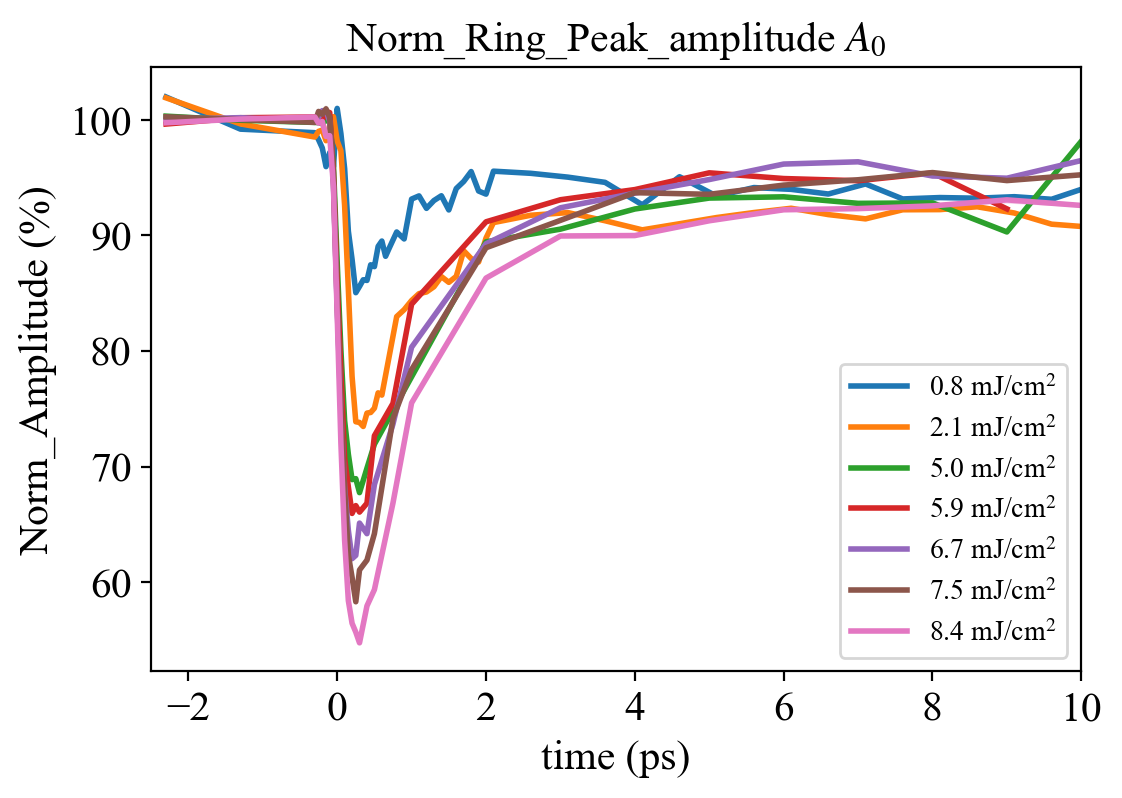

In [16]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
index = 4
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')

for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))*100,\
                       data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index]))*100, linewidth=2, label = fluence_list[i])
        #plot_errorbars(data_fit[i, :, 0], data_fit[i, :, 3]-data_fit[i, 0, 3], data_error[i, :, 3], linewidth=2)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude (%)',fontsize=15)

#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
plt.xlim(-2.5, 10)
plt.legend()

plt.title('Norm_Ring_Peak_amplitude $A_0$',fontsize=15)
plt.show()

c:\Users\Rahul\anaconda3\envs\Fermi_Analysis\lib\site-packages\labellines\core.py:148: UserWarning: Tried to label line Line2D(_child0), but could not find a label for it.
  warnings.warn(


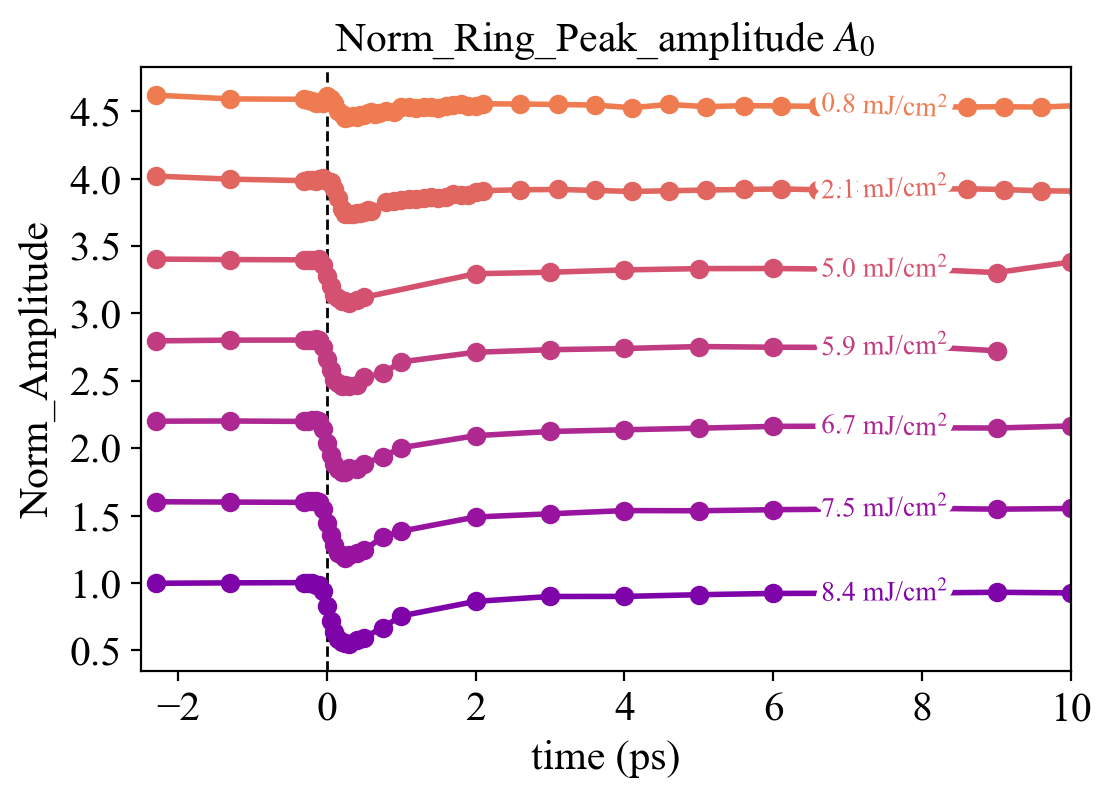

In [17]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
index = 4
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')

plt.axvline(x=0, color = "black", linestyle = "--", linewidth = 1)
cmap = plt.get_cmap('plasma')
counter1 = 3.5
counter2 = 0
test_marker = ["o", 'v', "^", "<", ">", "s" ]
for i in scans_to_plot:
    #if (i % 2) == 0:
    color = cmap(float(counter1)/np.shape(scans_to_plot)[0]/2)
    plot_errorbars1(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index])) + 0.6*counter2,\
               data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index])), c = color, marker = "o", linewidth=2, label = fluence_list[i])

    counter1 = counter1 + 1
    counter2 = counter2 + 1

labelLines(plt.gca().get_lines(),xvals=(7.5, 7.5), zorder=2.5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude',fontsize=15)

plt.xlim(-2.5, 10)
#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])

#plt.legend()

plt.title('Norm_Ring_Peak_amplitude $A_0$',fontsize=15)
plt.show()

## Plotting 1st harm Amp A1

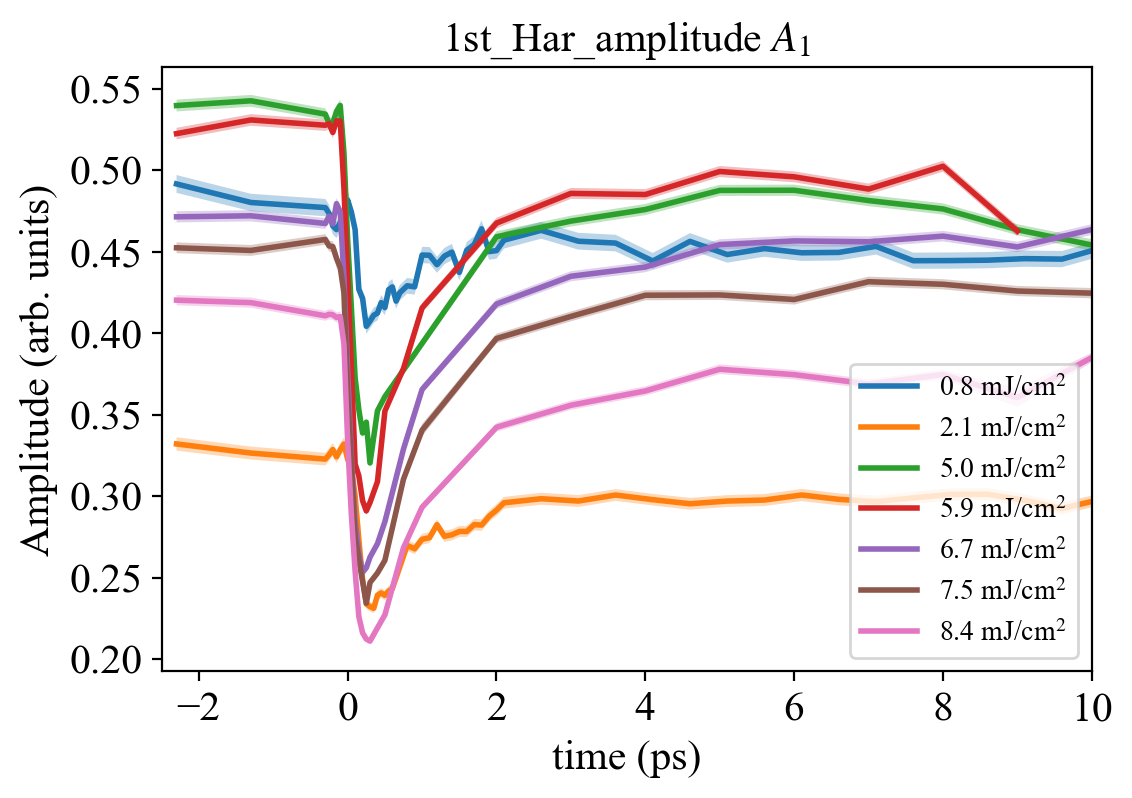

In [18]:
# Plotting Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
index = 7

for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], data_fit[i][ :, index], data_error[i][ :, index], linewidth=2, label = fluence_list[i])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
plt.legend()
plt.xlim(-2.5, 10)
plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Amplitude (arb. units)',fontsize=15)

plt.title('1st_Har_amplitude $A_1$',fontsize=15)

plt.show()

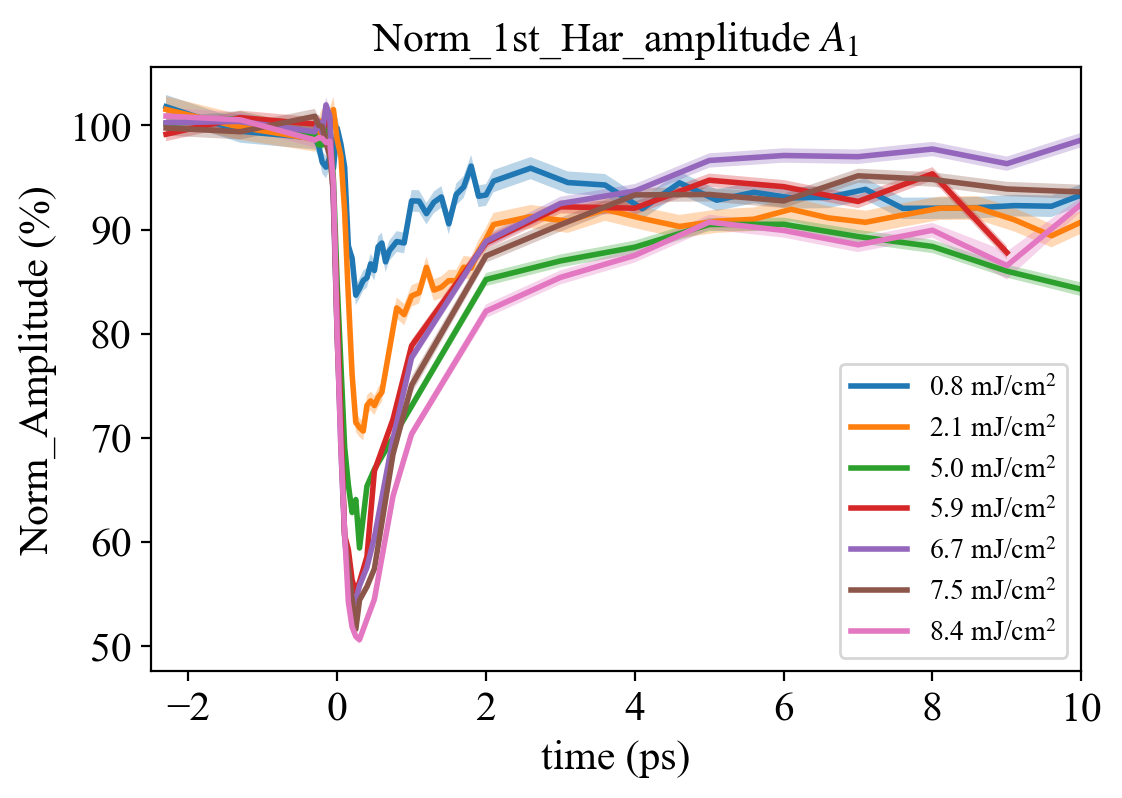

In [19]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
index = 7
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')

for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))*100,\
                       data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index]))*100, linewidth=2, label = fluence_list[i])
        #plot_errorbars(data_fit[i, :, 0], data_fit[i, :, 3]-data_fit[i, 0, 3], data_error[i, :, 3], linewidth=2)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude (%)',fontsize=15)

#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
plt.legend()
plt.xlim(-2.5, 10)
plt.title('Norm_1st_Har_amplitude $A_1$',fontsize=15)
plt.show()

c:\Users\Rahul\anaconda3\envs\Fermi_Analysis\lib\site-packages\labellines\core.py:148: UserWarning: Tried to label line Line2D(_child0), but could not find a label for it.
  warnings.warn(


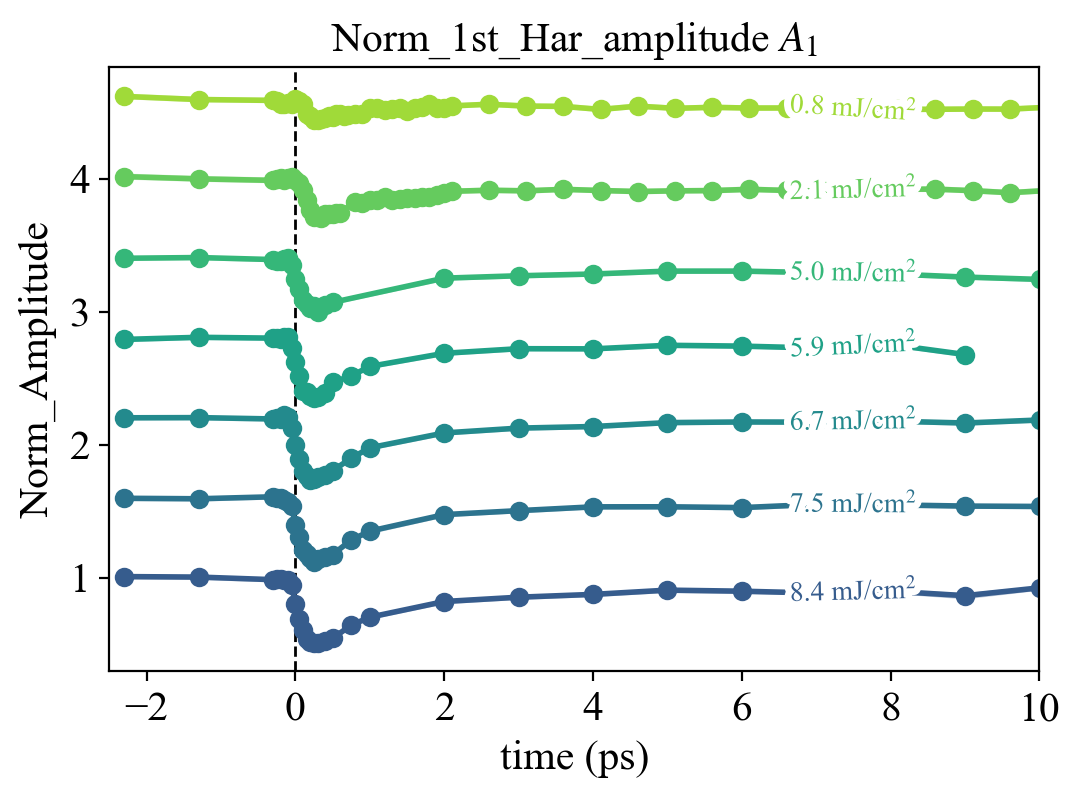

In [20]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
index = 7
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')

plt.axvline(x=0, color = "black", linestyle = "--", linewidth = 1)
cmap = plt.get_cmap('viridis')
counter1 = 3
counter2 = 0
test_marker = ["o", 'v', "^", "<", ">", "s" ]
for i in scans_to_plot:
    #if (i % 2) == 0:
    color = cmap(float(counter1)/np.shape(scans_to_plot)[0]/1.5)
    plot_errorbars1(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index])) + 0.6*counter2,\
               data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index])), c = color, marker = "o", linewidth=2, label = fluence_list[i])

    counter1 = counter1 + 1
    counter2 = counter2 + 1

labelLines(plt.gca().get_lines(),xvals=(7.5, 7.5), zorder=2.5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude',fontsize=15)
plt.xlim(-2.5, 10)
#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
#plt.legend()

plt.title('Norm_1st_Har_amplitude $A_1$',fontsize=15)
plt.show()

## Plotting 3rd harm Amp A3

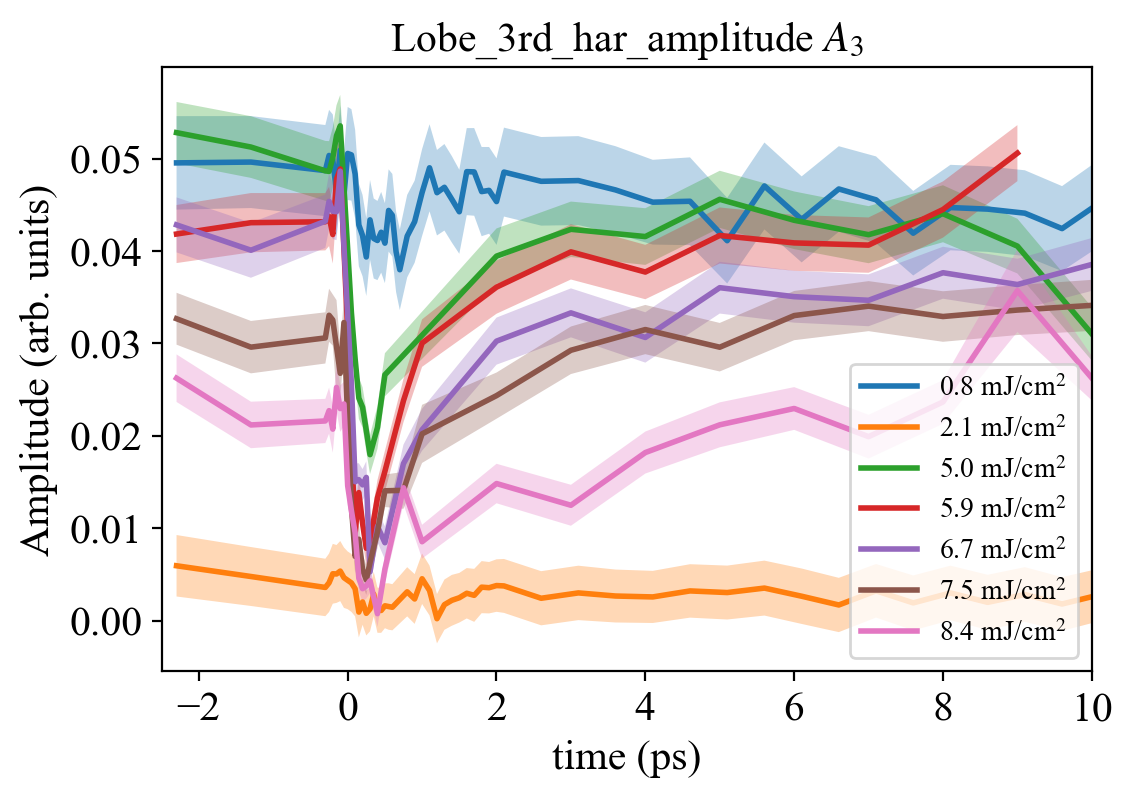

In [21]:
# Plotting Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
index = 8

for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], (data_fit[i][ :, index]), data_error[i][ :, index], linewidth=2, label = fluence_list[i])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
plt.legend()
plt.xlim(-2.5, 10)
plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Amplitude (arb. units)',fontsize=15)

plt.title('Lobe_3rd_har_amplitude $A_3$',fontsize=15)

plt.show()

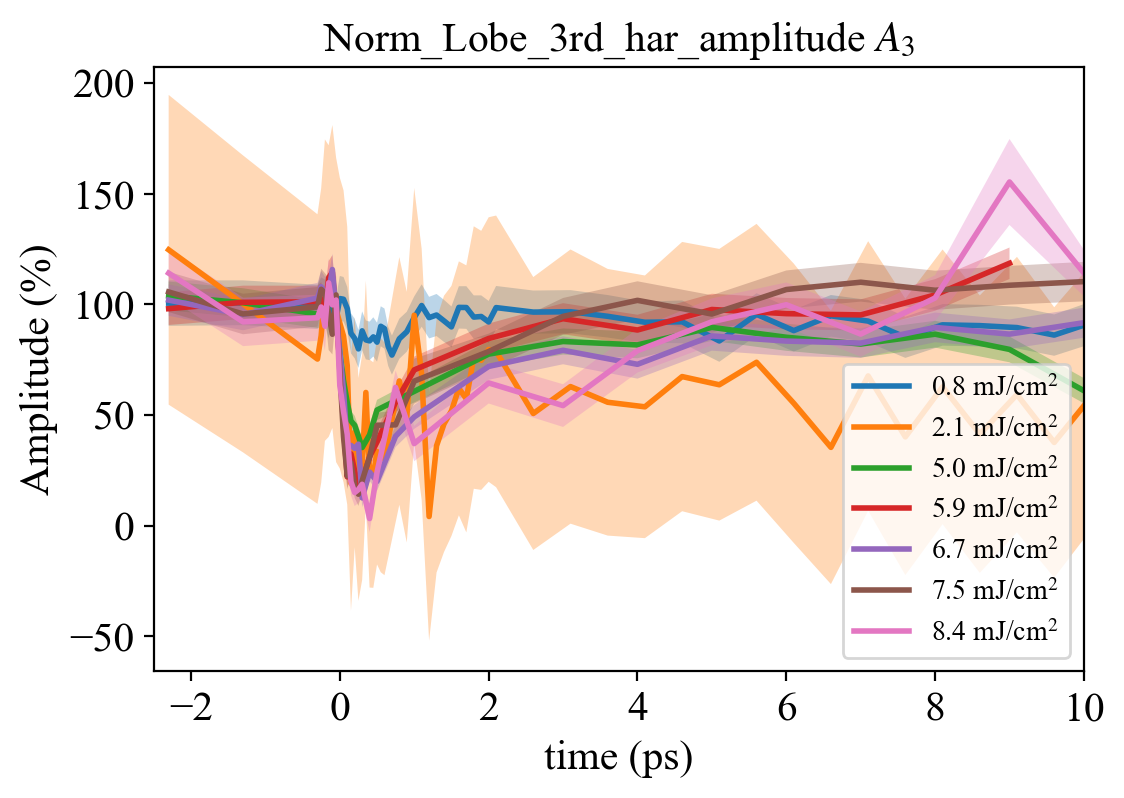

In [22]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
index = 8
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')

for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))*100,\
                       data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index]))*100, linewidth=2, label = fluence_list[i])
        #plot_errorbars(data_fit[i, :, 0], data_fit[i, :, 3]-data_fit[i, 0, 3], data_error[i, :, 3], linewidth=2)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Amplitude (%)',fontsize=15)

#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ','8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
plt.legend()
plt.xlim(-2.5, 10)
plt.title('Norm_Lobe_3rd_har_amplitude $A_3$',fontsize=15)
plt.show()

c:\Users\Rahul\anaconda3\envs\Fermi_Analysis\lib\site-packages\labellines\core.py:148: UserWarning: Tried to label line Line2D(_child0), but could not find a label for it.
  warnings.warn(


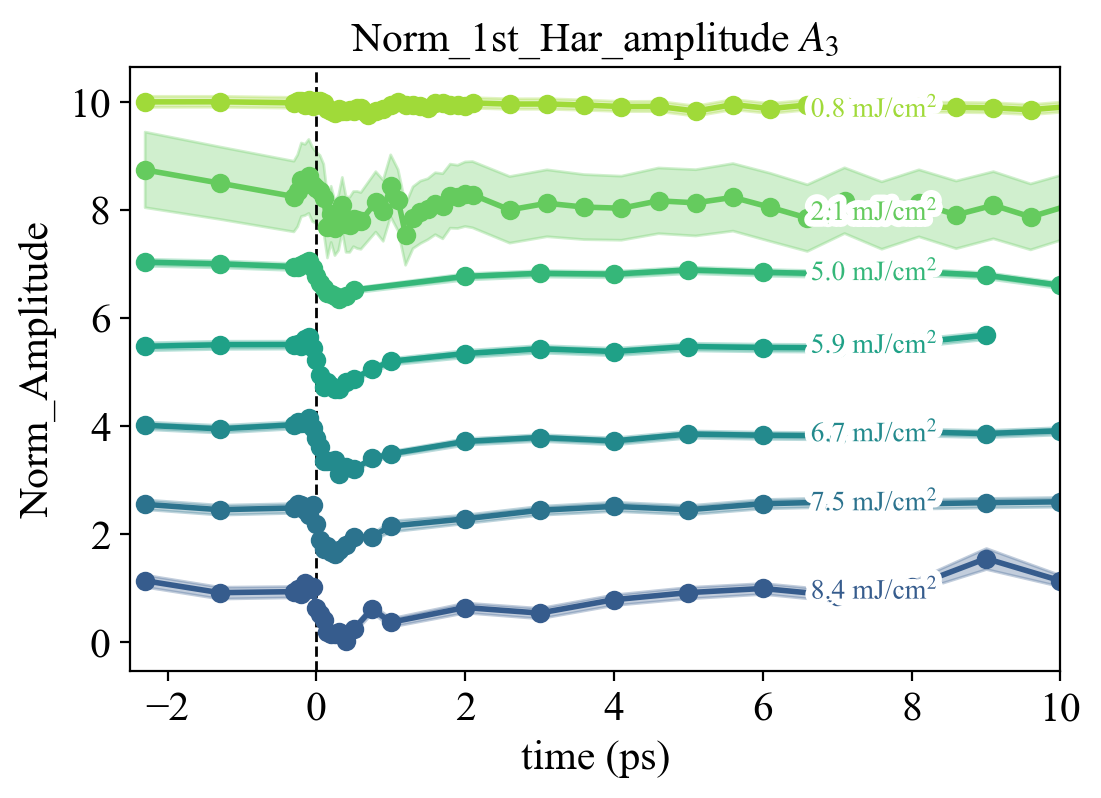

In [23]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
index = 8
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')

plt.axvline(x=0, color = "black", linestyle = "--", linewidth = 1)
cmap = plt.get_cmap('viridis')
counter1 = 3
counter2 = 0
test_marker = ["o", 'v', "^", "<", ">", "s" ]
for i in scans_to_plot:
    #if (i % 2) == 0:
    color = cmap(float(counter1)/np.shape(scans_to_plot)[0]/1.5)
    plot_errorbars1(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index])) + 1.5*counter2,\
               data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index])), c = color, marker = "o", linewidth=2, label = fluence_list[i])

    counter1 = counter1 + 1
    counter2 = counter2 + 1

labelLines(plt.gca().get_lines(),xvals=(7.5, 7.5), align = False, zorder=2.5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude',fontsize=15)
plt.xlim(-2.5, 10)
#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
#plt.legend()

plt.title('Norm_1st_Har_amplitude $A_3$',fontsize=15)
plt.show()

## Plotting 2nd harm Amp A2

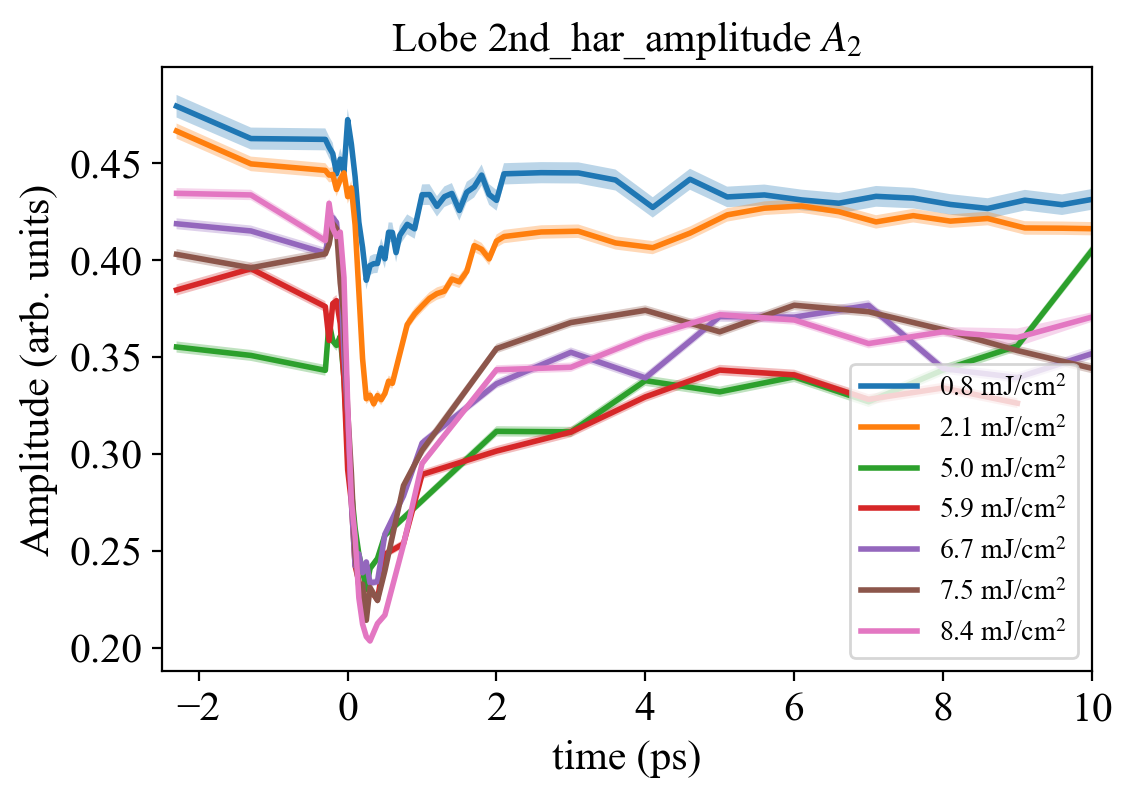

In [24]:
# Plotting Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
index = 12

for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], abs(data_fit[i][ :, index]), data_error[i][ :, index], linewidth=2, label = fluence_list[i])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

plt.legend()
plt.xlim(-2.5, 10)
plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Amplitude (arb. units)',fontsize=15)

plt.title('Lobe 2nd_har_amplitude $A_2$',fontsize=15)

plt.show()

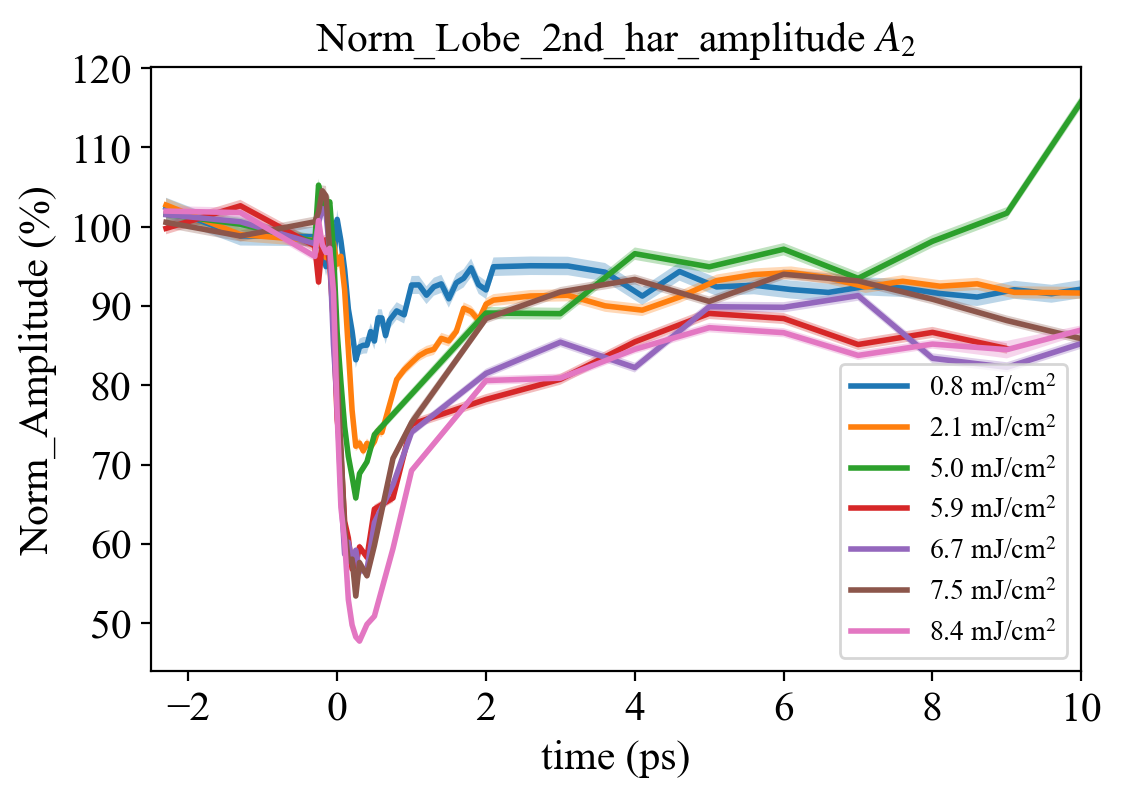

In [25]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
index = 12
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')

for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))*100,\
                       data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index]))*100, linewidth=2, label = fluence_list[i])
        #plot_errorbars(data_fit[i, :, 0], data_fit[i, :, 3]-data_fit[i, 0, 3], data_error[i, :, 3], linewidth=2)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude (%)',fontsize=15)

#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

plt.legend()
plt.xlim(-2.5, 10)
plt.title('Norm_Lobe_2nd_har_amplitude $A_2$',fontsize=15)
plt.show()

c:\Users\Rahul\anaconda3\envs\Fermi_Analysis\lib\site-packages\labellines\core.py:148: UserWarning: Tried to label line Line2D(_child0), but could not find a label for it.
  warnings.warn(


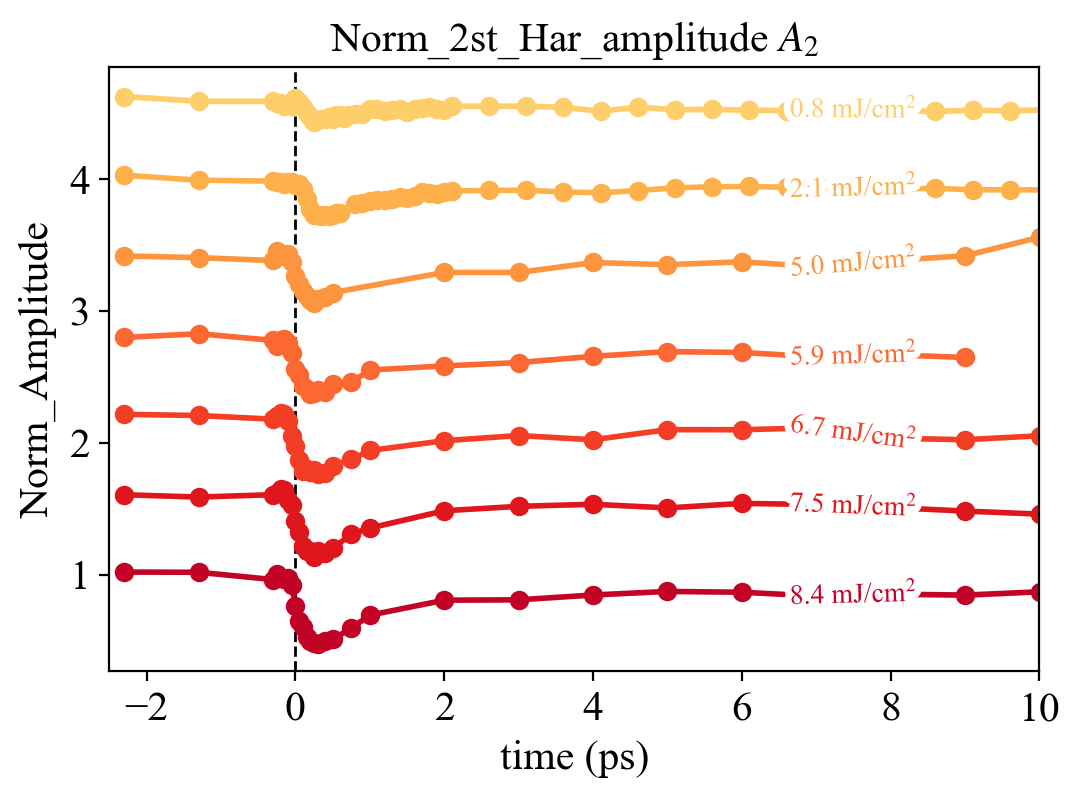

In [26]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
index = 12
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')

plt.axvline(x=0, color = "black", linestyle = "--", linewidth = 1)
cmap = plt.get_cmap('YlOrRd')
counter1 = 9
counter2 = 0
test_marker = ["o", 'v', "^", "<", ">", "s" ]
for i in scans_to_plot:
    #if (i % 2) == 0:
    color = cmap(float(counter1)/np.shape(scans_to_plot)[0]/1.5)
    plot_errorbars1(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index])) + 0.6*counter2,\
               data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index])), c = color, marker = "o", linewidth=2, label = fluence_list[i])

    counter1 = counter1 - 1
    counter2 = counter2 + 1

labelLines(plt.gca().get_lines(),xvals=(7.5, 7.5), zorder=2.5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude',fontsize=15)
plt.xlim(-2.5, 10)


plt.title('Norm_2st_Har_amplitude $A_2$',fontsize=15)
plt.show()

## Plotting 4th harm Amp A4

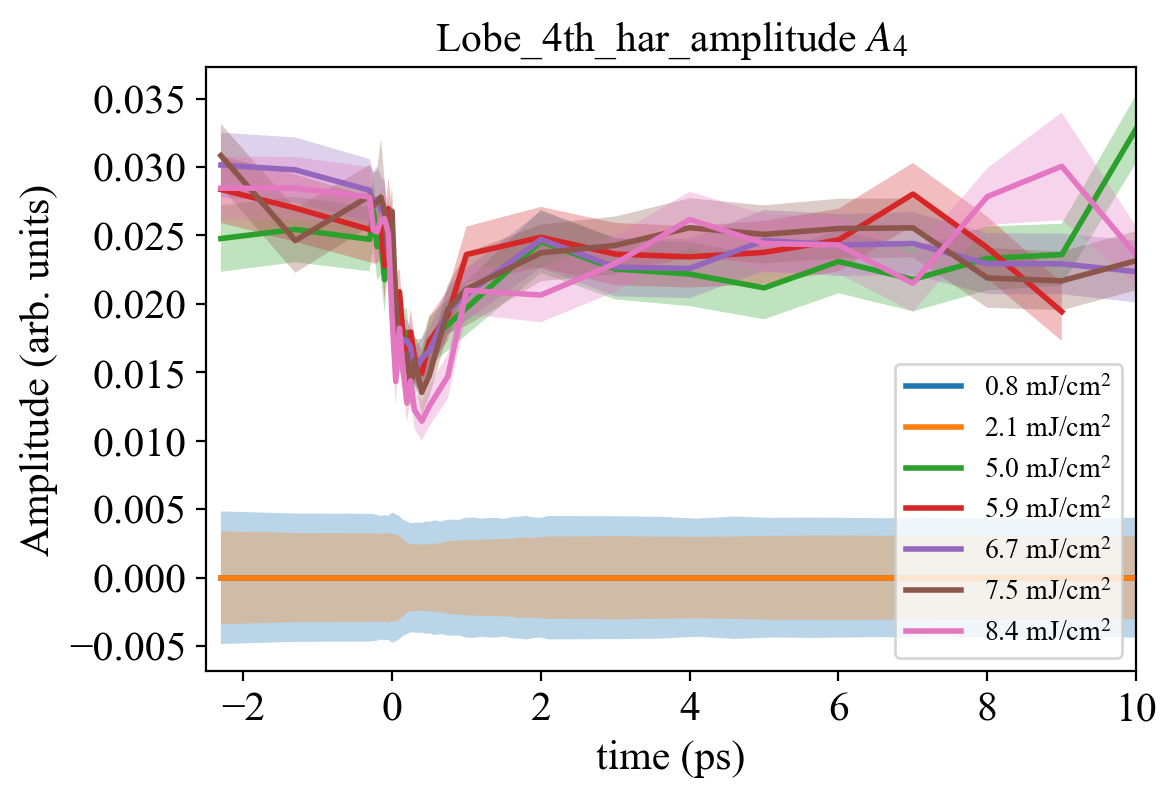

In [27]:
# Plotting Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
index = 13

for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], (data_fit[i][ :, index]), data_error[i][ :, index], linewidth=2, label = fluence_list[i])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

plt.legend()
plt.xlim(-2.5, 10)
plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Amplitude (arb. units)',fontsize=15)

plt.title('Lobe_4th_har_amplitude $A_4$',fontsize=15)

plt.show()

# Doing time constant fits

## Importing modules

In [28]:
# Importing modules for Nanna's code
import re
import time

from scipy.special import erf, erfc
import scipy.integrate as integrate
from scipy.fftpack import fft
#import lmfit
from lmfit import CompositeModel, Model # you need to install lmfit, installation via pip install lmfit

import pickle
import pandas as pd
import math
#import gif

# Simulating data

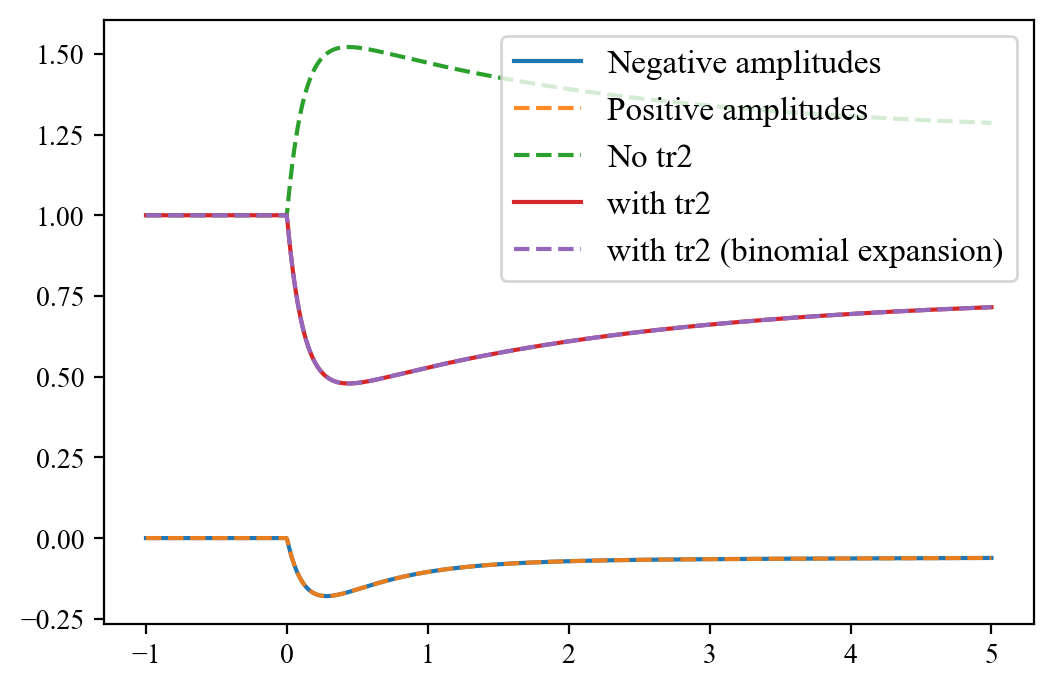

In [29]:
# checking the functions
n_pts = 1000
x = np.linspace(-1, 5 , n_pts)
plt.figure()
#plt.plot(x, gaussian(x, 5, 0.5))
y0  =  RJ.jumpdecay_VUV_neg(x, -0.26, -0.07, 0,  0.130, 0.520, 17) #+ 0.01 * np.random.randn(n_pts)
y00  =  RJ.jumpdecay_VUV(x, 0.26, 0.07, 0,  0.130, 0.520, 17) #+ 0.01 * np.random.randn(n_pts)
y  =  RJ.jumpdecay(x, -0.6, -0.35, 1, 0, 0.12, 2.2) #+ 0.01 * np.random.randn(n_pts)
y1 = RJ.jumpdecay1(x, 0.6, 0.35, 1, 0, 0.12, 2.2, 500) #+ 0.01 * np.random.randn(n_pts)
y2 = RJ.jumpdecay2(x, 0.6, 0.35, 1, 0, 0.12, 2.2, 500) #+ 0.01 * np.random.randn(n_pts)
taille = 12
plt.plot(x, y0, label='Negative amplitudes')
plt.plot(x, y00, '--', alpha =0.9, label='Positive amplitudes')
plt.plot(x, y,'--', label='No tr2')
plt.plot(x, y1, label='with tr2')
plt.plot(x, y2,'--', label='with tr2 (binomial expansion)')
#plt.plot(x, y0, label='No last term')
#plt.plot(x, gaussian_convolution(x, y, 0.01))
# x = np.reshape(x, (n_pts, 1))
# g = np.exp(-(x - x.T)**2/(2*0.1**2))
# print(g.shape)
#plt.plot(x, g[:, 700])
#plt.plot(x, vec_gaussian_convolution(x, y0, 0.04), color='k', label='Convolved with Gaussian')
#plt.plot(x, vec_gaussian_convolution(x, y, 0.08), color='k', label='Convolved with Gaussian')
#plt.plot(x, vec_gaussian_convolution(x, y1, 0.08), color='k')
#plt.plot(x, vec_gaussian_convolution(x, y2, 0.08), color='k')
#plt.plot(x, vec_gaussian_convolution(x, y0, 0.08), color='k')
#plt.ylim(-0.2, +0.05)
plt.legend(fontsize = taille)

In [30]:
# x = np.reshape(x, (n_pts, 1))
# g = np.exp(-(x - x.T)**2/(2*0.1**2))
# print(g.shape)

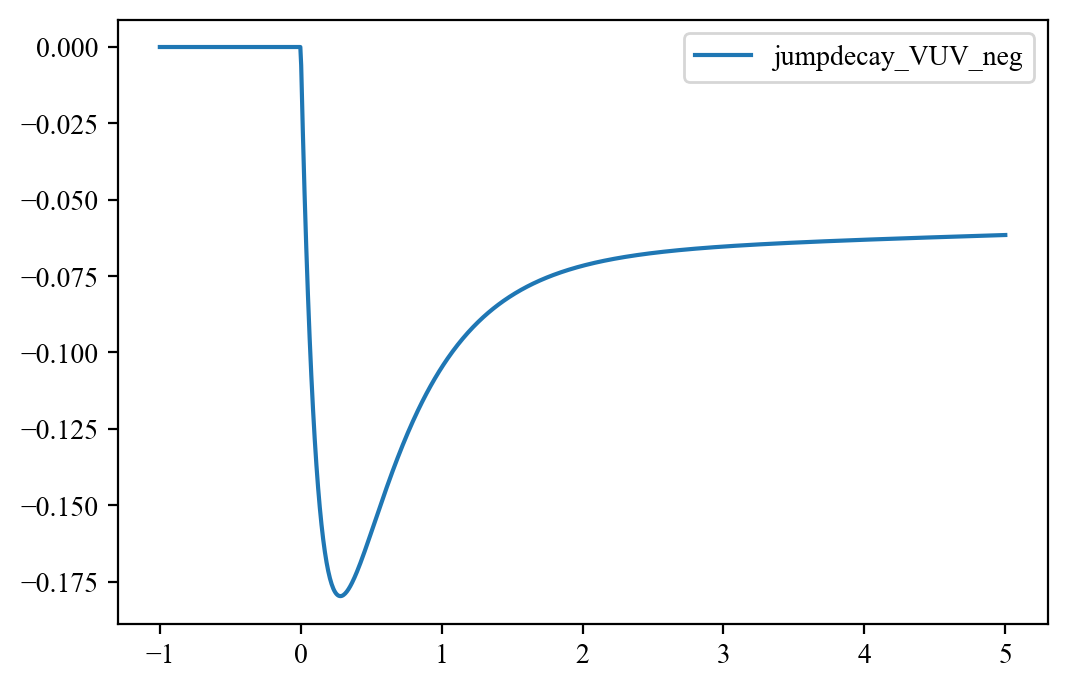

In [31]:
plt.plot(x, y0, label = 'jumpdecay_VUV_neg')
plt.legend()

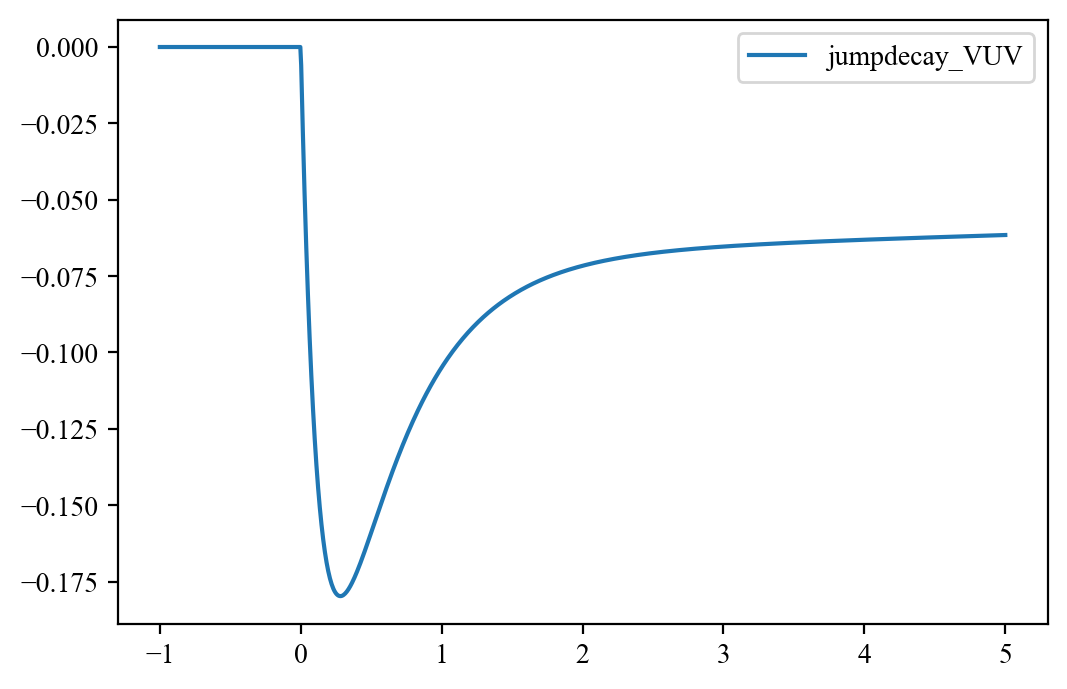

In [32]:
plt.plot(x, y00, label = 'jumpdecay_VUV')
plt.legend()

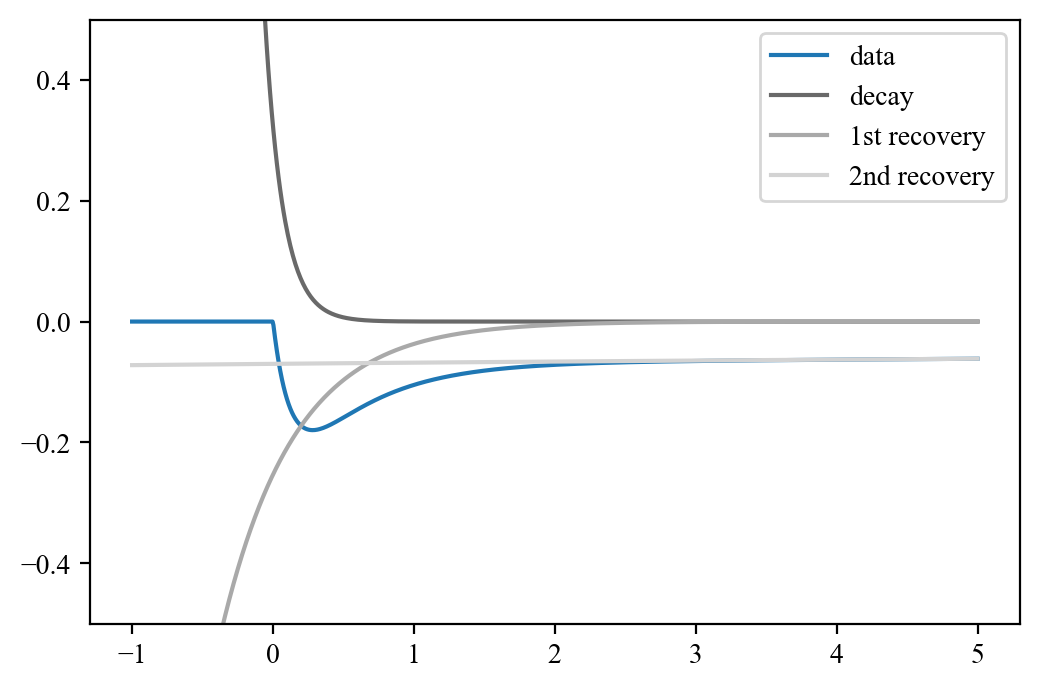

In [33]:
A1 = 0.26
A2 = 0.07
t0 = 0
tm = 0.130
tr = 0.520
tr2 = 17
n_pts = 1000
x = np.linspace(-1, 5 , n_pts)
y0  =  RJ.jumpdecay_VUV(x, A1, A2, t0, tm, tr, tr2) #+ 0.01 * np.random.randn(n_pts)
decay = ((A1*tr-A2*tm)/(tr-tm))*np.exp(-(x-t0) / tm)
first_recovery = - (tr*(A1-A2)/(tr-tm))*np.exp(-(x-t0) / tr)
second_recovery = - A2 / np.sqrt((x - t0) / tr2 + 1)

plt.figure()
plt.plot(x, y0, label='data')
plt.plot(x, decay , color = 'dimgray', label ='decay')
plt.plot(x, first_recovery, color = 'darkgray', label = '1st recovery')
plt.plot(x, second_recovery, color = 'lightgray', label = '2nd recovery')
plt.ylim(-0.5, +0.5)
plt.legend()
#np.heaviside(x-t0, 0) 

# Fitting simulated data - no Gaussian convolution

In [34]:
# set the fit model 
model_noGauss = Model(RJ.jumpdecay)
print('No tr2')
print('parameter names: {}'.format(model_noGauss.param_names))
print('independent variables: {}'.format(model_noGauss.independent_vars))

model_tr2_noGauss = Model(RJ.jumpdecay1)
print('With tr2')
print('parameter names: {}'.format(model_tr2_noGauss.param_names))
print('independent variables: {}'.format(model_tr2_noGauss.independent_vars))

model_binomial_noGauss = Model(RJ.jumpdecay2)
print('With tr2 binomial')
print('parameter names: {}'.format(model_binomial_noGauss.param_names))
print('independent variables: {}'.format(model_binomial_noGauss.independent_vars))

No tr2
parameter names: ['A', 'B', 'C', 't0', 'tm', 'tr']
independent variables: ['x']
With tr2
parameter names: ['A', 'B', 'C', 't0', 'tm', 'tr', 'tr2']
independent variables: ['x']
With tr2 binomial
parameter names: ['A', 'B', 'C', 't0', 'tm', 'tr', 'tr2']
independent variables: ['x']


In [35]:
def fit_sim(t, amp, noise, fit_func, algorithm, name_info, guess):
    if fit_func == 'No tr2':
        params_initial = model_noGauss.make_params(A=guess[0], B=guess[1], C=guess[2], t0=guess[3], tm=guess[4], tr=guess[5])
    # elif fit_func == 'with tr2 in sqrt':
    #     params_initial = model_tr2_noGauss.make_params(A=guess[0], B=guess[1], C=guess[2], t0=guess[3], tm=guess[4], tr=guess[5], tr2 = guess[6])
    # elif fit_func == 'with tr2 binomial':
    #     params_initial = model_binomial_noGauss.make_params(A=guess[0], B=guess[1], C=guess[2], t0=guess[3], tm=guess[4], tr=guess[5], tr2 = guess[6])
    params_initial['t0'].vary = False
    params_initial['A'].vary = True
    params_initial['B'].vary = True
    params_initial['C'].vary = False
    params_initial['tm'].vary = True
    params_initial['tr'].vary = True
    #params_initial['tr2'].vary = True
    
    
    params_initial['A'].min = 0.00001
    params_initial['A'].max = 1.0

    params_initial['B'].min = 0.00001
    params_initial['B'].max = 1.0
    
    params_initial['C'].min = 0.9
    params_initial['C'].max = 1.1
    
    params_initial['t0'].min = -0.15
    params_initial['t0'].max = 0.15

    params_initial['tm'].min = 0.00001
    params_initial['tm'].max = 0.5

    params_initial['tr'].min = 0.1
    params_initial['tr'].max = 2.0
    
    
    result = model_noGauss.fit(amp, params_initial, x=t, method=algorithm)

    print(result.fit_report())
    fit_error = np.std(result.residual)

    #filename = f'Time_constant_fit_results/fit_{fit_func}_{name_info}'
    # save fit report to a file:
    # with open(f'{filename}.txt', 'w') as fh:
    #     fh.write("True values\n")
    #     fh.write(f"{true}\n")
    #     fh.write(f'{result.fit_report()}\n')
    #     fh.write("Other values\n")
    #     fh.write('noise pre-pump = {:.3f}\n'.format(noise))
    #     fh.write('fit error = {:.3f}\n'.format(fit_error))
    return params_initial, result, fit_error

def each_term(x, result, fit_func):
    A = result.values['A']
    B = result.values['B']
    t0 = result.values['t0']
    tm = result.values['tm']
    tr = result.values['tr']
    if not fit_func=='No tr2':
        tr2 = result.values['tr2']
    decay =  A * np.exp(-(x - t0) / tm)
    first_recovery =  -  B * np.exp(-(x - t0) / tr)
    if fit_func == 'No tr2':
        second_recovery = (B-A)
    # elif fit_func == 'with tr2 in sqrt':
    #     second_recovery =   (B - A) / np.sqrt(np.abs(x - t0) / tr2 + 1)
    # elif fit_func == 'with tr2 binomial':
    #     second_recovery = (B - A) * (1 - 0.5 * (x-t0) / tr2 + (3/8) * ((x - t0) / tr2)**2 - (5/16) * ((x-t0) / tr2)**3 )
    
    return decay, first_recovery, second_recovery

def plot_fig_sim(t, amp, fit_func, result, noise, fit_error, decay, first_recovery, second_recovery, name_info, taille=10):
    fig = plt.figure()
    plt.plot(t, amp, 'o', mfc='none', color = 'C3', label = 'raw')
    plt.plot(t, result.best_fit, 'k-', label='fit')
    plt.plot(t[t>0], decay[t>0], color = 'dimgray', label ='decay')
    plt.plot(t[t>0], first_recovery[t>0], color = 'darkgray', label = '1st recovery')
    if fit_func == 'No tr2':
        plt.plot(t[t>0], np.full(np.shape(t[t>0]), second_recovery), color = 'lightgray', label = '2nd recovery')
    elif fit_func == 'with tr2 in sqrt':
        plt.plot(t[t>0], second_recovery[t>0], color = 'lightgray', label = '2nd recovery')
    elif fit_func == 'with tr2 binomial':
        plt.plot(t[t>0], second_recovery[t>0], color = 'lightgray', label = '2nd recovery')
    plt.xlabel('time (ps)',fontsize=15)
    plt.ylabel('Amplitude (arb. units)',fontsize=15)
    plt.ylim(-.4, 1.2)
    taille = taille
    # plt.text(-5, 0.8, 'Fitted params:', fontsize=taille)
    # plt.text(-5, 0.7, 'A = {:.2f} ± {:.3f}'.format(result.values['A'], result.params['A'].stderr), fontsize=taille)
    # plt.text(-5, 0.6, 'B = {:.2f} ± {:.3f}'.format(result.values['B'], result.params['B'].stderr), fontsize=taille)
    # plt.text(-5, 0.5, 'C = {:.2f} ± {:.3f} '.format(result.values['C'], result.params['C'].stderr), fontsize=taille)
    # plt.text(-5, 0.4, 't0 = {:.3f} ± {:.3f} ps'.format(result.values['t0'], result.params['t0'].stderr), fontsize=taille)
    # plt.text(-5, 0.3, 'tm = {:.3f} ± {:.3f} ps'.format(result.values['tm'], result.params['tm'].stderr), fontsize=taille)
    # plt.text(-5, 0.2, 'tr = {:.3f} ± {:.3f} ps'.format(result.values['tr'], result.params['tr'].stderr), fontsize=taille)
    # plt.text(-5, -0.2, 'noise = {:.3f}'.format(noise), fontsize=taille)
    # plt.text(-5, -0.3, 'fit error = {:.3f} '.format(fit_error), fontsize=taille)
    plt.legend(fontsize = 10, loc = 'center right')
    plt.title(f'Fitting with {fit_func}')
    #plt.savefig(f'Time_constant_fit_results/fit_{fit_func}_{name_info}.png', format = 'png', dpi = 300)

## Define index of parameter to fit

In [36]:
# index of the parameter to fit here
index = 4
scans_to_plot2 = np.array([0])

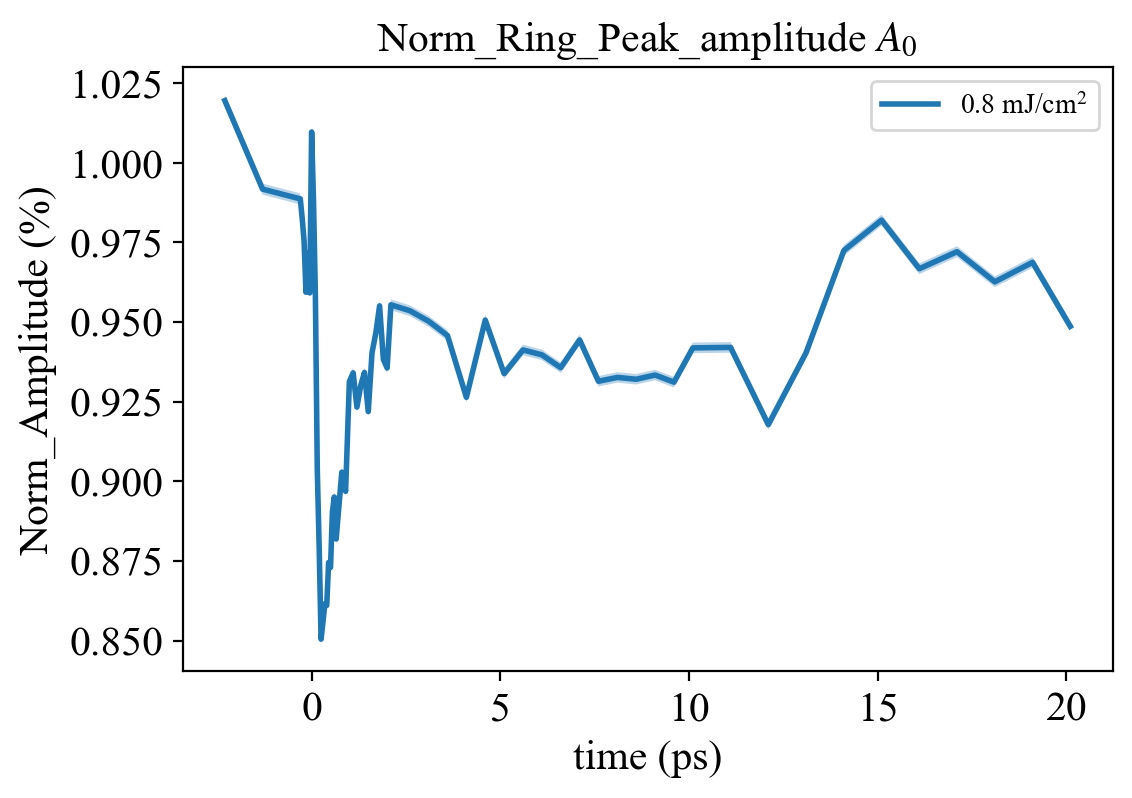

In [37]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200

# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')

for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))*1,\
                       data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index]))*1, linewidth=2, label = fluence_list[i])
        #plot_errorbars(data_fit[i, :, 0], data_fit[i, :, 3]-data_fit[i, 0, 3], data_error[i, :, 3], linewidth=2)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude (%)',fontsize=15)

#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
#plt.xlim(-2.5, 10)
plt.legend()

plt.title('Norm_Ring_Peak_amplitude $A_0$',fontsize=15)
plt.show()

In [38]:
#index = 7
i = scans_to_plot2[0]
t = data_fit[i][ :, 0]
amp = data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))
noise = abs(np.average(data_fit[i][ 0:3, index]))

[[Model]]
    Model(jumpdecay)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 287
    # data points      = 63
    # variables        = 4
    chi-square         = 0.01708071
    reduced chi-square = 2.8950e-04
    Akaike info crit   = -509.415231
    Bayesian info crit = -500.842692
[[Variables]]
    A:   0.99999944 +/- 6.69656798 (669.66%) (init = 0.8)
    B:   0.94661724 +/- 9.26056907 (978.28%) (init = 0.6)
    C:   1 (fixed)
    t0:  0 (fixed)
    tm:  0.26854281 +/- 0.34458239 (128.32%) (init = 0.1)
    tr:  0.35162716 +/- 0.45826285 (130.33%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)   = 1.000
    C(A, tr)  = -0.998
    C(B, tr)  = -0.998
    C(B, tm)  = 0.998
    C(A, tm)  = 0.998
    C(tm, tr) = -0.992


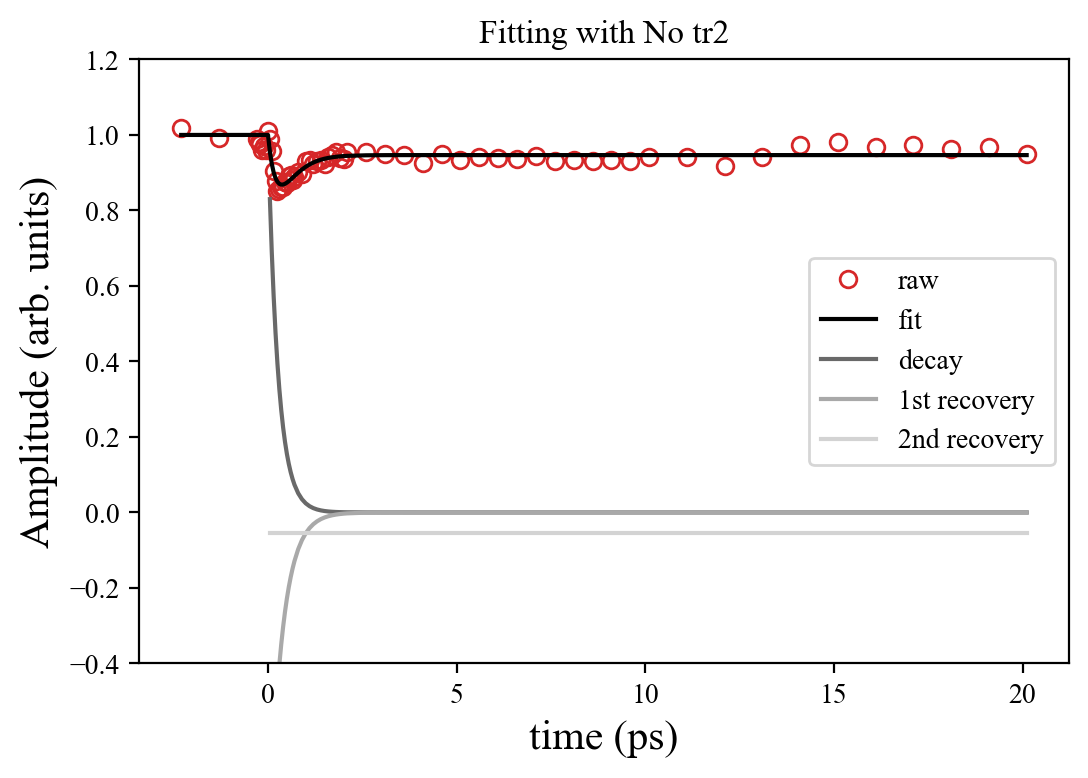

In [39]:
guess = [0.8, 0.6, 1, 0, 0.1, 0.5]
algorithm = 'leastsq'
name_info = 'noise_' + str(noise) + '_all_fixed' #+ '_boundaries' #
fit_func = 'No tr2' #'No tr2' or 'with tr2 in sqrt' or 'with tr2 binomial'

params_initial, result, fit_error = fit_sim(t, amp, noise, fit_func, algorithm, name_info, guess)
decay, first_recovery, second_recovery = each_term(t, result, fit_func)
fig = plot_fig_sim(t, amp, fit_func, result, noise, fit_error, decay, first_recovery, second_recovery, name_info, taille=10)



In [40]:
result

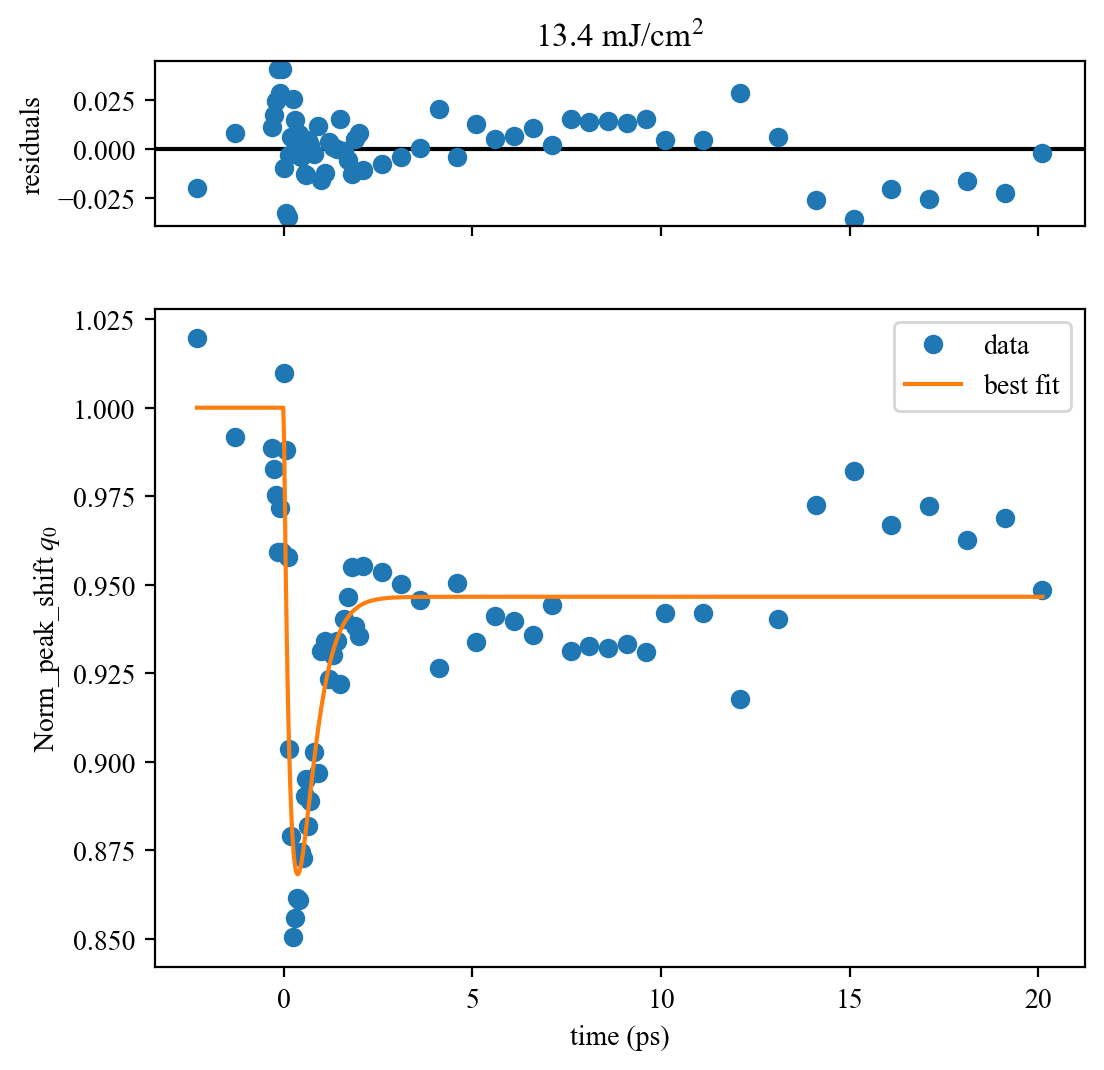

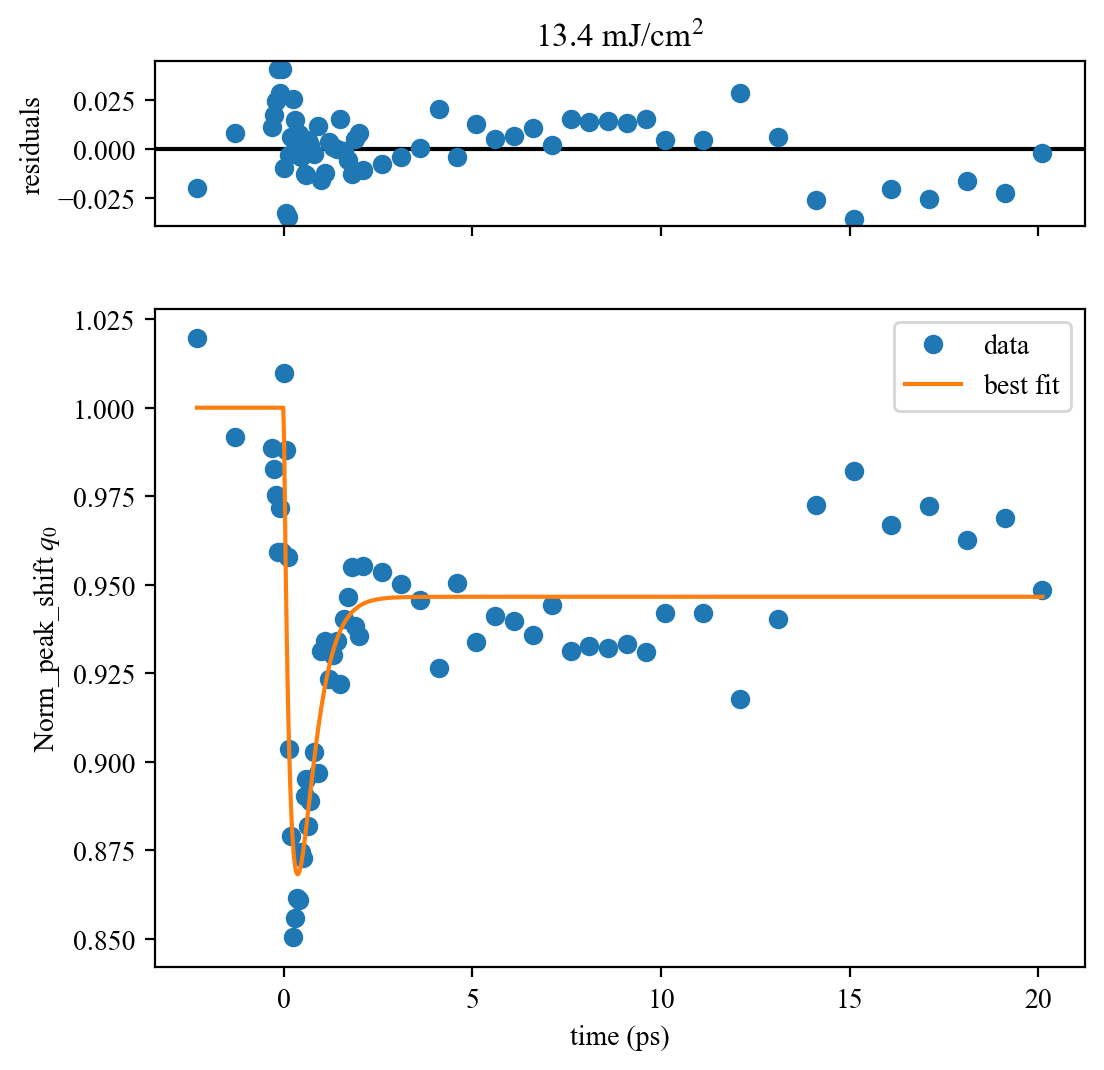

In [41]:
result.plot(xlabel='time (ps)', ylabel='Norm_peak_shift $q_0$', numpoints = 1000, title=fluence_list[12])

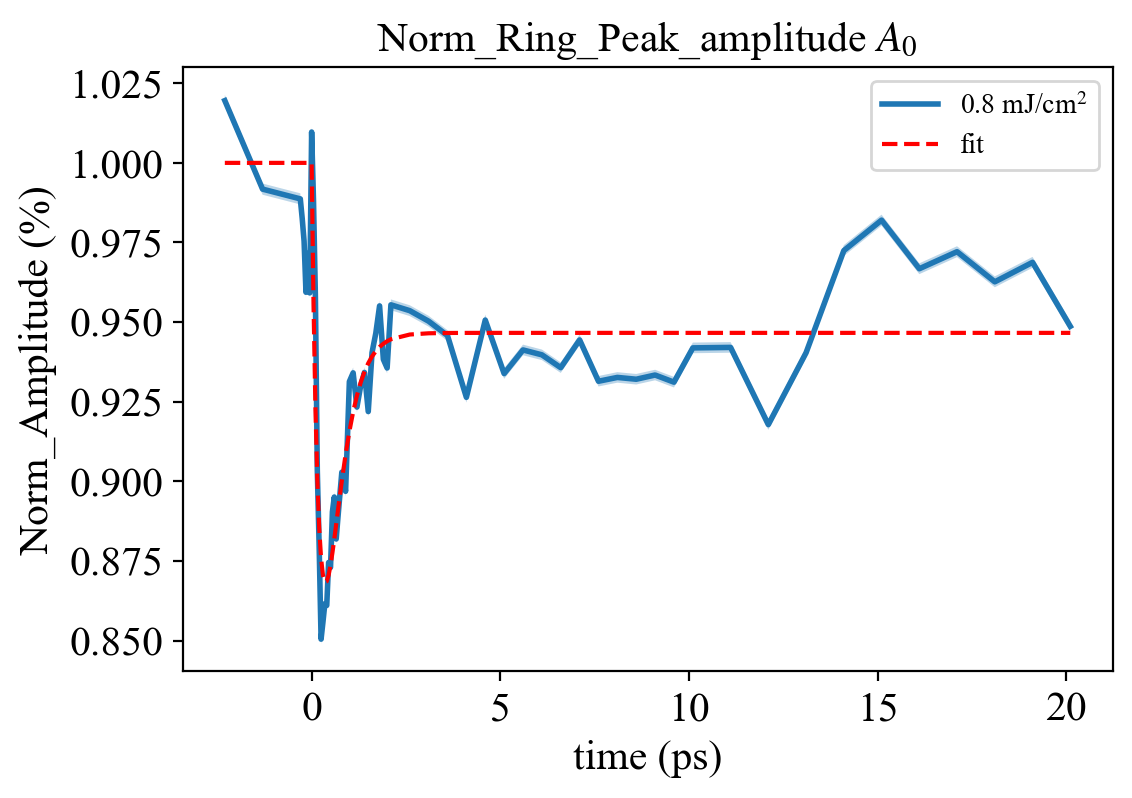

In [42]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
#index = 7
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')
for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))*1,\
                       data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index]))*1, linewidth=2, label = fluence_list[i])
        #plot_errorbars(data_fit[i, :, 0], data_fit[i, :, 3]-data_fit[i, 0, 3], data_error[i, :, 3], linewidth=2)
plt.plot(t, result.best_fit, 'r--', label='fit')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude (%)',fontsize=15)

#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
#plt.xlim(-2.5, 10)
plt.legend()

plt.title('Norm_Ring_Peak_amplitude $A_0$',fontsize=15)
plt.show()

# Fit data in a loop

In [43]:
data_fit[0][ :, 0]

array([-2.300258  , -1.3002329 , -0.30020767, -0.25017306, -0.20013845,
       -0.15010384, -0.10006922, -0.05003461,  0.        ,  0.05003461,
        0.10006922,  0.15010384,  0.20013845,  0.25017306,  0.30020767,
        0.3502423 ,  0.4002769 ,  0.45031154,  0.5003461 ,  0.55038077,
        0.60041535,  0.65045   ,  0.7004846 ,  0.7998867 ,  0.8999559 ,
        1.0000252 ,  1.1000944 ,  1.2001636 ,  1.3002329 ,  1.400302  ,
        1.5003713 ,  1.6004405 ,  1.7005098 ,  1.800579  ,  1.9006482 ,
        2.0007174 ,  2.1007867 ,  2.6004658 ,  3.1008117 ,  3.6004908 ,
        4.1008368 ,  4.601183  ,  5.100862  ,  5.601208  ,  6.1015544 ,
        6.6012335 ,  7.1015797 ,  7.6012588 ,  8.101604  ,  8.601951  ,
        9.10163   ,  9.601976  , 10.102323  , 11.102347  , 12.102372  ,
       13.102398  , 14.10309   , 15.103115  , 16.10314   , 17.103165  ,
       18.103857  , 19.103884  , 20.103909  ], dtype=float32)

[[Model]]
    Model(jumpdecay)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 337
    # data points      = 53
    # variables        = 4
    chi-square         = 0.01192954
    reduced chi-square = 2.4346e-04
    Akaike info crit   = -437.148543
    Bayesian info crit = -429.267376
[[Variables]]
    A:   0.99999052 +/- 7.33520773 (733.53%) (init = 0.8)
    B:   0.94168094 +/- 10.0770012 (1070.11%) (init = 0.7)
    C:   1 (fixed)
    t0:  0 (fixed)
    tm:  0.25779990 +/- 0.34399066 (133.43%) (init = 0.1)
    tr:  0.33399262 +/- 0.45961839 (137.61%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)   = 1.000
    C(A, tr)  = -0.998
    C(B, tr)  = -0.998
    C(B, tm)  = 0.998
    C(A, tm)  = 0.998
    C(tm, tr) = -0.993
[[Model]]
    Model(jumpdecay)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 359
    # data points      = 51
    # variables        = 4
    chi-square         = 0.01485570
    reduced

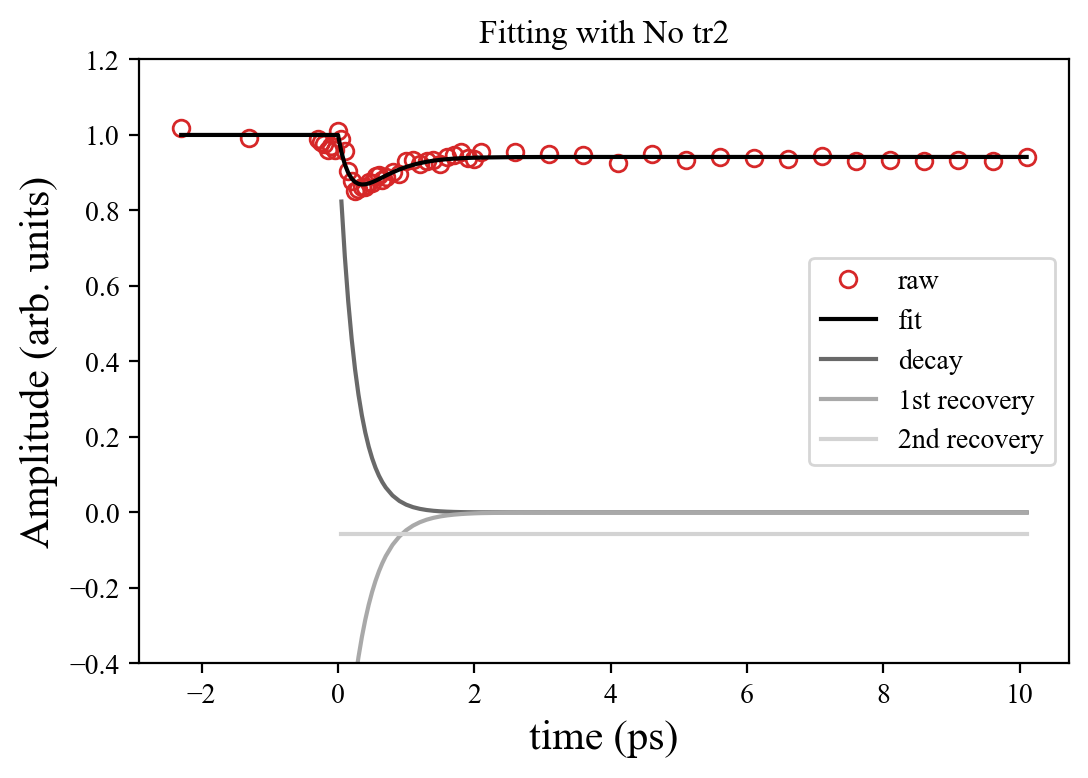

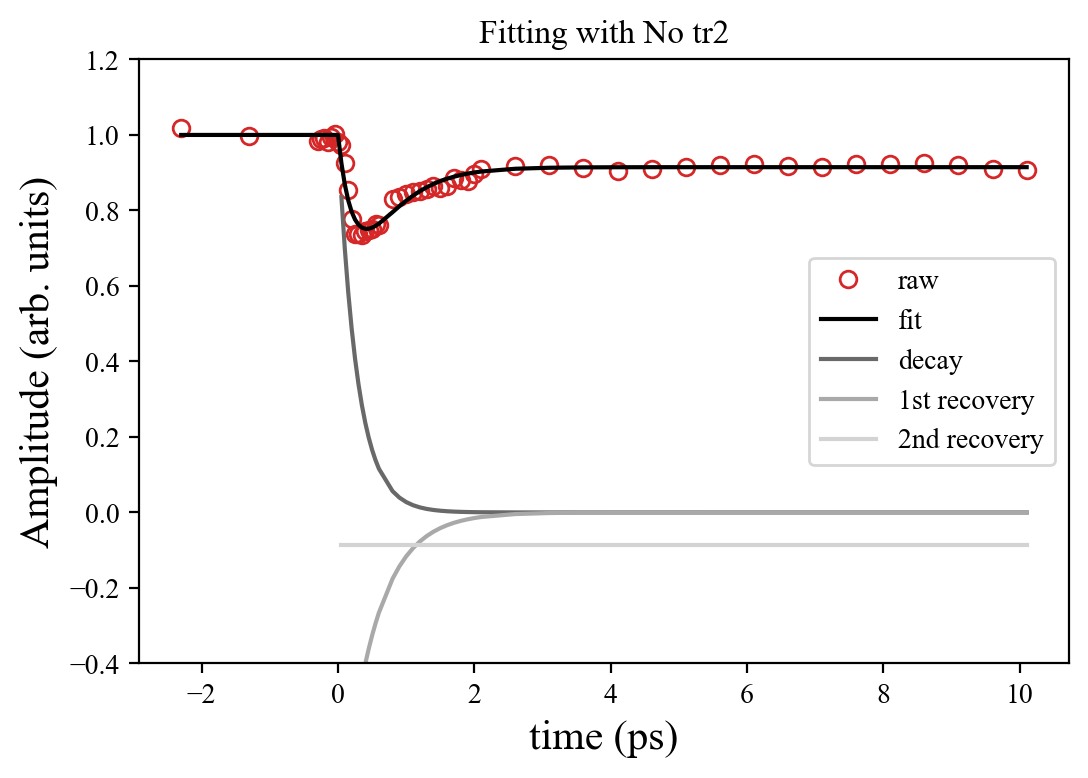

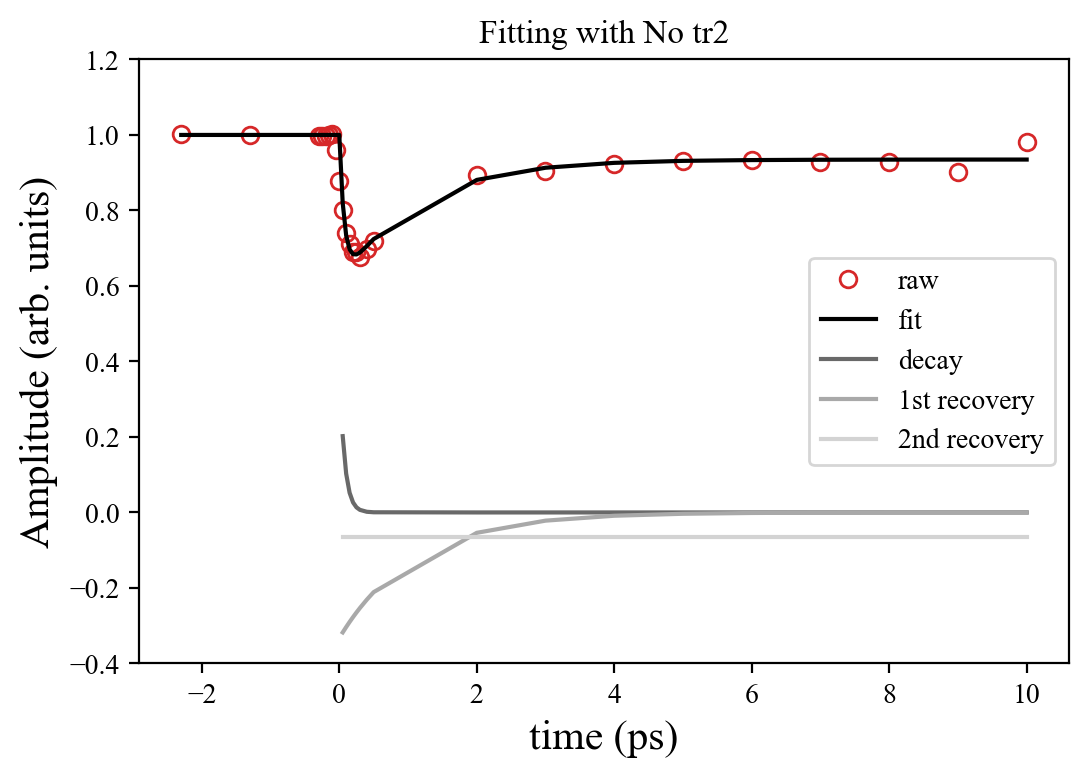

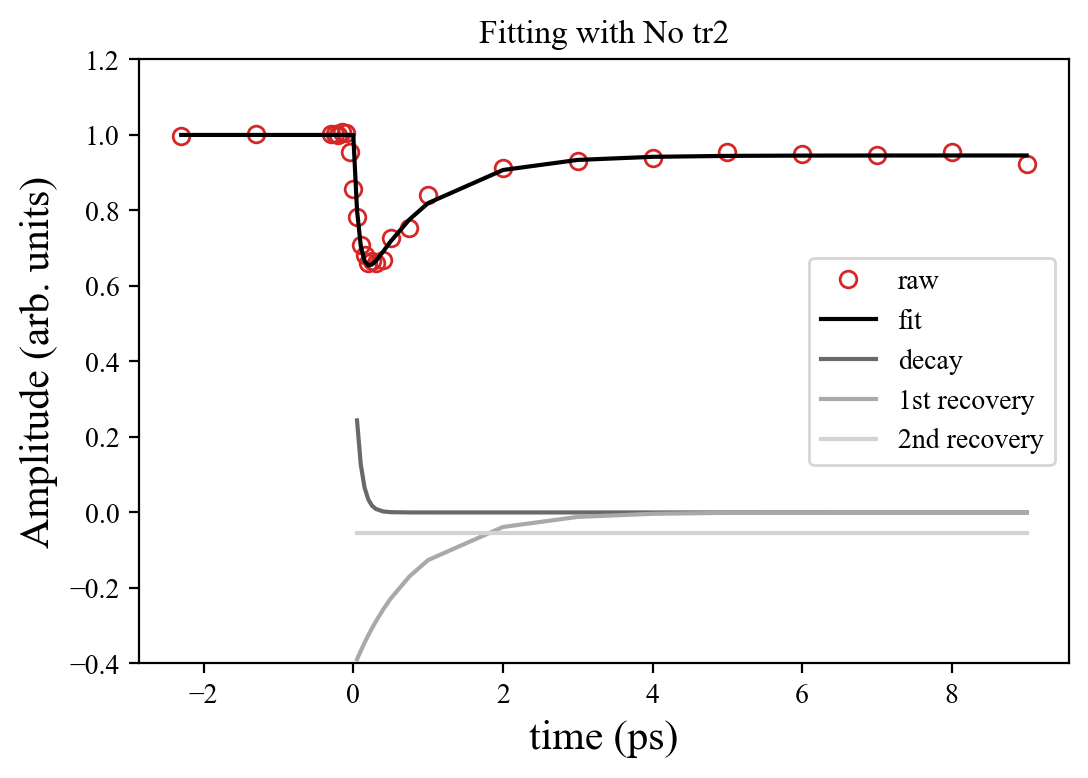

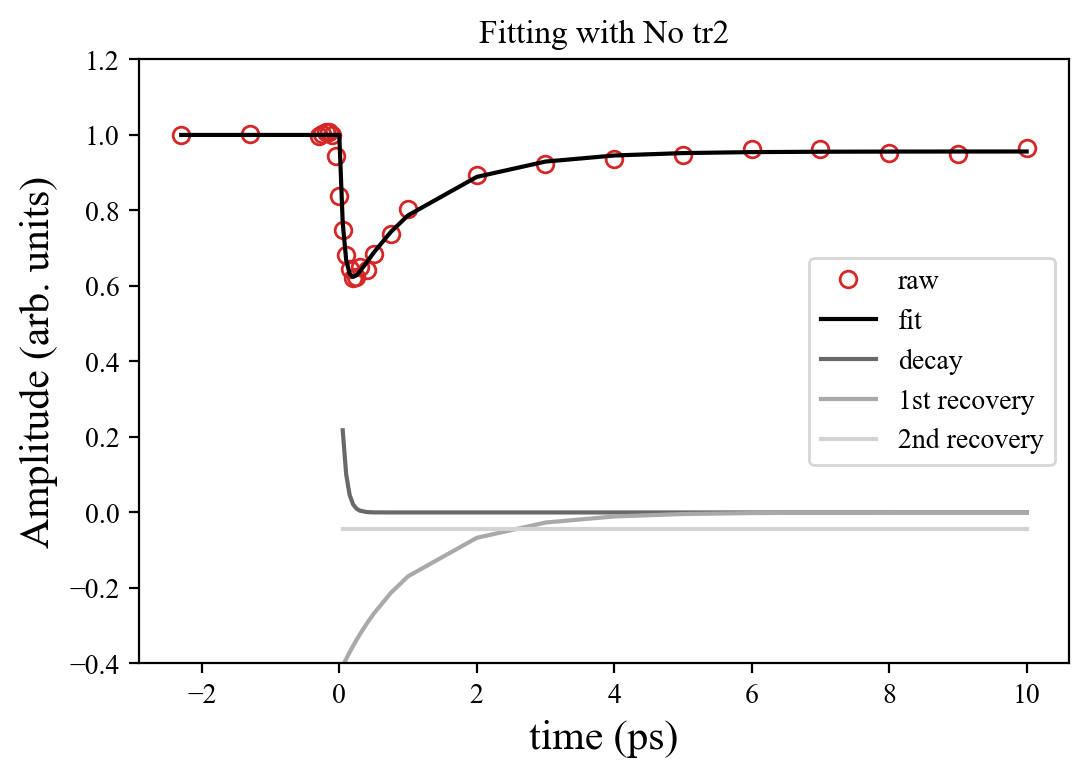

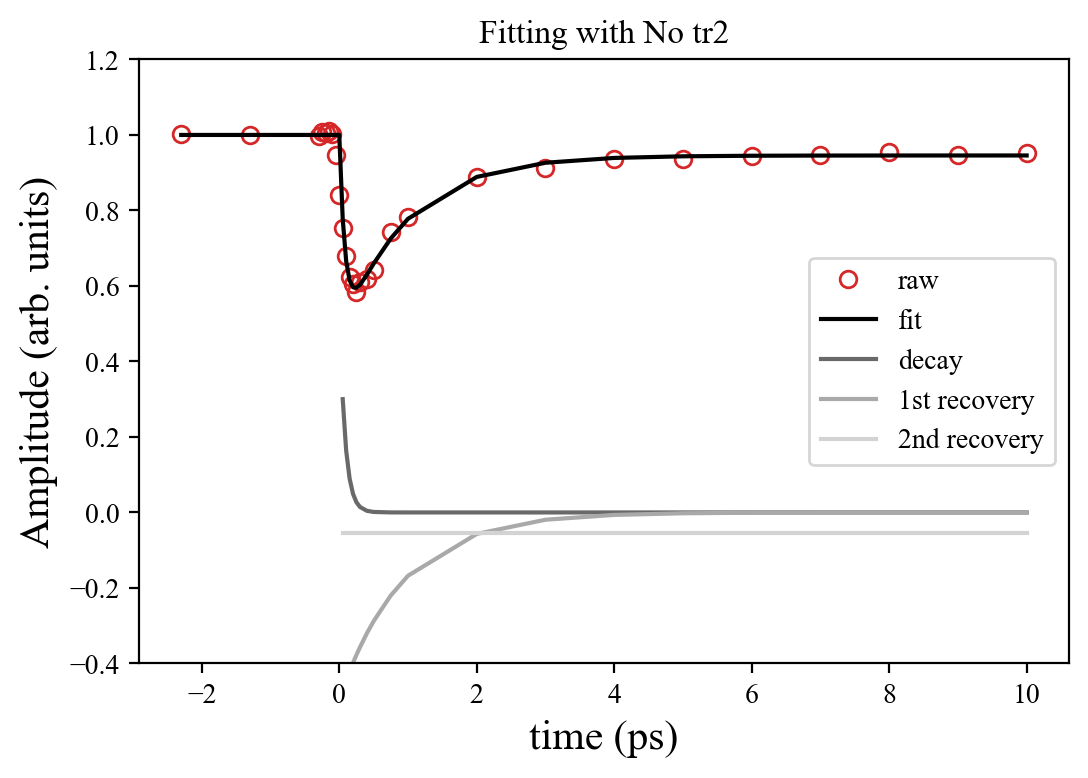

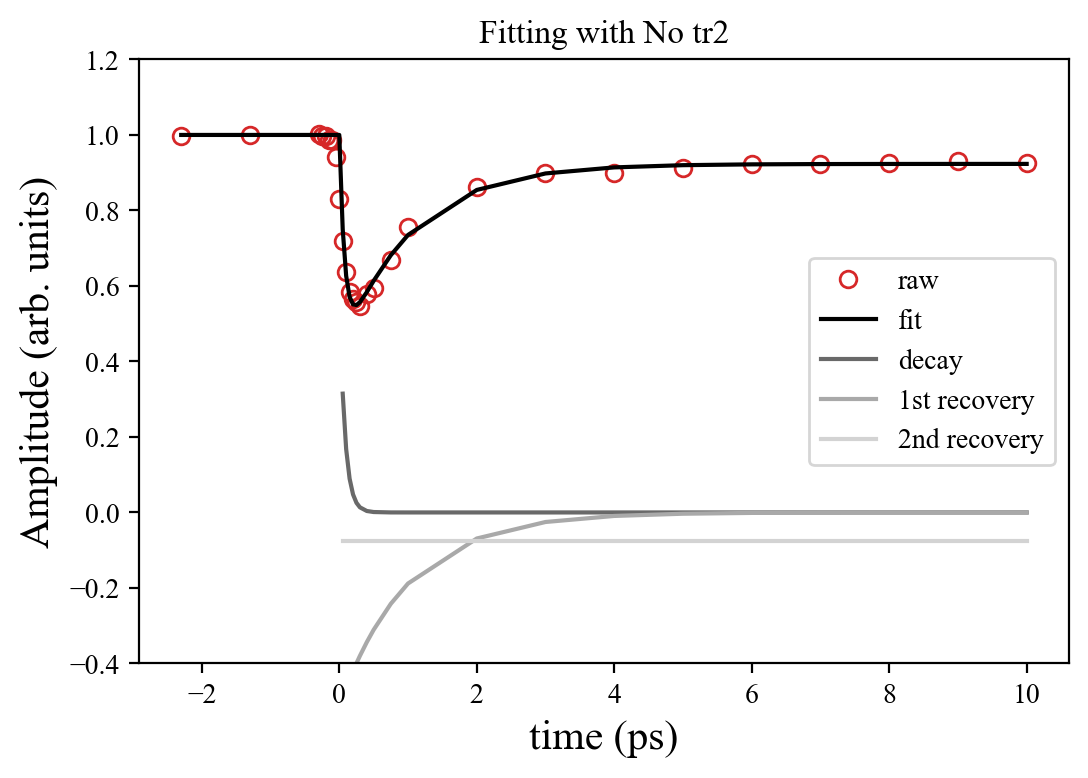

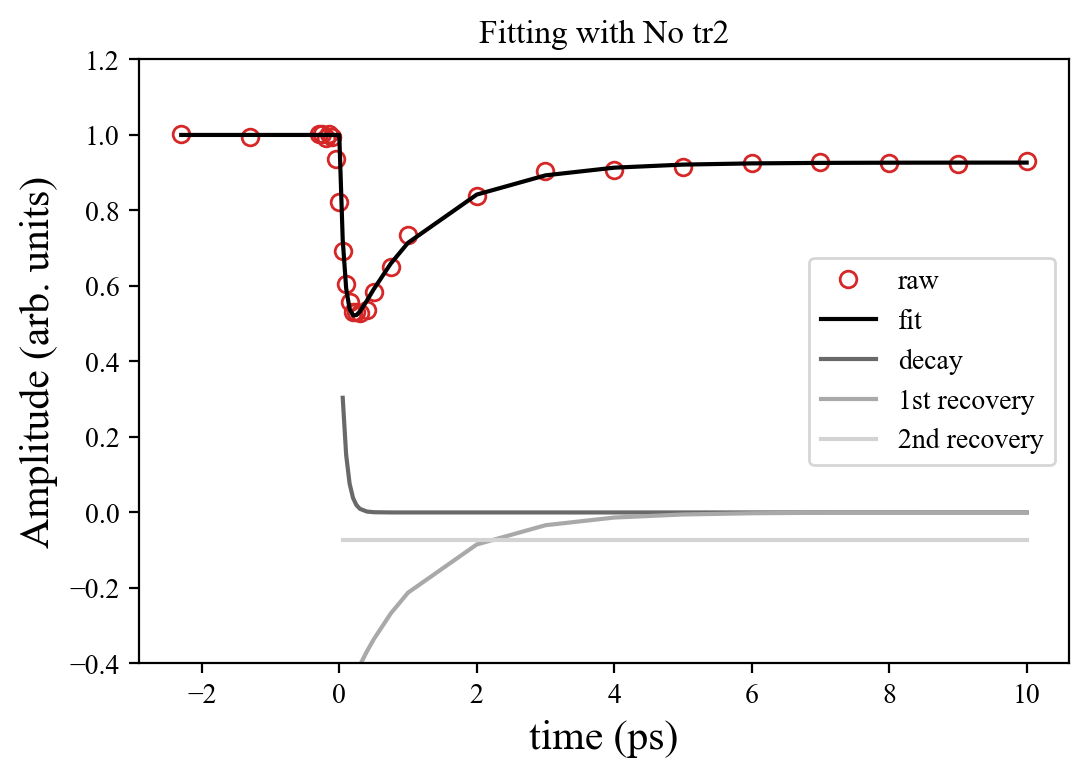

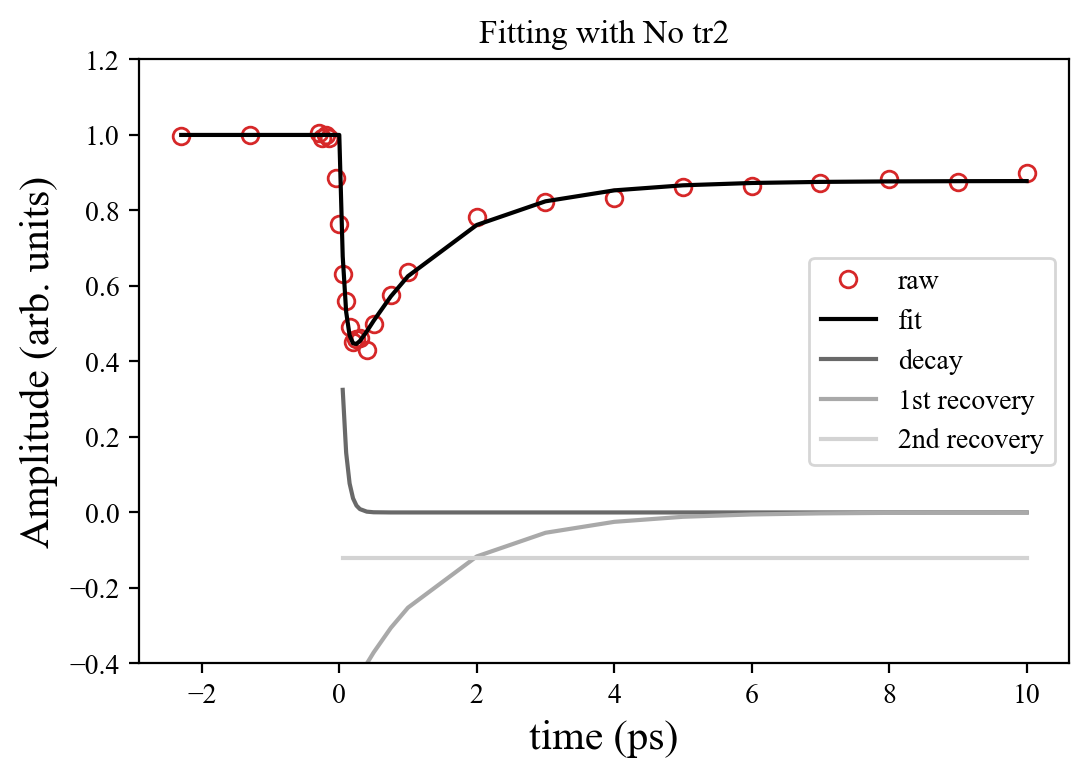

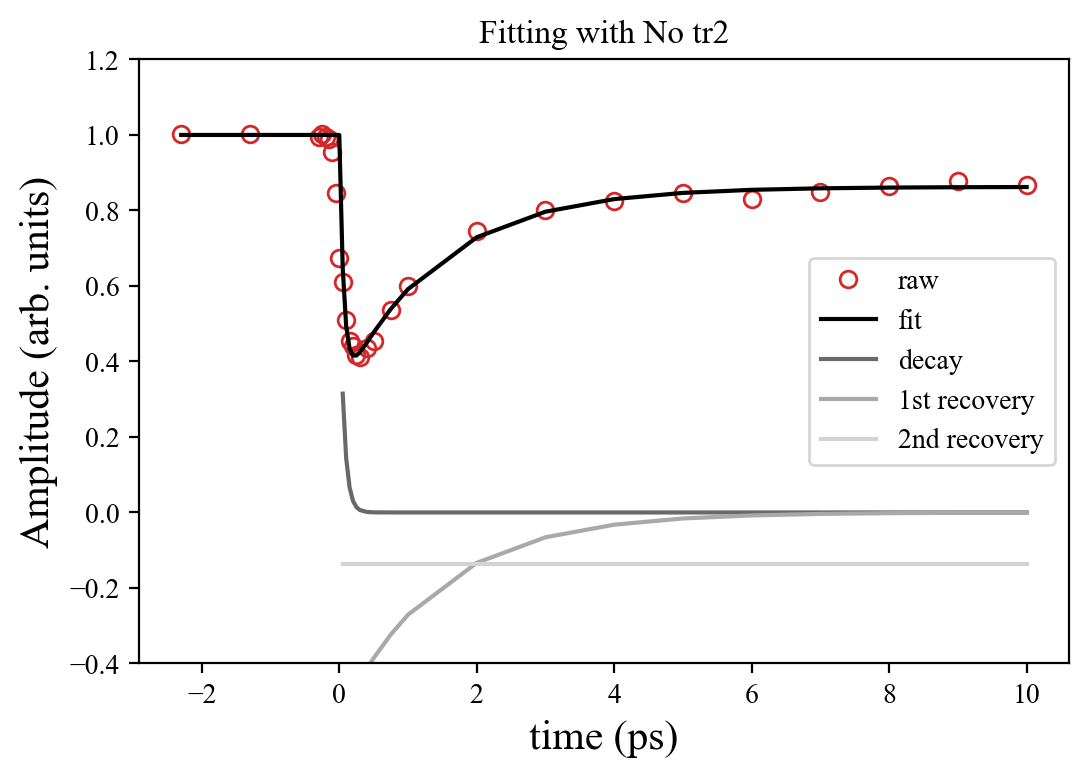

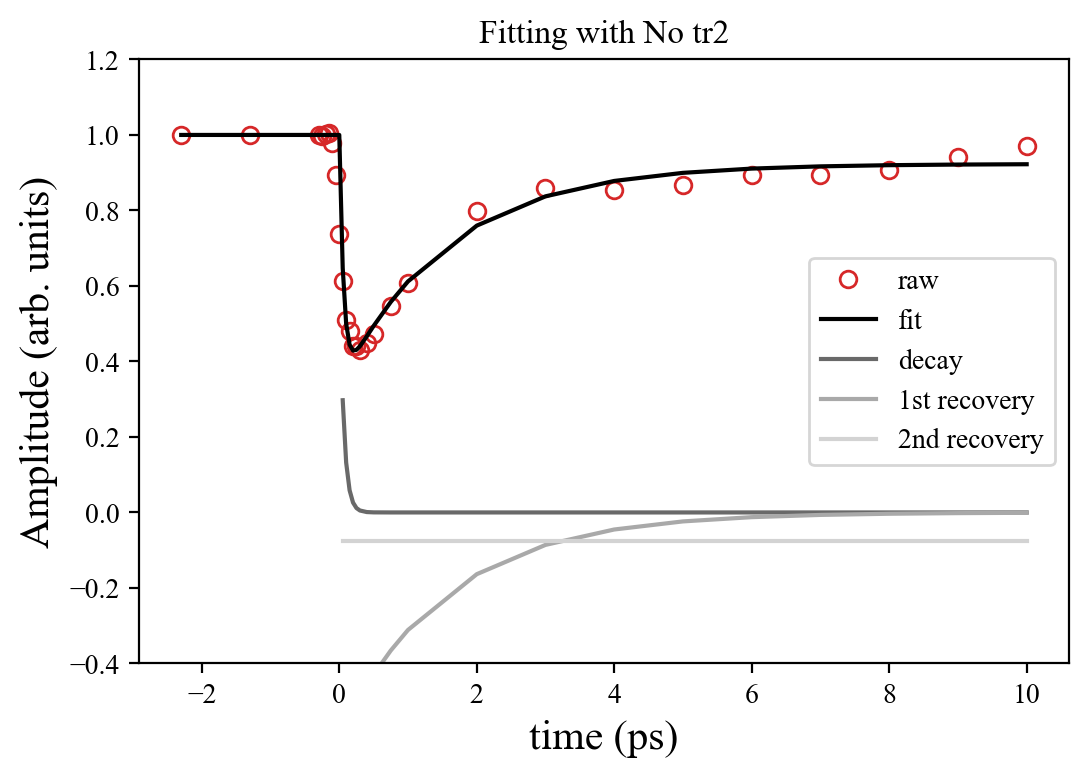

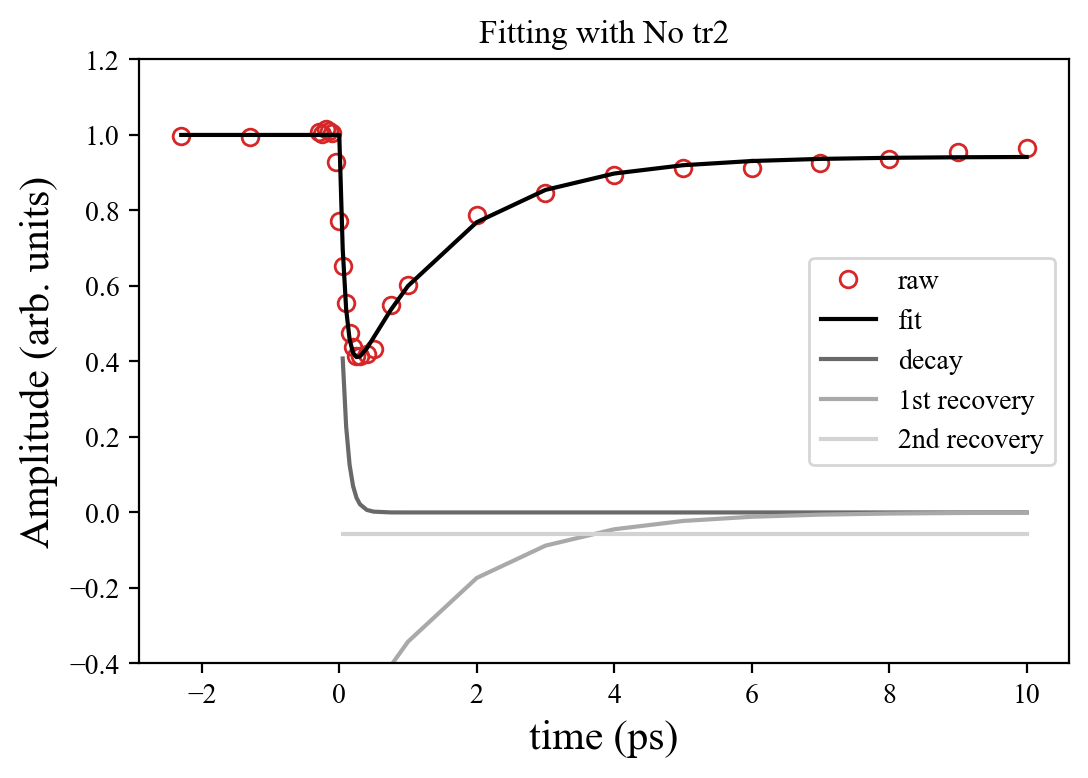

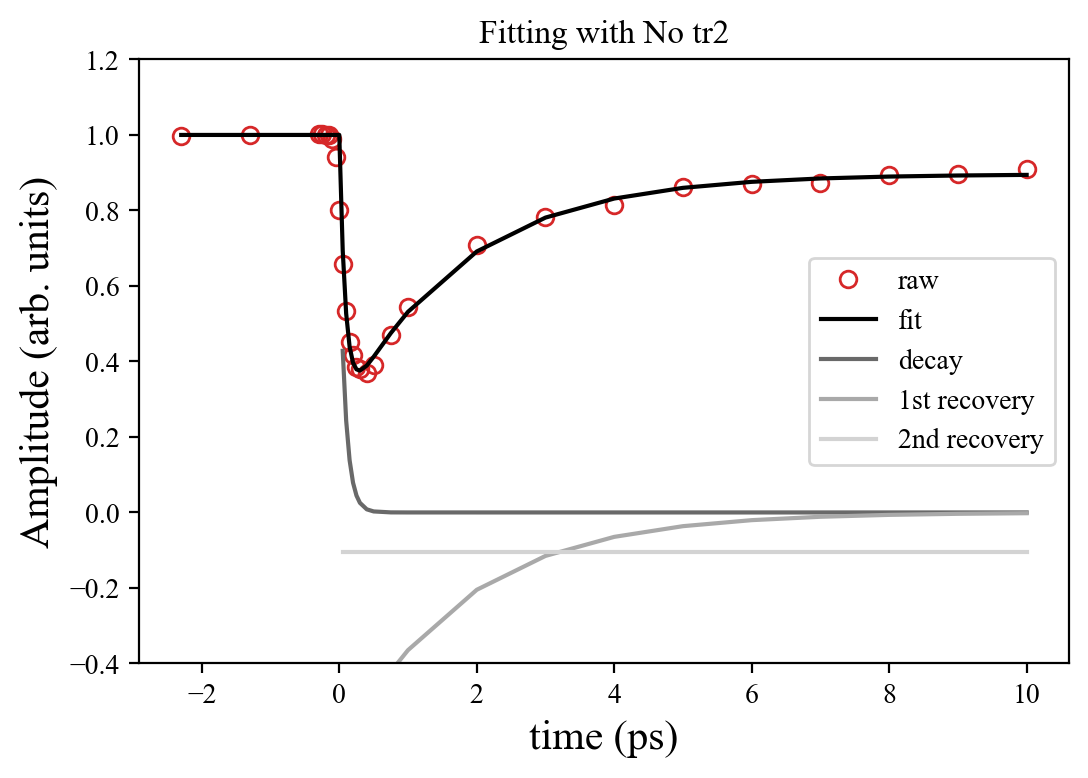

In [44]:
#index = 7
savedir = 'Time_constant_fit_results/Fit_results_1'

for i in range (0, (nb_file_BG)):
    if i == 0:
        # Creating empty np array to store the fit parameters
        time_zero = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # t_0
        quench_amp = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # A_1
        recovery_amp = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # A_2
        quench_time = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # tm
        recovery_time = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # tr
        real_quench_amp = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # Real quench A_q
        real_quench_time = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # Real quench time t_min
        
        # Creating empty np array for errors
        dA = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA
        dB = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dB
        dC = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dC
        dt_0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_0
        dt_m = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_m
        dt_r = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_r
        dA_1 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA_1
        dA_2 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA_2
        dt_min = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_min
        dA_q = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA_q
    
    t = data_fit[i][ :, 0]
    amp = data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))
    noise = abs(np.average(data_fit[i][ 0:3, index]))

    guess = [0.8, 0.7, 1, 0, 0.1, 1.0]
    #algorithm = 'cg'
    algorithm = 'leastsq'
    name_info = 'noise_' + str(noise) + '_all_fixed' #+ '_boundaries' #
    fit_func = 'No tr2' #'No tr2' or 'with tr2 in sqrt' or 'with tr2 binomial'

    params_initial, result, fit_error = fit_sim(t[t<10.5], amp[t<10.5], noise, fit_func, algorithm, name_info, guess)
    decay, first_recovery, second_recovery = each_term(t[t<10.5], result, fit_func)
    fig = plot_fig_sim(t[t<10.5], amp[t<10.5], fit_func, result, noise, fit_error, decay, first_recovery, second_recovery, name_info, taille=10)
    
    #calculating things for plots
    time_zero[i] = result.values['t0']
    quench_amp[i] = result.values['A'] - result.values['B']*(result.values['tm']/result.values['tr'])
    recovery_amp[i] = result.values['A'] - result.values['B']
    quench_time[i] = result.values['tm']
    recovery_time[i] = result.values['tr']
    real_quench_amp[i] = result.values['A']*(1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr']-result.values['tm'])))\
    - result.values['B']*(1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr']-result.values['tm'])))
    real_quench_time[i] = result.values['t0'] - ((result.values['tm']*result.values['tr'])/(result.values['tr']-result.values['tm']))\
    *(math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))
    
    dA[i] = result.params['A'].stderr # dA
    dB[i] = result.params['B'].stderr # dB
    dC[i] = result.params['C'].stderr # dC
    dt_0[i] = result.params['t0'].stderr # dt_0
    dt_m[i] = result.params['tm'].stderr # dt_m
    dt_r[i] = result.params['tr'].stderr # dt_r
    
    dA_1[i] = math.sqrt(dA[i]**2 + (dB[i]*result.values['tm']/result.values['tr'])**2 + (dt_m[i]*result.values['B']/result.values['tr'])**2\
                        + (dt_r[i]*result.values['B']*result.values['tm']/(result.values['tr'])**2)**2) # dA_1
    dA_2[i] = math.sqrt(dA[i]**2 + dB[i]**2) # dA_2
    
    
    
    dt_min_dA = (dA[i]*result.values['tm']*result.values['tr'])/(result.values['A']*(result.values['tr']-result.values['tm']))
    dt_min_dB = (dB[i]*result.values['tm']*result.values['tr'])/(result.values['B']*(result.values['tr']-result.values['tm']))
    
    dt_min_dtm = result.values['tr']/(result.values['tr']-result.values['tm'])*(1 + (result.values['tr']/(result.values['tr']-result.values['tm']))\
                                                                                *math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))*dt_m[i]
    
    dt_min_dtr = result.values['tm']/(result.values['tr']-result.values['tm'])*(1 + (result.values['tm']/(result.values['tr']-result.values['tm']))\
                                                                                *math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))*dt_r[i]
    
    # dt_min
    dt_min[i] = math.sqrt(dt_0[i]**2 + dt_min_dA**2 + dt_min_dtm**2 + dt_min_dtr**2) # dt_min
    
    
    
    
    dA_q_dA = (1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr']-result.values['tm'])))*dA[i]
    
    dA_q_dB = (1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr']-result.values['tm'])))*dB[i]
    
    dA_q_dtr = 1/(result.values['tr']*(result.values['tr'] - result.values['tm'])**2)*(result.values['A']*result.values['tr']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tm']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))\
                                                                                       - result.values['B']*result.values['tm']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tr']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))))*dt_r[i]
    
    dA_q_dtm = 1/(result.values['tm']*(result.values['tr'] - result.values['tm'])**2)*(result.values['B']*result.values['tm']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tr']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))\
                                                                                       - result.values['A']*result.values['tr']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tm']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))))*dt_m[i]
    #dA_q
    dA_q[i] = math.sqrt(dA_q_dA**2 + dA_q_dB**2 + dA_q_dtr**2 + dA_q_dtm**2) # dA_q
    
    
    #saving model fits
    file_1 = savedir + 'Fit_model_' + fit_func + '_' + f'{fluence_mj_cm[i]}' + '.sav'
    globals()['results_%s' % i] = result
    #lmfit.model.save_modelresult(result, file_1)


# Plot all the data

In [45]:
scans_to_plot2 = np.array([0])

In [46]:
#index = 7
i = scans_to_plot2[0]
t = data_fit[i][ :, 0]
amp = data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))
err = data_error[i][:, index]/abs(np.average(data_fit[i][ 0:3, index]))*1
noise = abs(np.average(data_fit[i][ 0:3, index]))

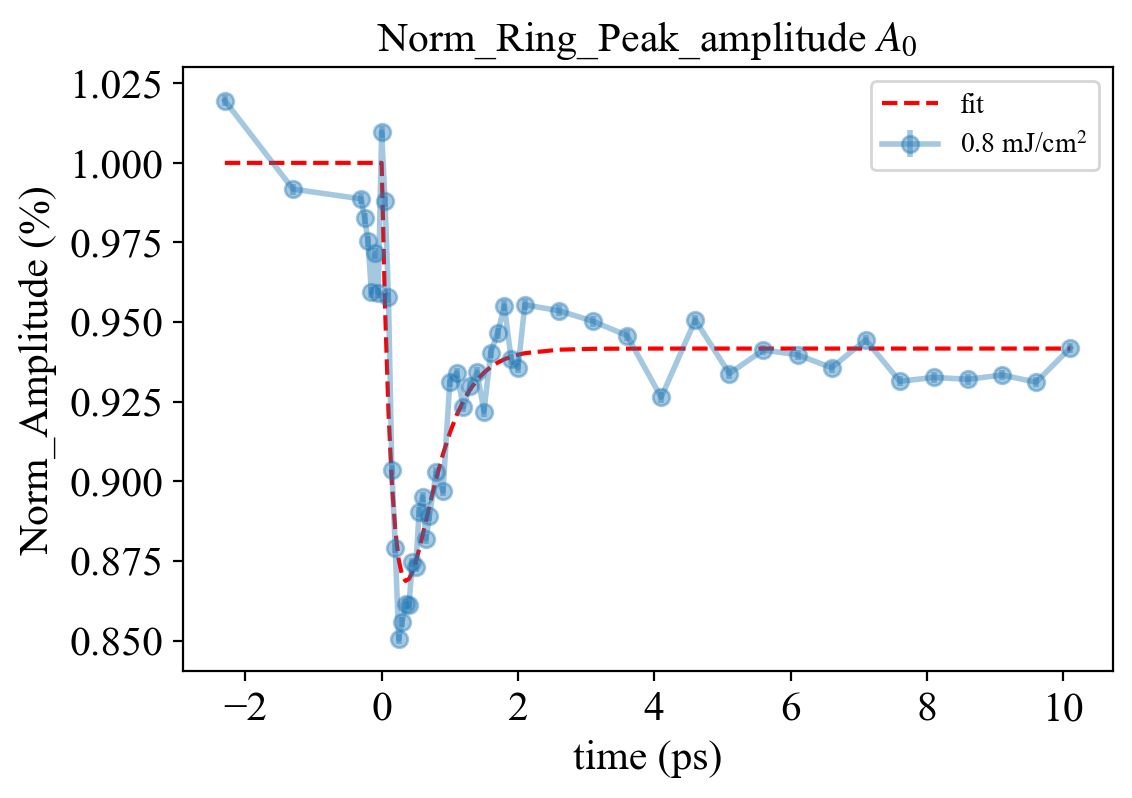

In [47]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200

#t[t<10.5], amp[t<10.5]

#index = 7
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')
for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        plt.errorbar(t[t<10.5], amp[t<10.5] , err[t<10.5], linewidth=2, label = fluence_list[i], marker='o', alpha = 0.4)
        # plot_errorbars(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))*1,\
        #                data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index]))*1, linewidth=2, label = fluence_list[i])

plt.plot(t[t<10.5], results_0.best_fit, 'r--', label='fit')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude (%)',fontsize=15)

#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
#plt.xlim(-2.5, 10)
plt.legend()

plt.title('Norm_Ring_Peak_amplitude $A_0$',fontsize=15)
plt.show()

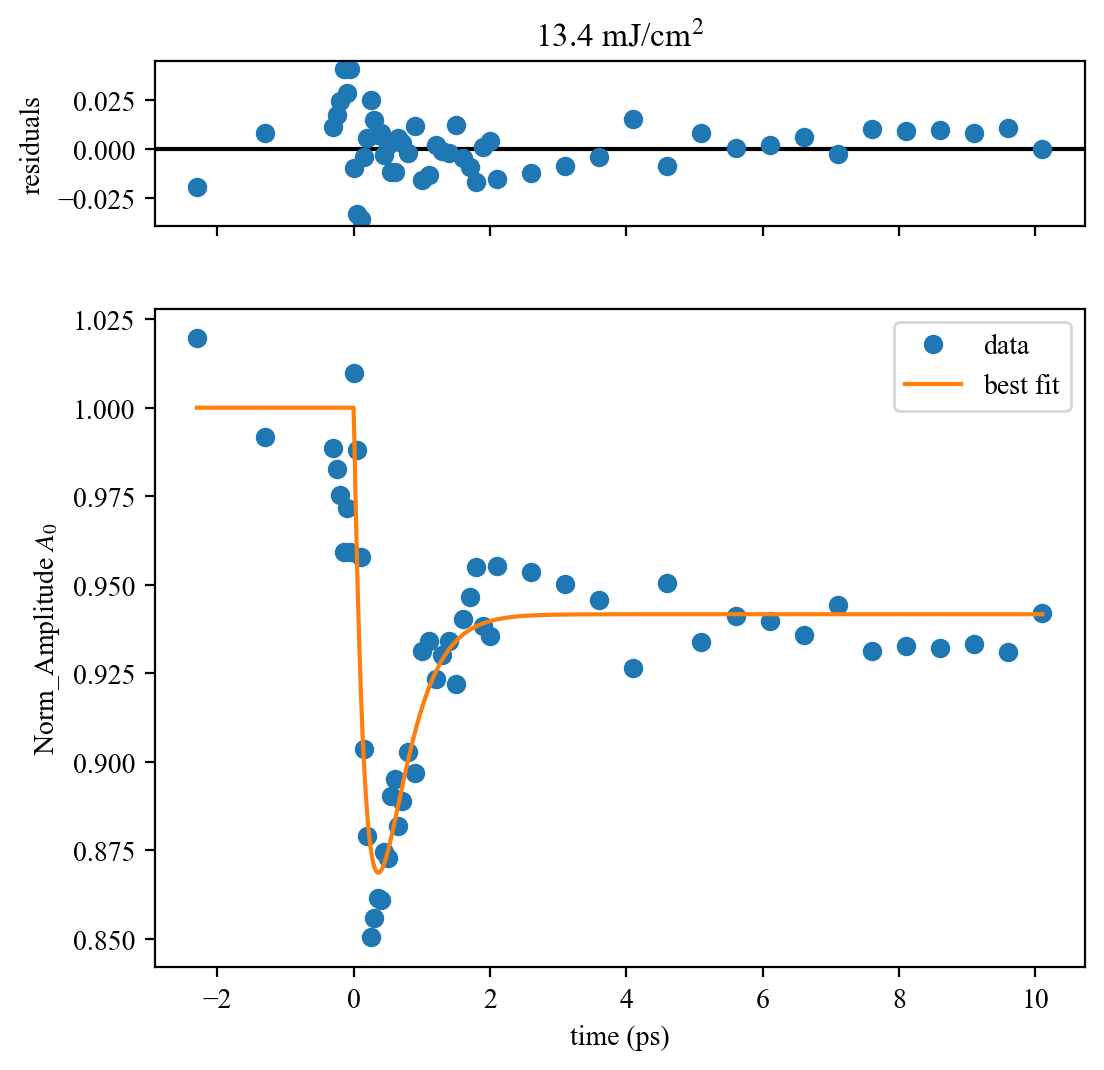

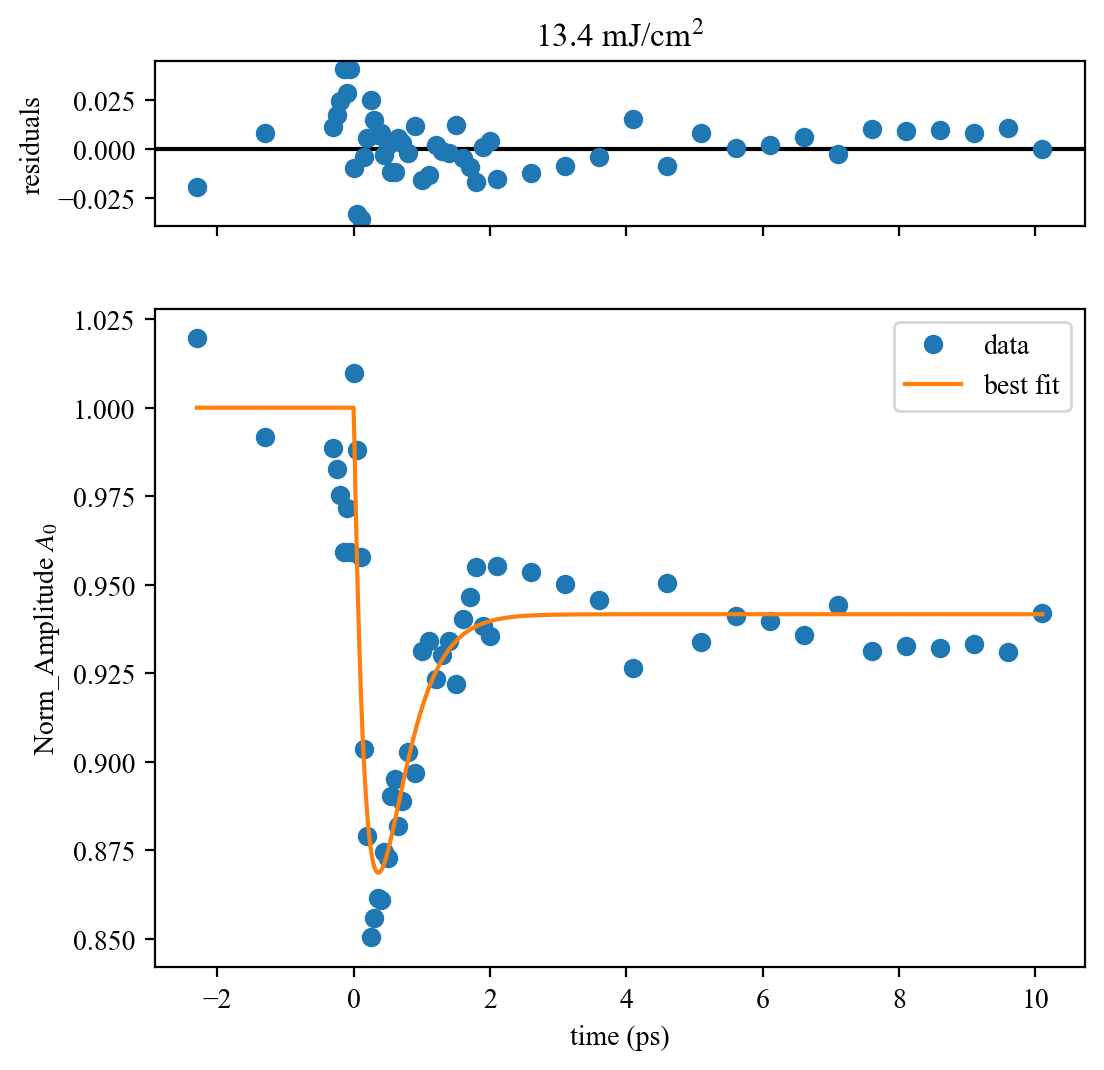

In [48]:
results_0.plot(xlabel='time (ps)', ylabel='Norm_Amplitude $A_0$', numpoints = 1000, title=fluence_list[12])

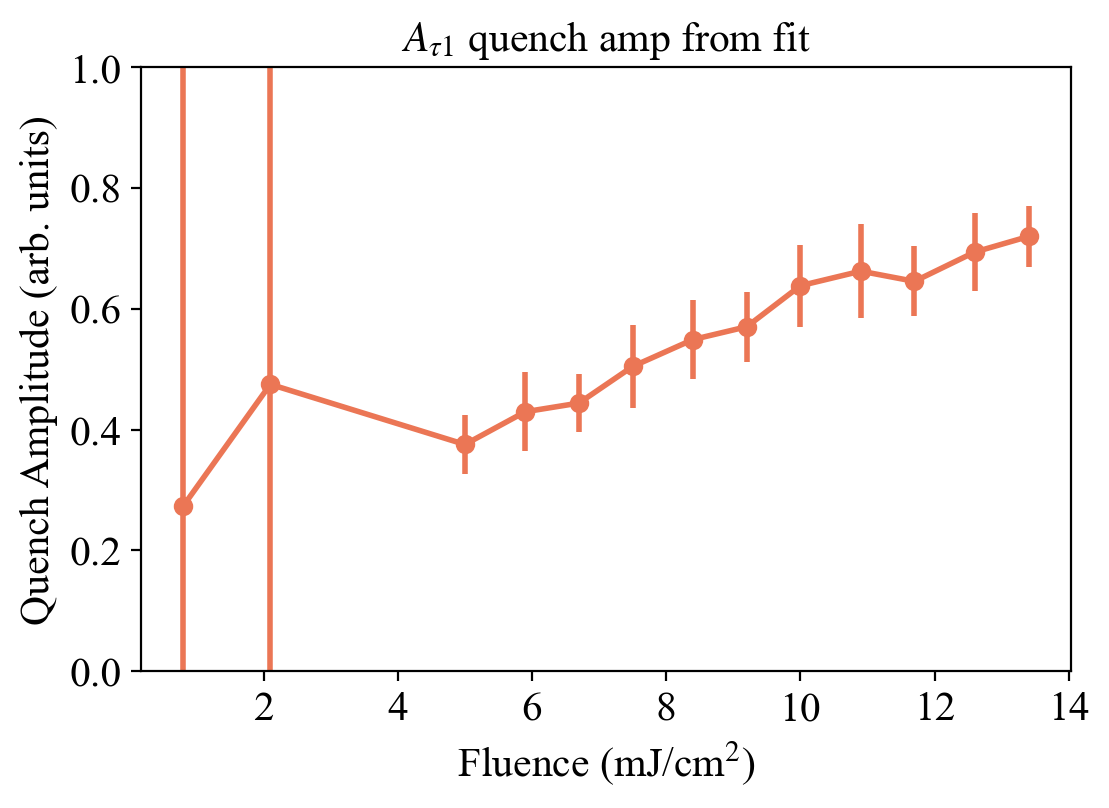

In [49]:
x = fluence_mj_cm
y_0_q = quench_amp
y_error = dA_1

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 1.0])
#plt.legend(['-2.3 ps', '0.4 ps'])

plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.ylabel('Quench Amplitude (arb. units)',fontsize=15)

plt.title('$A_{\u03C41}$ quench amp from fit',fontsize=15)

plt.show()

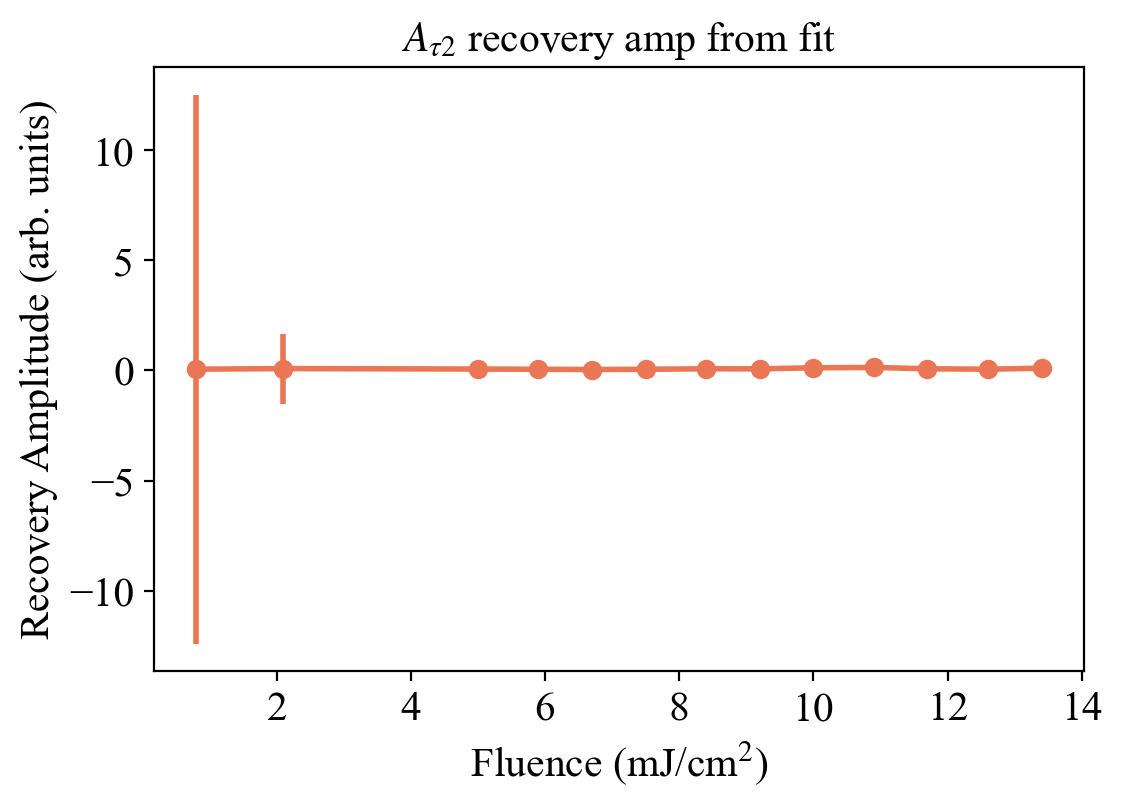

In [50]:
x = fluence_mj_cm
y_0_q = recovery_amp
y_error = dA_2

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 0.5])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Recovery Amplitude (arb. units)',fontsize=15)

plt.title('$A_{\u03C42}$ recovery amp from fit',fontsize=15)

plt.show()

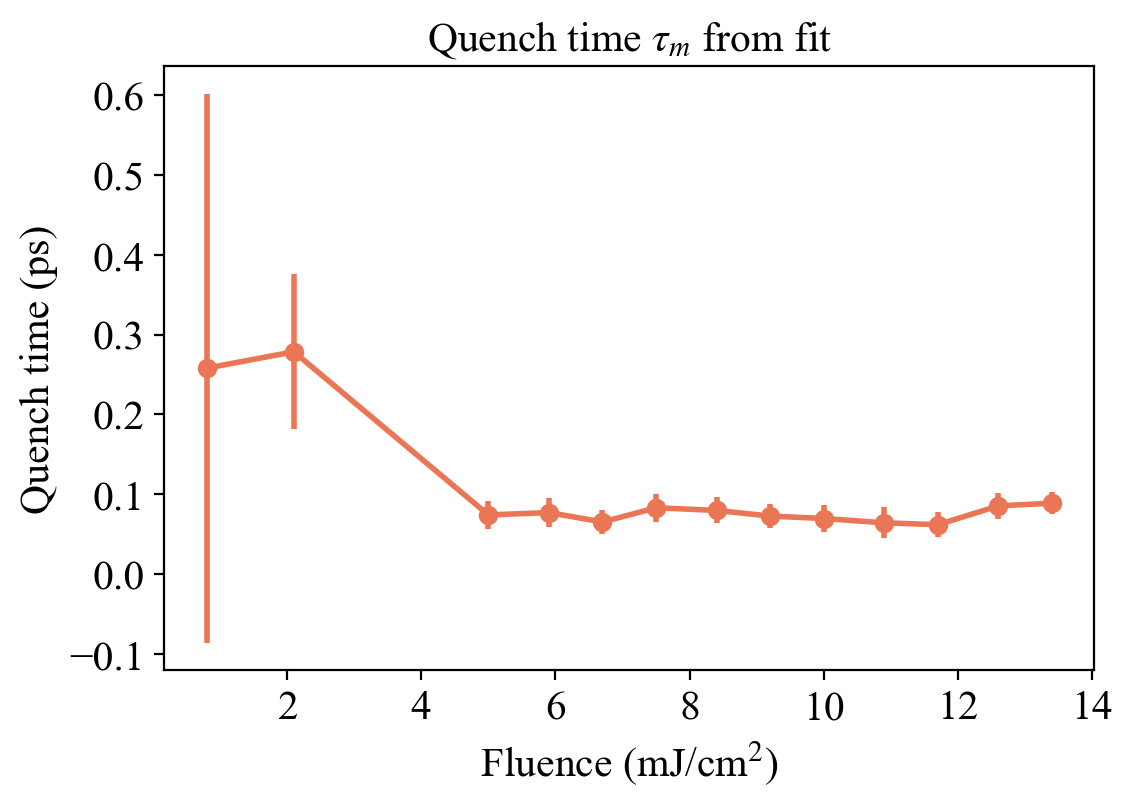

In [51]:
x = fluence_mj_cm
y_0_q = quench_time
y_error = dt_m

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Quench time (ps)',fontsize=15)

plt.title('Quench time $\u03C4_m$ from fit',fontsize=15)

plt.show()

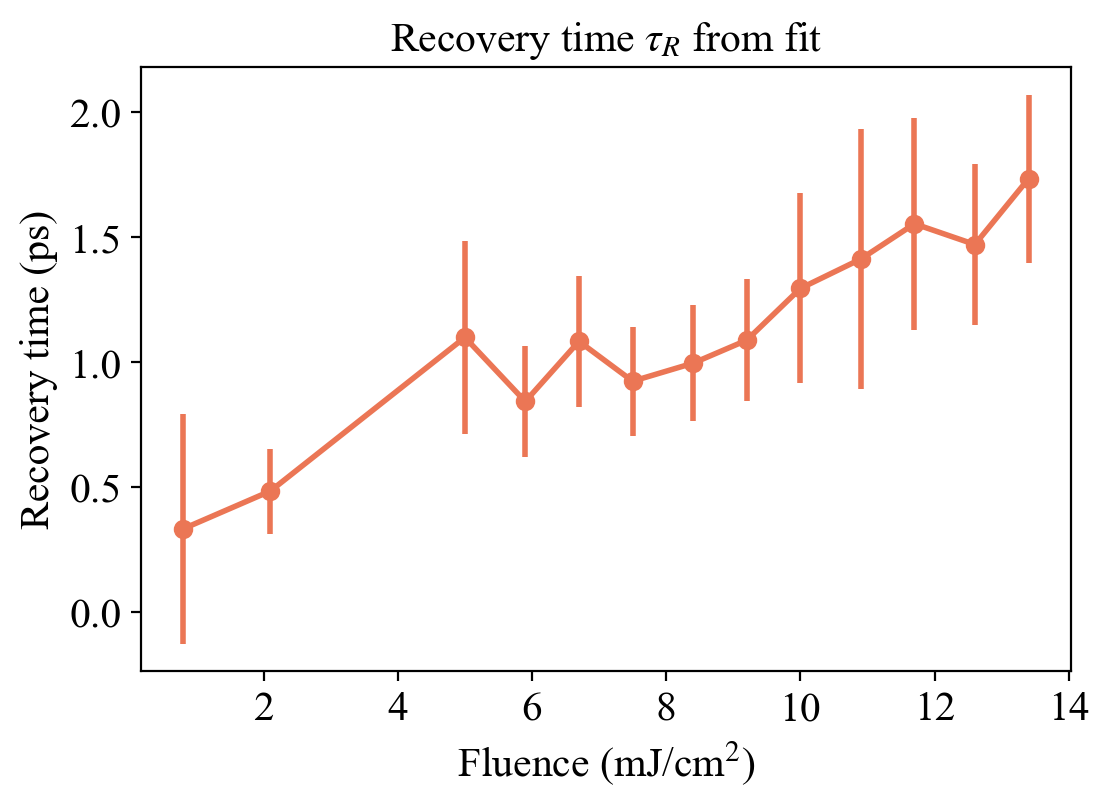

In [52]:
x = fluence_mj_cm
y_0_q = recovery_time
y_error = dt_r

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Recovery time (ps)',fontsize=15)

plt.title('Recovery time $\u03C4_R$ from fit',fontsize=15)

plt.show()

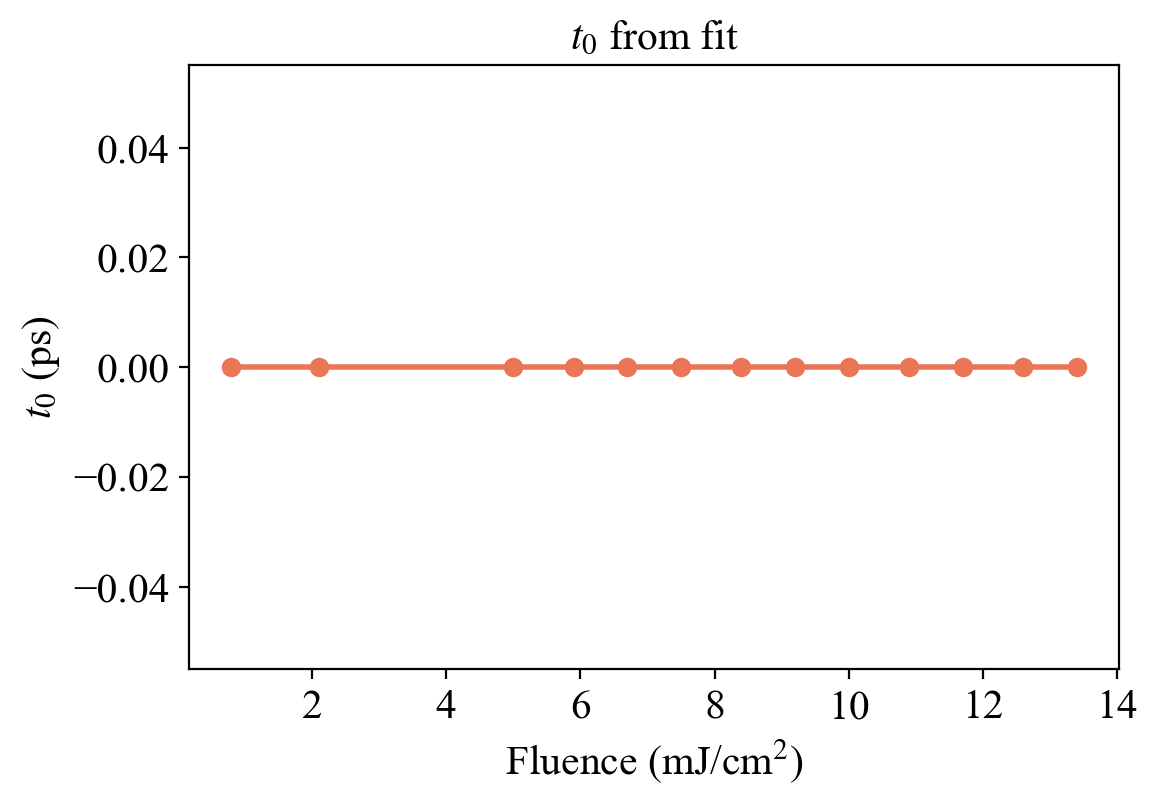

In [53]:
x = fluence_mj_cm
y_0_q = time_zero
y_error = dt_0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('$t_0$ (ps)',fontsize=15)

plt.title('$t_0$ from fit',fontsize=15)

plt.show()

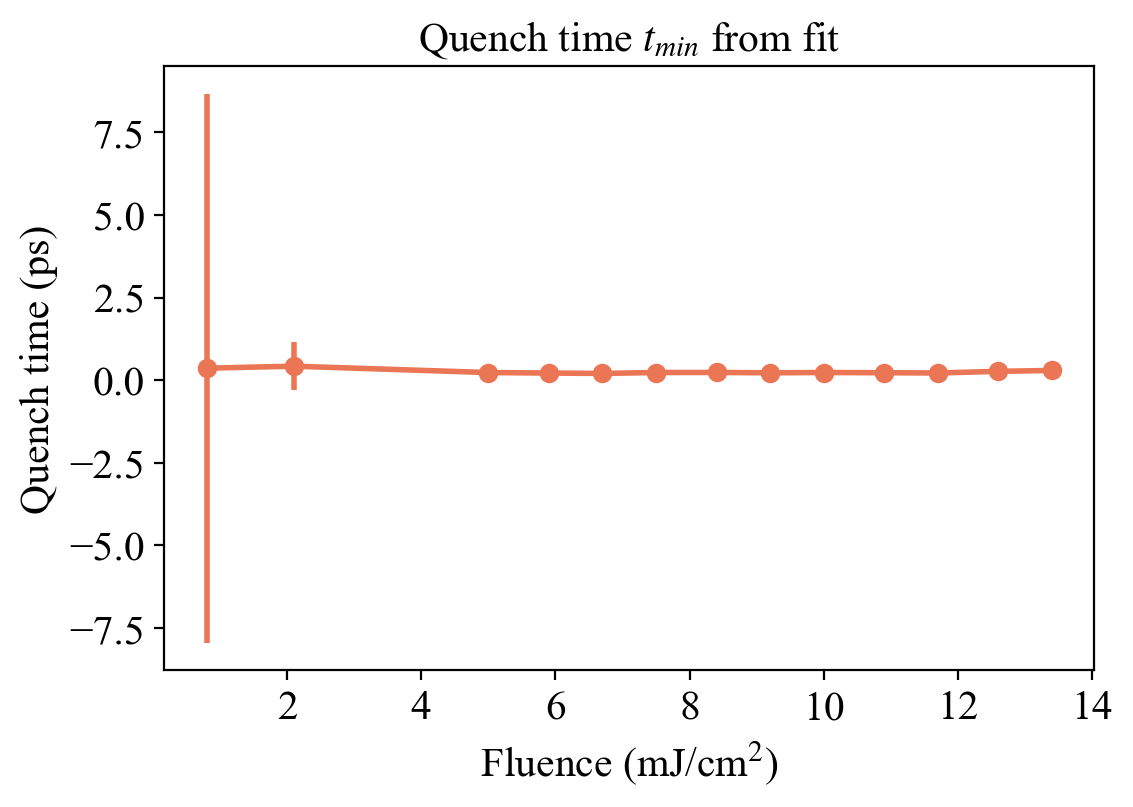

In [54]:
x = fluence_mj_cm
y_0_q = real_quench_time 
y_error = dt_min

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.legend(['-2.3 ps', '0.4 ps'])
#plt.ylim([0, 0.5])
#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Quench time (ps)',fontsize=15)

plt.title('Quench time $t_{min}$ from fit',fontsize=15)

plt.show()

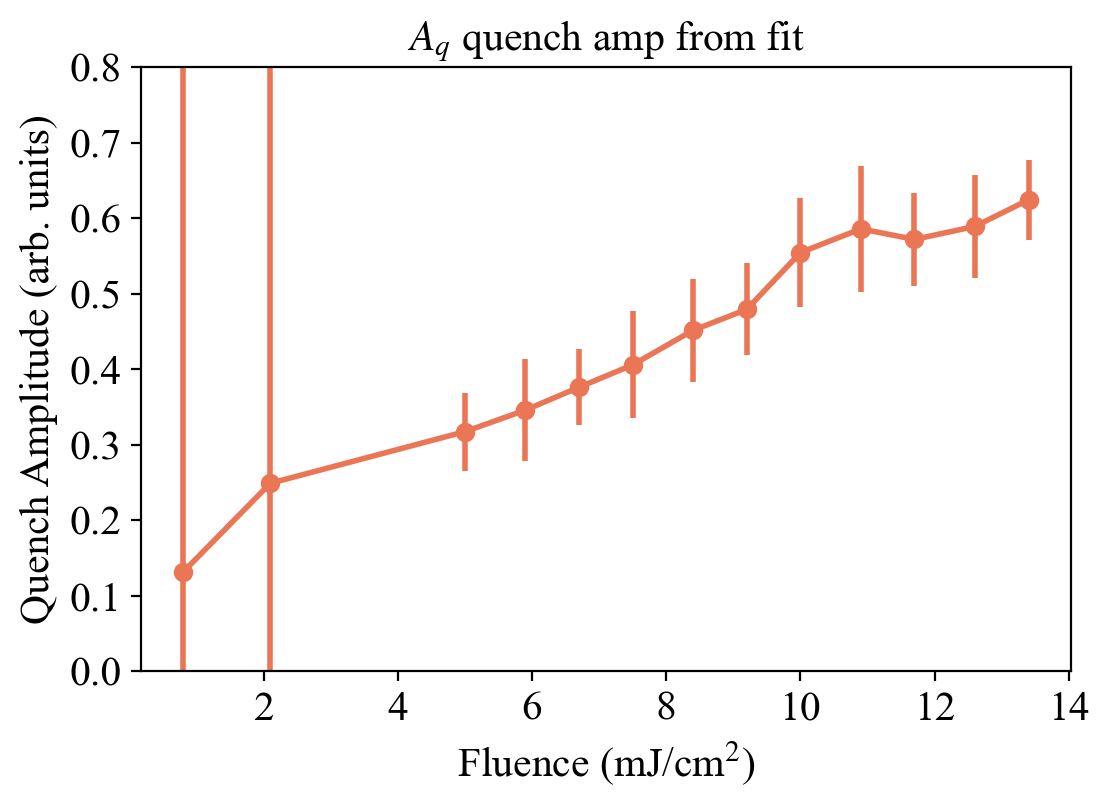

In [55]:
x = fluence_mj_cm
y_0_q = real_quench_amp
y_error = dA_q

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.8])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Quench Amplitude (arb. units)',fontsize=15)

plt.title('$A_q$ quench amp from fit',fontsize=15)

plt.show()

# Fitting in loop with Gaussian convaluation

In [56]:
# def convolved_no_tr2(x, A, B, C, t0, tm, tr, sigma):
#     """
#     decay function (no tr2) convolved with Gaussian 
#     """
#     y = jumpdecay(x, A, B, C, t0, tm, tr)
#     result = vec_gaussian_convolution(x, y, sigma)
#     return result

In [57]:
# set the fit model 
model_gauss_no_tr2 = Model(RJ.convolved_no_tr2)
print('Gauss No tr2')
print('parameter names: {}'.format(model_gauss_no_tr2.param_names))
print('independent variables: {}'.format(model_gauss_no_tr2.independent_vars))

model_tr2 = Model(RJ.convolve_with_tr2)
print('With tr2')
print('parameter names: {}'.format(model_tr2.param_names))
print('independent variables: {}'.format(model_tr2.independent_vars))

model_binomial = Model(RJ.convolve_with_tr2_binomial)
print('With tr2 binomial')
print('parameter names: {}'.format(model_binomial.param_names))
print('independent variables: {}'.format(model_binomial.independent_vars))

Gauss No tr2
parameter names: ['A', 'B', 'C', 't0', 'tm', 'tr', 'sigma']
independent variables: ['x']
With tr2
parameter names: ['A', 'B', 'C', 't0', 'tm', 'tr', 'tr2', 'sigma']
independent variables: ['x']
With tr2 binomial
parameter names: ['A', 'B', 'C', 't0', 'tm', 'tr', 'tr2', 'sigma']
independent variables: ['x']


In [58]:
def full_fit(t, amp, noise, fit_func, algorithm, name_info, guess):
    if fit_func == 'Gauss No tr2':
        params_initial = model_gauss_no_tr2.make_params(A=guess[0], B=guess[1], C=guess[2], t0=guess[3], tm=guess[4], tr=guess[5], sigma=guess[6])
    # elif fit_func == 'with tr2 in sqrt':
    #     params_initial = model_tr2_noGauss.make_params(A=guess[0], B=guess[1], C=guess[2], t0=guess[3], tm=guess[4], tr=guess[5], tr2 = guess[6])
    # elif fit_func == 'with tr2 binomial':
    #     params_initial = model_binomial_noGauss.make_params(A=guess[0], B=guess[1], C=guess[2], t0=guess[3], tm=guess[4], tr=guess[5], tr2 = guess[6])
    params_initial['t0'].vary = True
    params_initial['A'].vary = True
    params_initial['B'].vary = True
    params_initial['C'].vary = True
    params_initial['tm'].vary = True
    params_initial['tr'].vary = True
    params_initial['sigma'].vary = True
    
    params_initial['A'].min = 0.00001
    params_initial['A'].max = 1.0

    params_initial['B'].min = 0.00001
    params_initial['B'].max = 1.0
    
    params_initial['C'].min = 0.9
    params_initial['C'].max = 1.1
    
    params_initial['t0'].min = -0.15
    params_initial['t0'].max = 0.15

    params_initial['tm'].min = 0.00001
    params_initial['tm'].max = 0.5

    params_initial['tr'].min = 0.1
    params_initial['tr'].max = 2.0
    
    params_initial['sigma'].min = 0.03
    params_initial['sigma'].max = 0.06
    
    result = model_gauss_no_tr2.fit(amp, params_initial, x=t, method=algorithm)

    print(result.fit_report())
    fit_error = np.std(result.residual)

    #filename = f'Time_constant_fit_results/fit_{fit_func}_{name_info}'
    # save fit report to a file:
    # with open(f'{filename}.txt', 'w') as fh:
    #     fh.write("True values\n")
    #     fh.write(f"{true}\n")
    #     fh.write(f'{result.fit_report()}\n')
    #     fh.write("Other values\n")
    #     fh.write('noise pre-pump = {:.3f}\n'.format(noise))
    #     fh.write('fit error = {:.3f}\n'.format(fit_error))
    return params_initial, result, fit_error

# Fitting A_0

## Fitting single scan to seed all other fits

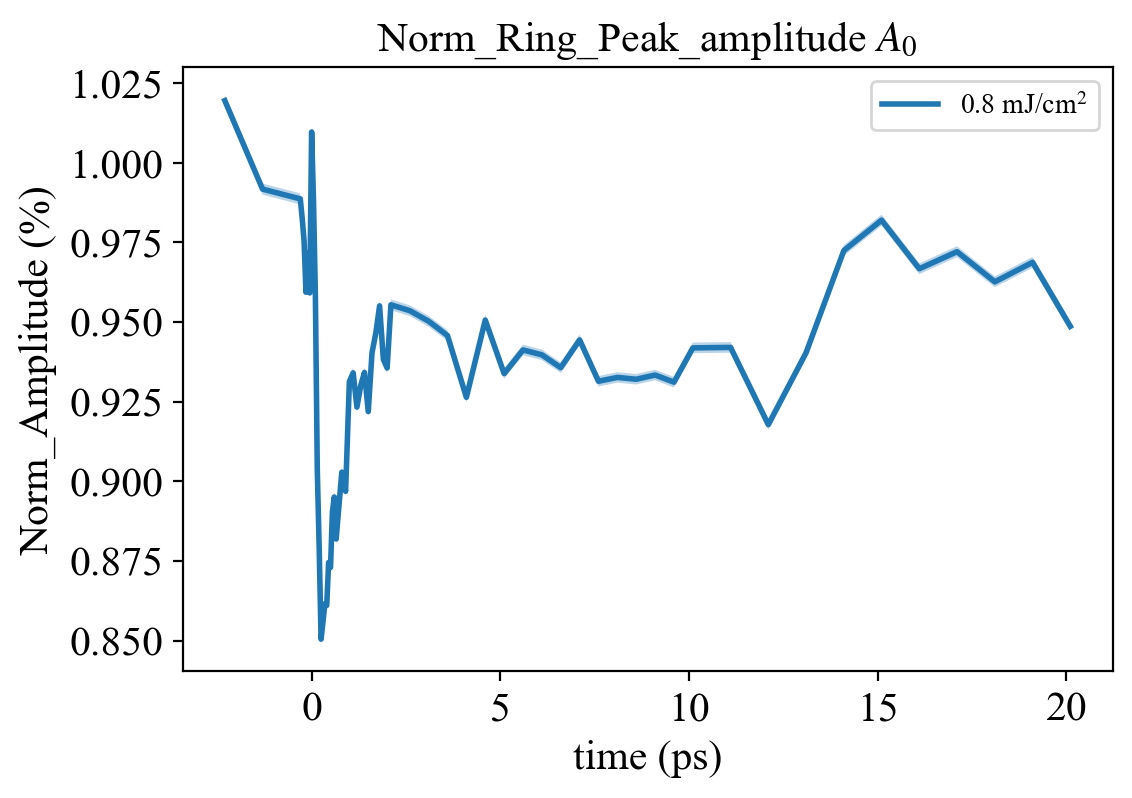

In [59]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
#index = 7
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')
scans_to_plot2 = np.array([0])
for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))*1,\
                       data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index]))*1, linewidth=2, label = fluence_list[i])
        #plot_errorbars(data_fit[i, :, 0], data_fit[i, :, 3]-data_fit[i, 0, 3], data_error[i, :, 3], linewidth=2)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude (%)',fontsize=15)

#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
#plt.xlim(-2.5, 10)
plt.legend()

plt.title('Norm_Ring_Peak_amplitude $A_0$',fontsize=15)
plt.show()

In [60]:
#index = 7
i = scans_to_plot2[0]
t = data_fit[i][ :, 0]
amp = data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))
noise = abs(np.average(data_fit[i][ 0:3, index]))

In [61]:
guess = [results_12.values['A'], results_12.values['B'], results_12.values['C'], results_12.values['t0'], results_12.values['tm'], results_12.values['tr'], 0.05]
algorithm = 'least_squares'
name_info = 'noise_' + str(noise) + '_all_fixed' #+ '_boundaries' #
fit_func = 'Gauss No tr2' #'No tr2' or 'with tr2 in sqrt' or 'with tr2 binomial'

params_initial, result, fit_error = full_fit(t, amp, noise, fit_func, algorithm, name_info, guess)
# decay, first_recovery, second_recovery = each_term(t, result, fit_func)
# fig = plot_fig_sim(t, amp, fit_func, result, noise, fit_error, decay, first_recovery, second_recovery, name_info, taille=10)



[[Model]]
    Model(convolved_no_tr2)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 19
    # data points      = 63
    # variables        = 7
    chi-square         = 0.01177657
    reduced chi-square = 2.1030e-04
    Akaike info crit   = -526.840996
    Bayesian info crit = -511.839053
[[Variables]]
    A:      0.19737673 +/- 0.04756138 (24.10%) (init = 0.7528722)
    B:      0.15916178 +/- 0.04670169 (29.34%) (init = 0.6490867)
    C:      0.98475993 +/- 0.00470627 (0.48%) (init = 1)
    t0:     0.09142173 +/- 0.01952617 (21.36%) (init = 0)
    tm:     0.08067193 +/- 0.04621166 (57.28%) (init = 0.08863952)
    tr:     0.51906835 +/- 0.12665605 (24.40%) (init = 1.734938)
    sigma:  0.03000000 +/- 0.03319063 (110.64%) (init = 0.05)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)      = 0.993
    C(A, tr)     = -0.905
    C(B, tr)     = -0.897
    C(B, tm)     = 0.896
    C(A, tm)     = 0.885
    C(t0, tm)    = -0.864
    C(t0, si

In [62]:
result

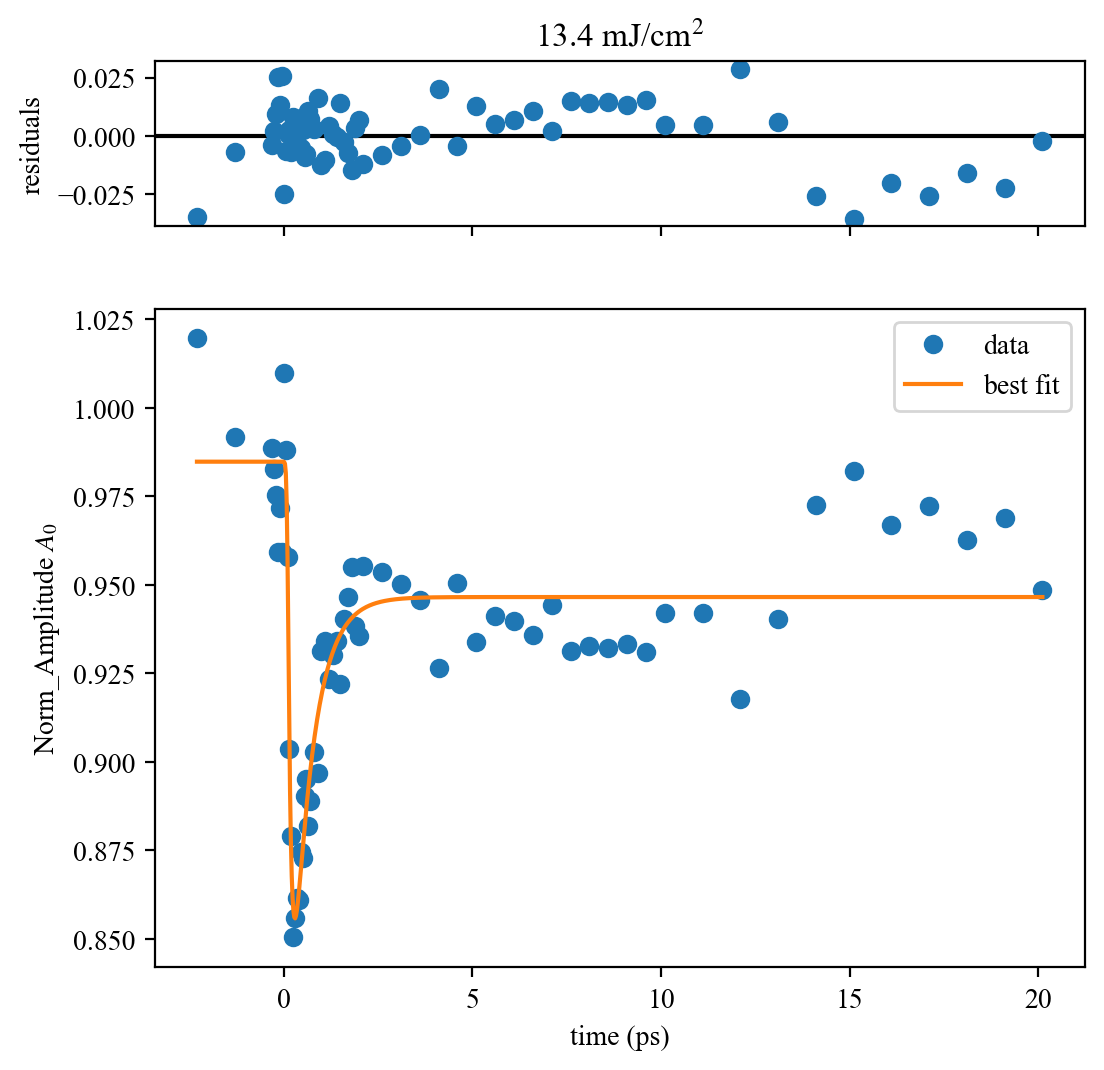

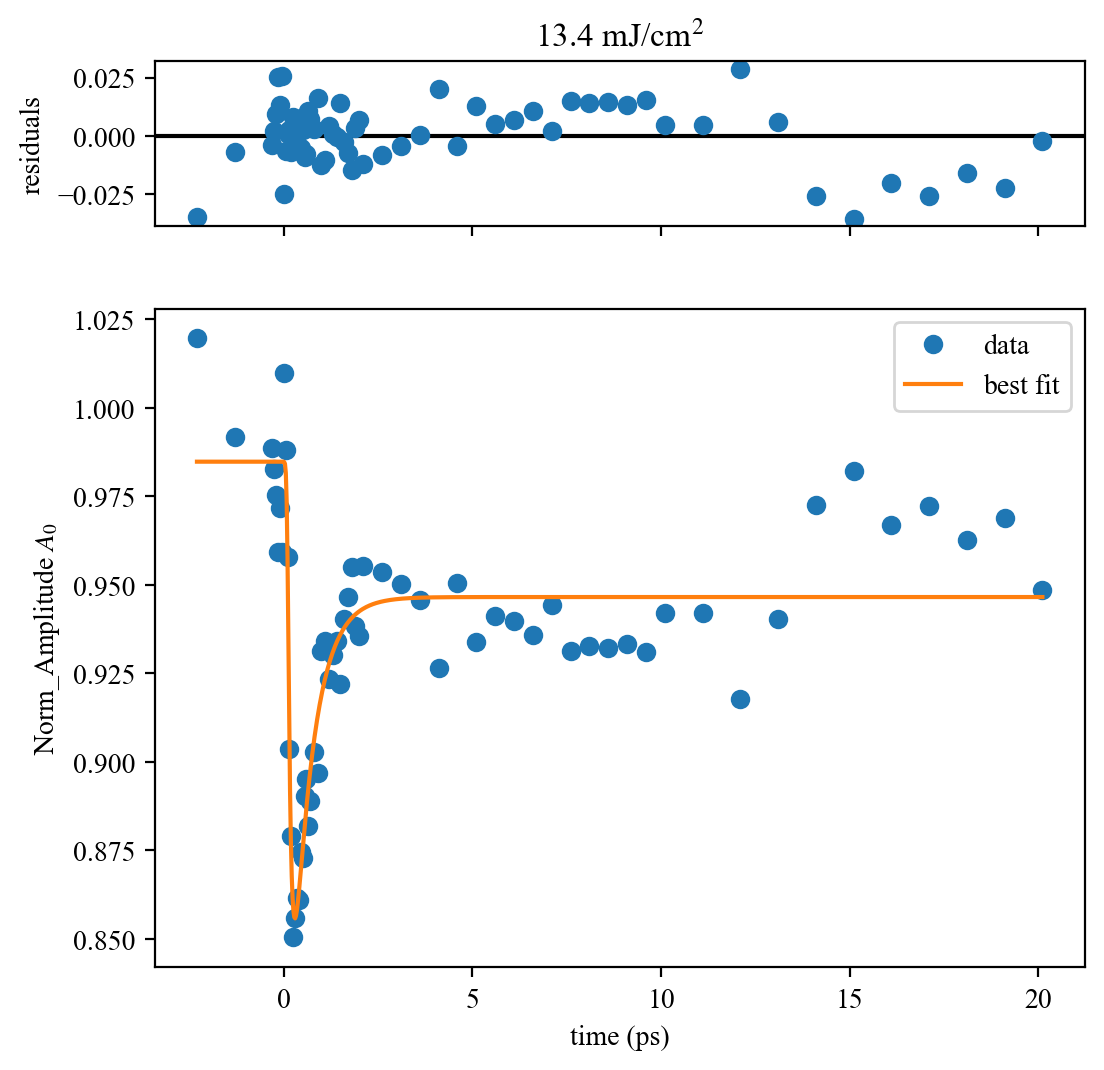

In [63]:
result.plot(xlabel='time (ps)', ylabel='Norm_Amplitude $A_0$', numpoints = 1000, title=fluence_list[12])

## Fitting in a loop

In [64]:
#index = 7
savedir = 'Time_constant_fit_results/Fit_results_1'
for i in range (0, (nb_file_BG)):
    if i == 0:
        
        # Creating empty np array to store the fit parameters
        A_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # A
        B_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # B
        C_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # C
        
        t_0_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # t_0
        A_1_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # A_1
        A_2_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # A_2
        t_m_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # tm
        t_r_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # tr
        A_q_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # Real quench A_q
        t_min_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # Real quench time t_min
        sigma_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # Sigma
        
        # Creating empty np array for errors
        dA_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA
        dB_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dB
        dC_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dC
        dt_0_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_0
        dt_m_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_m
        dt_r_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_r
        dA_1_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA_1
        dA_2_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA_2
        dt_min_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_min
        dA_q_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA_q
        dsigma_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dSigma
        
        lmfit_results_A0 = []
    
    t = data_fit[i][ :, 0]
    amp = data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))
    noise = abs(np.average(data_fit[i][ 0:3, index]))
    
    guess = [globals()['results_%s' % i].values['A'], globals()['results_%s' % i].values['B'], globals()['results_%s' % i].values['C'],\
             globals()['results_%s' % i].values['t0'], globals()['results_%s' % i].values['tm'], globals()['results_%s' % i].values['tr'], 0.05]
    
    algorithm = 'least_squares'
    name_info = 'noise_' + str(noise) + '_all_fixed' #+ '_boundaries' #
    fit_func = 'Gauss No tr2' #'No tr2' or 'with tr2 in sqrt' or 'with tr2 binomial'

    params_initial, result, fit_error = full_fit(t[t<10.5], amp[t<10.5], noise, fit_func, algorithm, name_info, guess)
    
    #calculating things for plots
    A_A0[i] = result.values['A'] # A
    B_A0[i] = result.values['B'] # B
    C_A0[i] = result.values['C'] # C
    
    t_0_A0[i] = result.values['t0']
    A_1_A0[i] = result.values['A'] - result.values['B']*(result.values['tm']/result.values['tr'])
    A_2_A0[i] = result.values['A'] - result.values['B']
    t_m_A0[i] = result.values['tm']
    t_r_A0[i] = result.values['tr']
    # real_quench_amp_A0[i] = result.values['A']*(1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr']-result.values['tm'])))\
    # - result.values['B']*(1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr']-result.values['tm'])))
    
    t_min_A0[i] = result.values['t0'] - ((result.values['tm']*result.values['tr'])/(result.values['tr']-result.values['tm']))\
    *(math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))
    
    A_q_A0[i] = 1 - (result.values['C'] + result.values['A']*math.exp(-(t_min_A0[i]-result.values['t0'])/result.values['tm'])\
    - result.values['B']*math.exp(-(t_min_A0[i]-result.values['t0'])/result.values['tr']) + result.values['B'] - result.values['A'])/result.values['C']
    
    sigma_A0[i] = result.values['sigma'] #sigma
    
    dA_A0[i] = result.params['A'].stderr # dA
    dB_A0[i] = result.params['B'].stderr # dB
    dC_A0[i] = result.params['C'].stderr # dC
    dt_0_A0[i] = result.params['t0'].stderr # dt_0
    dt_m_A0[i] = result.params['tm'].stderr # dt_m
    dt_r_A0[i] = result.params['tr'].stderr # dt_r
    
    dA_1_A0[i] = math.sqrt(dA_A0[i]**2 + (dB_A0[i]*result.values['tm']/result.values['tr'])**2 + (dt_m_A0[i]*result.values['B']/result.values['tr'])**2\
                        + (dt_r_A0[i]*result.values['B']*result.values['tm']/(result.values['tr'])**2)**2) # dA_1
    dA_2_A0[i] = math.sqrt(dA_A0[i]**2 + dB_A0[i]**2) # dA_2
    
    
    dt_min_dA = (dA_A0[i]*result.values['tm']*result.values['tr'])/(result.values['A']*(result.values['tr']-result.values['tm']))
    dt_min_dB = (dB_A0[i]*result.values['tm']*result.values['tr'])/(result.values['B']*(result.values['tr']-result.values['tm']))
    
    dt_min_dtm = result.values['tr']/(result.values['tr']-result.values['tm'])*(1 + (result.values['tr']/(result.values['tr']-result.values['tm']))\
                                                                                *math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))*dt_m_A0[i]
    
    dt_min_dtr = result.values['tm']/(result.values['tr']-result.values['tm'])*(1 + (result.values['tm']/(result.values['tr']-result.values['tm']))\
                                                                                *math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))*dt_r_A0[i]
    
    # dt_min
    dt_min_A0[i] = math.sqrt(dt_0_A0[i]**2 + dt_min_dA**2 + dt_min_dtm**2 + dt_min_dtr**2) # dt_min
    
    dA_q_dA = (1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr']-result.values['tm'])))*dA_A0[i]
    
    dA_q_dB = (1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr']-result.values['tm'])))*dB_A0[i]
    
    dA_q_dtr = 1/(result.values['tr']*(result.values['tr'] - result.values['tm'])**2)*(result.values['A']*result.values['tr']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tm']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))\
                                                                                       - result.values['B']*result.values['tm']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tr']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))))*dt_r_A0[i]
    
    dA_q_dtm = 1/(result.values['tm']*(result.values['tr'] - result.values['tm'])**2)*(result.values['B']*result.values['tm']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tr']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))\
                                                                                       - result.values['A']*result.values['tr']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tm']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))))*dt_m_A0[i]
    #dA_q
    dA_q_A0[i] = math.sqrt(dC_A0[i]**2 + dA_q_dA**2 + dA_q_dB**2 + dA_q_dtr**2 + dA_q_dtm**2) # dA_q
    
    #sigma error
    dsigma_A0[i] = result.params['sigma'].stderr # dsigma
    
    #saving model fits
    
    globals()['results_A0_%s' % i] = result
    #lmfit.model.save_modelresult(result, file_1)
    
    lmfit_results_A0.append(result)


[[Model]]
    Model(convolved_no_tr2)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 53
    # data points      = 53
    # variables        = 7
    chi-square         = 0.00650832
    reduced chi-square = 1.4149e-04
    Akaike info crit   = -463.263216
    Bayesian info crit = -449.471173
[[Variables]]
    A:      0.22392995 +/- 0.06999052 (31.26%) (init = 0.9999905)
    B:      0.17991425 +/- 0.06903552 (38.37%) (init = 0.9416809)
    C:      0.98479896 +/- 0.00386968 (0.39%) (init = 1)
    t0:     0.08987279 +/- 0.01636351 (18.21%) (init = 0)
    tm:     0.09217976 +/- 0.04498402 (48.80%) (init = 0.2577999)
    tr:     0.42319452 +/- 0.11151502 (26.35%) (init = 0.3339926)
    sigma:  0.03000000 +/- 0.02794475 (93.15%) (init = 0.05)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)      = 0.998
    C(A, tr)     = -0.938
    C(B, tr)     = -0.932
    C(B, tm)     = 0.930
    C(A, tm)     = 0.925
    C(t0, tm)    = -0.844
    C(tm, tr)

In [65]:
# file_1 = savedir + 'A_0_' + algorithm + '_' + 'lmfit_results' + '.pkl'
# df1 = pd.DataFrame(lmfit_results_A0)
# #df1.to_pickle(file_1)

In [66]:
file_2 = savedir + 'A_0_' + algorithm + '_' + 'fluence_vs_params' + '.pkl'

fluence_vs_params_A0 = np.empty([nb_file_BG, 22], dtype = np.float32)

fluence_vs_params_A0[:, 0] = A_A0
fluence_vs_params_A0[:, 1] = dA_A0

fluence_vs_params_A0[:, 2] = B_A0
fluence_vs_params_A0[:, 3] = dB_A0

fluence_vs_params_A0[:, 4] = C_A0
fluence_vs_params_A0[:, 5] = dC_A0

fluence_vs_params_A0[:, 6] = t_0_A0
fluence_vs_params_A0[:, 7] = dt_0_A0

fluence_vs_params_A0[:, 8] = t_m_A0
fluence_vs_params_A0[:, 9] = dt_m_A0

fluence_vs_params_A0[:, 10] = t_r_A0
fluence_vs_params_A0[:, 11] = dt_r_A0

fluence_vs_params_A0[:, 12] = A_1_A0
fluence_vs_params_A0[:, 13] = dA_1_A0

fluence_vs_params_A0[:, 14] = A_2_A0
fluence_vs_params_A0[:, 15] = dA_2_A0

fluence_vs_params_A0[:, 16] = A_q_A0
fluence_vs_params_A0[:, 17] = dA_q_A0

fluence_vs_params_A0[:, 18] = t_min_A0
fluence_vs_params_A0[:, 19] = dt_min_A0

fluence_vs_params_A0[:, 20] = sigma_A0
fluence_vs_params_A0[:, 21] = dsigma_A0

column_labels = ['A', 'dA', 'B', 'dB', 'C', 'dC', 't_0', 'dt_0', 't_m', 'dt_m', 't_r', 'dt_r', 'A_1', 'dA_1', 'A_2', 'dA_2', 'A_q', 'dA_q', 't_min', 'dt_min', 'sigma', 'dsigma']

df2 = pd.DataFrame(fluence_vs_params_A0, columns=column_labels, index=fluence_list)
#df2.to_pickle(file_2)

In [67]:
df2

A        dA         B        dB         C        dC  \
0.8 mJ/cm$^2$   0.223930  0.069991  0.179914  0.069036  0.984799  0.003870   
2.1 mJ/cm$^2$   0.341945  0.019507  0.264782  0.018858  0.994044  0.003075   
5.0 mJ/cm$^2$   0.458953  0.058613  0.392455  0.056748  0.999589  0.005565   
5.9 mJ/cm$^2$   0.634732  0.102300  0.575568  0.101082  1.002529  0.004291   
6.7 mJ/cm$^2$   0.528683  0.030590  0.479836  0.029656  1.003392  0.003596   
7.5 mJ/cm$^2$   0.614288  0.043538  0.553391  0.042875  1.005216  0.003715   
8.4 mJ/cm$^2$   0.698840  0.039415  0.622530  0.038721  0.997059  0.002932   
9.2 mJ/cm$^2$   0.694641  0.030333  0.618923  0.029495  0.999968  0.003101   
10.0 mJ/cm$^2$  0.781545  0.055751  0.657187  0.053759  0.997383  0.005771   
10.9 mJ/cm$^2$  0.822096  0.043511  0.679581  0.041794  0.999039  0.005508   
11.7 mJ/cm$^2$  0.772906  0.047778  0.688770  0.045041  1.000494  0.007740   
12.6 mJ/cm$^2$  0.823312  0.039132  0.754968  0.036981  1.006239  0.005516   
13.4 mJ/cm$^2$  0.803614  0.019924  0.694851  0.018253  1.000861  0.003887   

                     t_0      dt_0       t_m      dt_m  ...       A_1  \
0.8 mJ/cm$^2$   0.089873  0.016364  0.092180  0.044984  ...  0.184741   
2.1 mJ/cm$^2$   0.098810  0.012150  0.060652  0.025919  ...  0.321174   
5.0 mJ/cm$^2$  -0.045535  0.016888  0.119001  0.031639  ...  0.409805   
5.9 mJ/cm$^2$  -0.054726  0.007045  0.146754  0.027530  ...  0.508046   
6.7 mJ/cm$^2$  -0.047179  0.010743  0.100024  0.016428  ...  0.479768   
7.5 mJ/cm$^2$  -0.036182  0.009548  0.108162  0.018059  ...  0.543624   
8.4 mJ/cm$^2$  -0.043155  0.006357  0.126016  0.013146  ...  0.606045   
9.2 mJ/cm$^2$  -0.043279  0.006218  0.113825  0.011344  ...  0.620642   
10.0 mJ/cm$^2$ -0.055133  0.009708  0.125910  0.022027  ...  0.704317   
10.9 mJ/cm$^2$ -0.081516  0.006782  0.138271  0.015374  ...  0.740779   
11.7 mJ/cm$^2$ -0.062037  0.008383  0.120383  0.019999  ...  0.709386   
12.6 mJ/cm$^2$ -0.048281  0.009422  0.127519  0.015967  ...  0.750286   
13.4 mJ/cm$^2$ -0.032521  0.005343  0.116120  0.009593  ...  0.753231   

                    dA_1       A_2      dA_2       A_q      dA_q     t_min  \
0.8 mJ/cm$^2$   0.074814  0.044016  0.098309  0.132644  0.074219  0.295278   
2.1 mJ/cm$^2$   0.021530  0.077163  0.027132  0.271025  0.028882  0.283168   
5.0 mJ/cm$^2$   0.061218  0.066498  0.081583  0.315961  0.063987  0.258387   
5.9 mJ/cm$^2$   0.108785  0.059164  0.143816  0.343144  0.104246  0.248510   
6.7 mJ/cm$^2$   0.031990  0.048847  0.042605  0.376462  0.034519  0.217934   
7.5 mJ/cm$^2$   0.045793  0.060897  0.061105  0.410496  0.047955  0.231962   
8.4 mJ/cm$^2$   0.041399  0.076310  0.055252  0.449560  0.042090  0.255846   
9.2 mJ/cm$^2$   0.031689  0.075717  0.042309  0.477773  0.033209  0.246228   
10.0 mJ/cm$^2$  0.058201  0.124358  0.077448  0.551938  0.061630  0.275093   
10.9 mJ/cm$^2$  0.045200  0.142514  0.060332  0.579918  0.047400  0.281855   
11.7 mJ/cm$^2$  0.049536  0.084137  0.065661  0.568925  0.053520  0.269337   
12.6 mJ/cm$^2$  0.040671  0.068344  0.053842  0.590777  0.043607  0.293718   
13.4 mJ/cm$^2$  0.020540  0.108763  0.027021  0.627229  0.022794  0.314210   

                  dt_min     sigma    dsigma  
0.8 mJ/cm$^2$   0.082887  0.030000  0.027945  
2.1 mJ/cm$^2$   0.058859  0.060000  0.018520  
5.0 mJ/cm$^2$   0.063781  0.043052  0.013254  
5.9 mJ/cm$^2$   0.050880  0.036470  0.013496  
6.7 mJ/cm$^2$   0.033271  0.049430  0.006551  
7.5 mJ/cm$^2$   0.033948  0.056944  0.007468  
8.4 mJ/cm$^2$   0.024400  0.049263  0.005189  
9.2 mJ/cm$^2$   0.022169  0.046316  0.004907  
10.0 mJ/cm$^2$  0.043944  0.044167  0.015708  
10.9 mJ/cm$^2$  0.031606  0.043783  0.008935  
11.7 mJ/cm$^2$  0.041611  0.040258  0.015273  
12.6 mJ/cm$^2$  0.032738  0.050833  0.007368  
13.4 mJ/cm$^2$  0.021961  0.049411  0.005831  

[13 rows x 22 columns]

# Plot all the data

## Saving fit figures and making a gif

In [68]:
# fig_name = []
# for i in range (0, (nb_file_BG)):
#     x = 'Norm_Amplitude_A_0_' + str(i)
#     fig_name.append(x)

In [69]:
# fig_save_dir = 'Time_constant_fit_results/'

# for i in range (0, (nb_file_BG)):
#     (globals()['results_A0_%s' % i].plot(xlabel='time (ps)', ylabel='Norm_Amplitude $A_0$', numpoints = 1000, title=fluence_list[i]))
#     plt.ylim(0.55,1.05)
#     plt.xlim(-2.5, 10.5)
#     plt.savefig(fig_save_dir+fig_name[i])
#     plt.clf()

In [70]:
# gif_save_dir = 'Time_constant_fit_results/'
# gif_name = 'A0.gif'
# RJ.gen_gif(fig_save_dir, gif_save_dir, gif_name, 3)

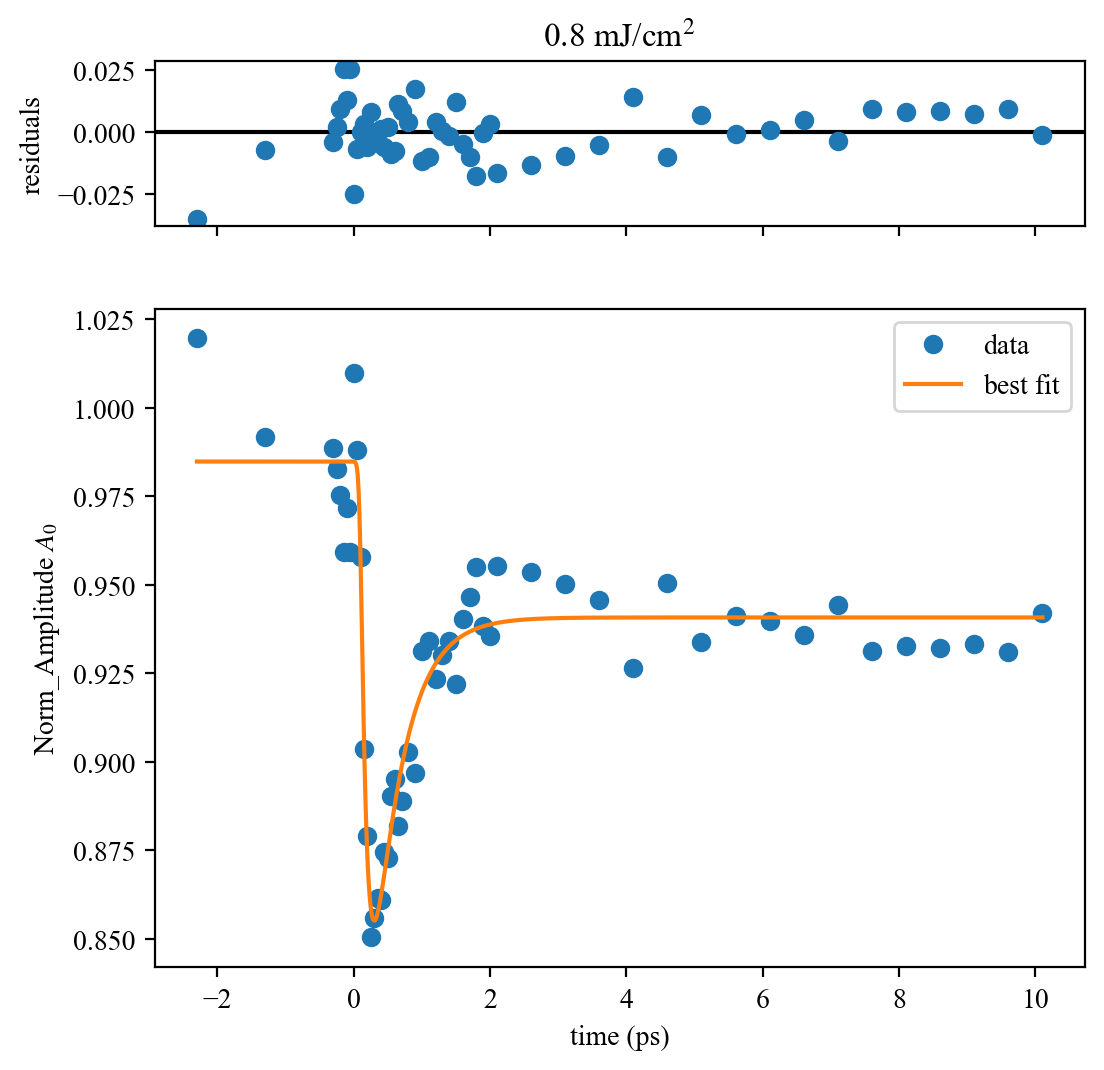

In [71]:
i = 0
fig_1 = (globals()['results_A0_%s' % i].plot(xlabel='time (ps)', ylabel='Norm_Amplitude $A_0$', numpoints = 1000, title=fluence_list[i]))
# plt.ylim(0.55,1.05)
# plt.xlim(-2.5, 10.5)
plt.show(fig_1)

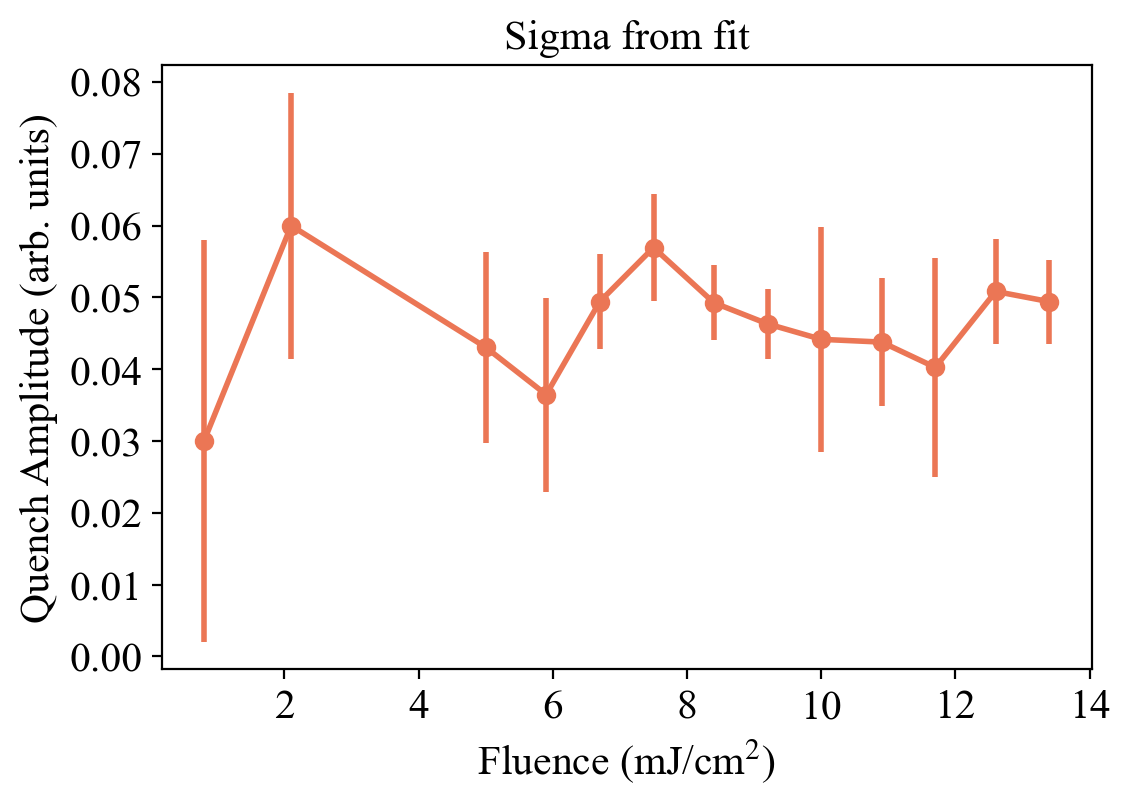

In [72]:
x = fluence_mj_cm
y_0_q = sigma_A0
y_error = dsigma_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 1])
#plt.legend(['-2.3 ps', '0.4 ps'])

plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.ylabel('Quench Amplitude (arb. units)',fontsize=15)

plt.title('Sigma from fit',fontsize=15)

plt.show()

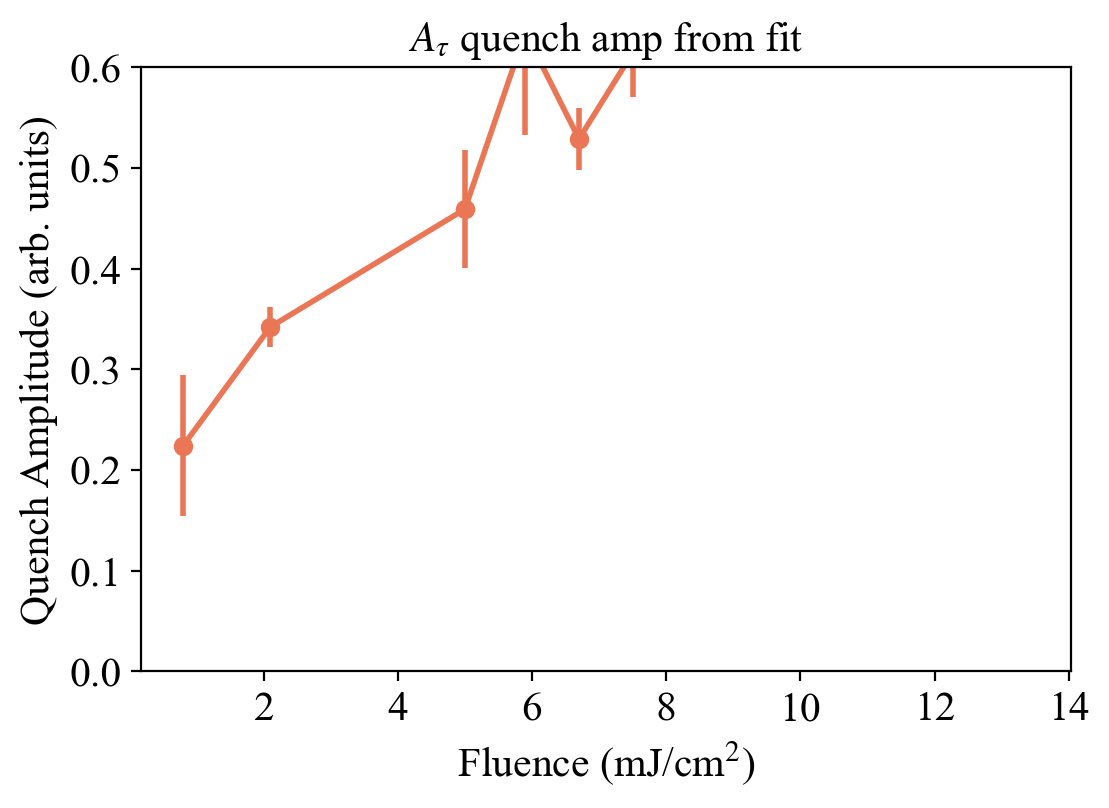

In [73]:
x = fluence_mj_cm
y_0_q = A_A0
y_error = dA_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.6])
#plt.legend(['-2.3 ps', '0.4 ps'])

plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.ylabel('Quench Amplitude (arb. units)',fontsize=15)

plt.title('$A_{\u03C4}$ quench amp from fit',fontsize=15)

plt.show()

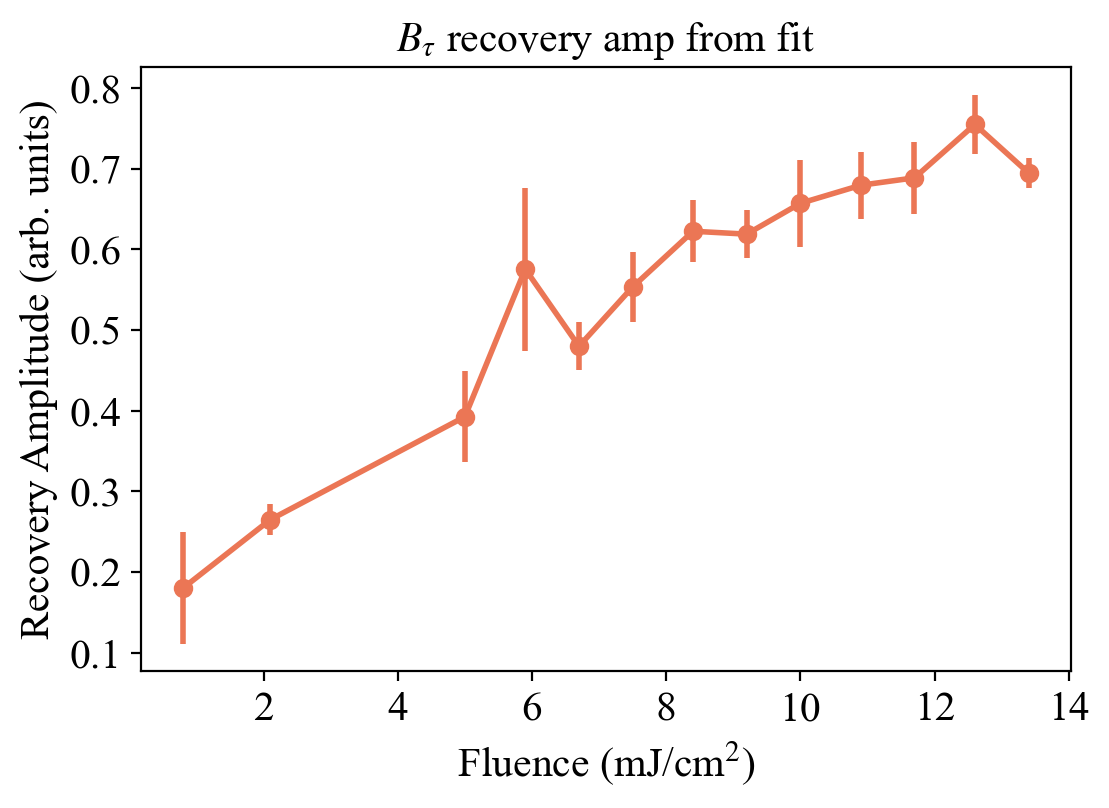

In [74]:
x = fluence_mj_cm
y_0_q = B_A0
y_error = dB_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 0.5])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Recovery Amplitude (arb. units)',fontsize=15)

plt.title('$B_{\u03C4}$ recovery amp from fit',fontsize=15)

plt.show()

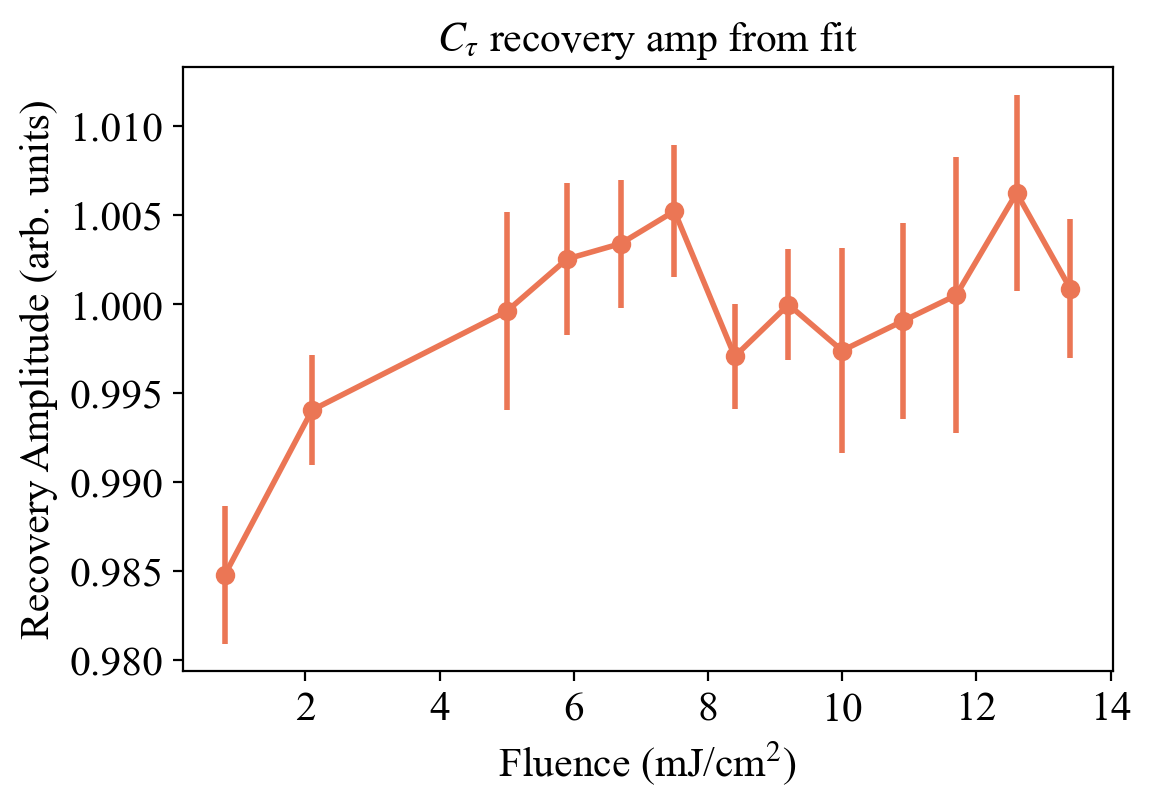

In [75]:
x = fluence_mj_cm
y_0_q = C_A0
y_error = dC_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 0.5])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Recovery Amplitude (arb. units)',fontsize=15)

plt.title('$C_{\u03C4}$ recovery amp from fit',fontsize=15)

plt.show()

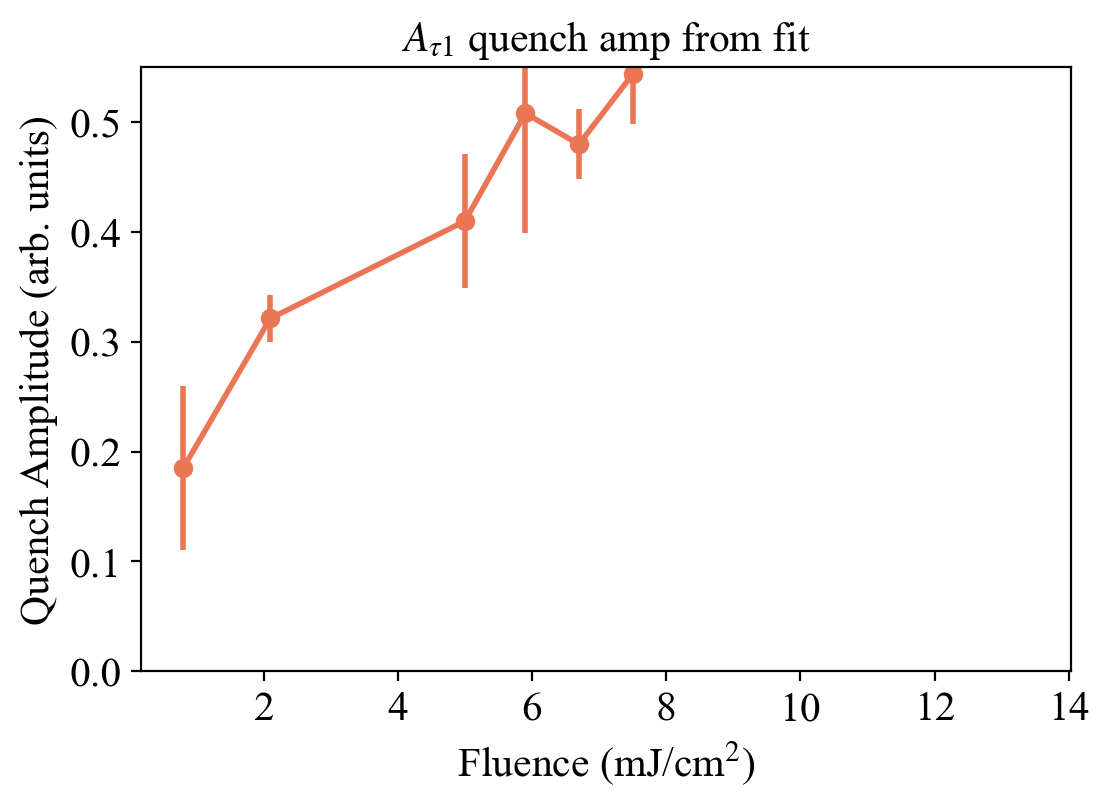

In [76]:
x = fluence_mj_cm
y_0_q = A_1_A0
y_error = dA_1_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.55])
#plt.legend(['-2.3 ps', '0.4 ps'])

plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.ylabel('Quench Amplitude (arb. units)',fontsize=15)

plt.title('$A_{\u03C41}$ quench amp from fit',fontsize=15)

plt.show()

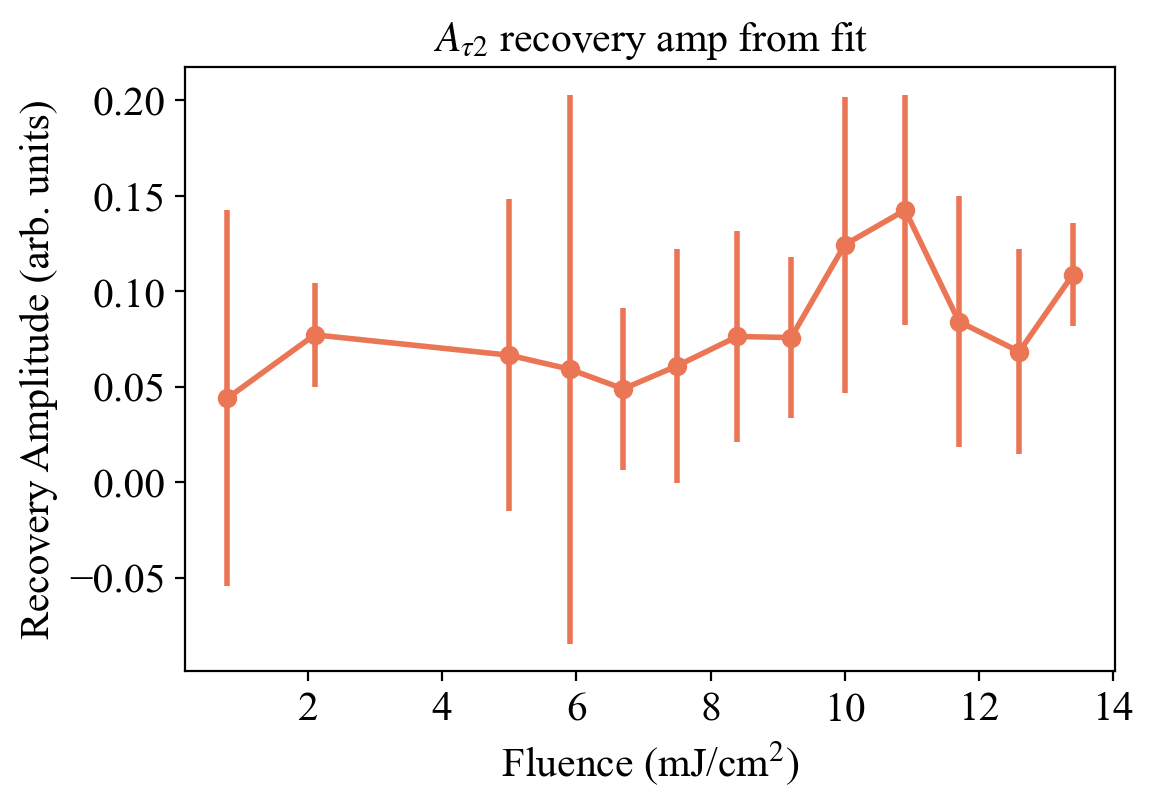

In [77]:
x = fluence_mj_cm
y_0_q = A_2_A0
y_error = dA_2_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 0.5])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Recovery Amplitude (arb. units)',fontsize=15)

plt.title('$A_{\u03C42}$ recovery amp from fit',fontsize=15)

plt.show()

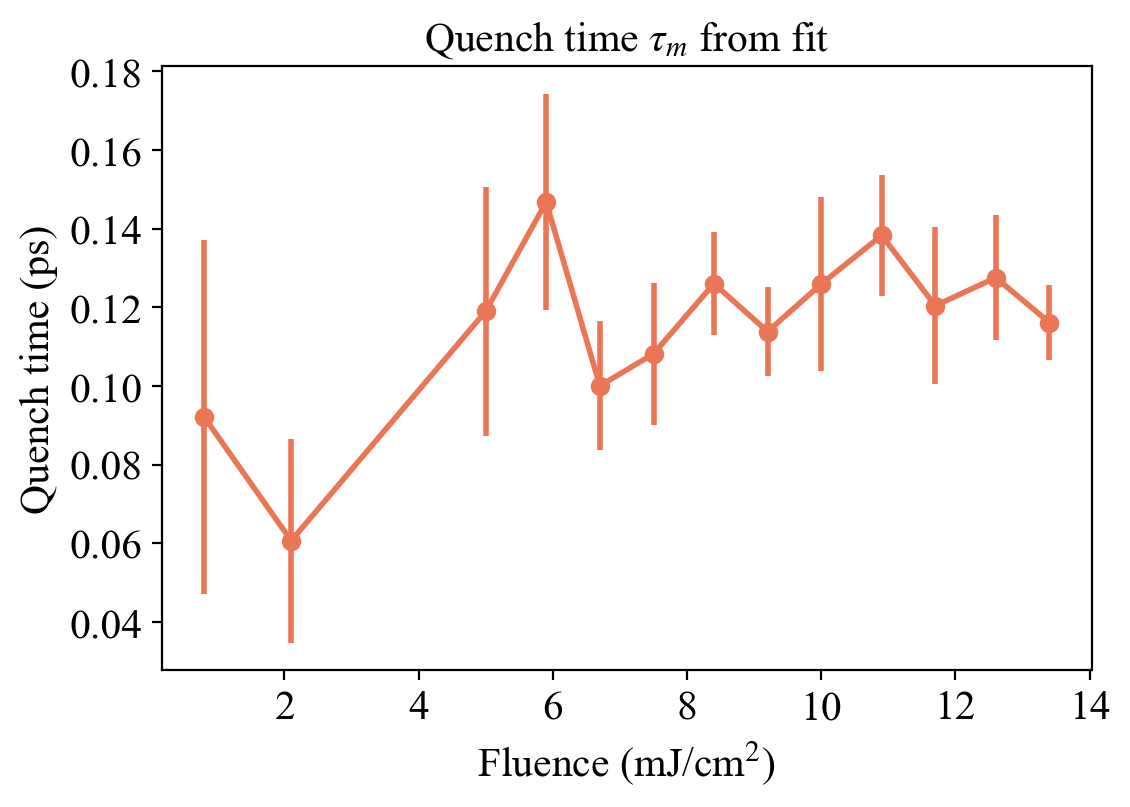

In [78]:
x = fluence_mj_cm
y_0_q = t_m_A0
y_error = dt_m_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 0.4])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Quench time (ps)',fontsize=15)

plt.title('Quench time $\u03C4_m$ from fit',fontsize=15)

plt.show()

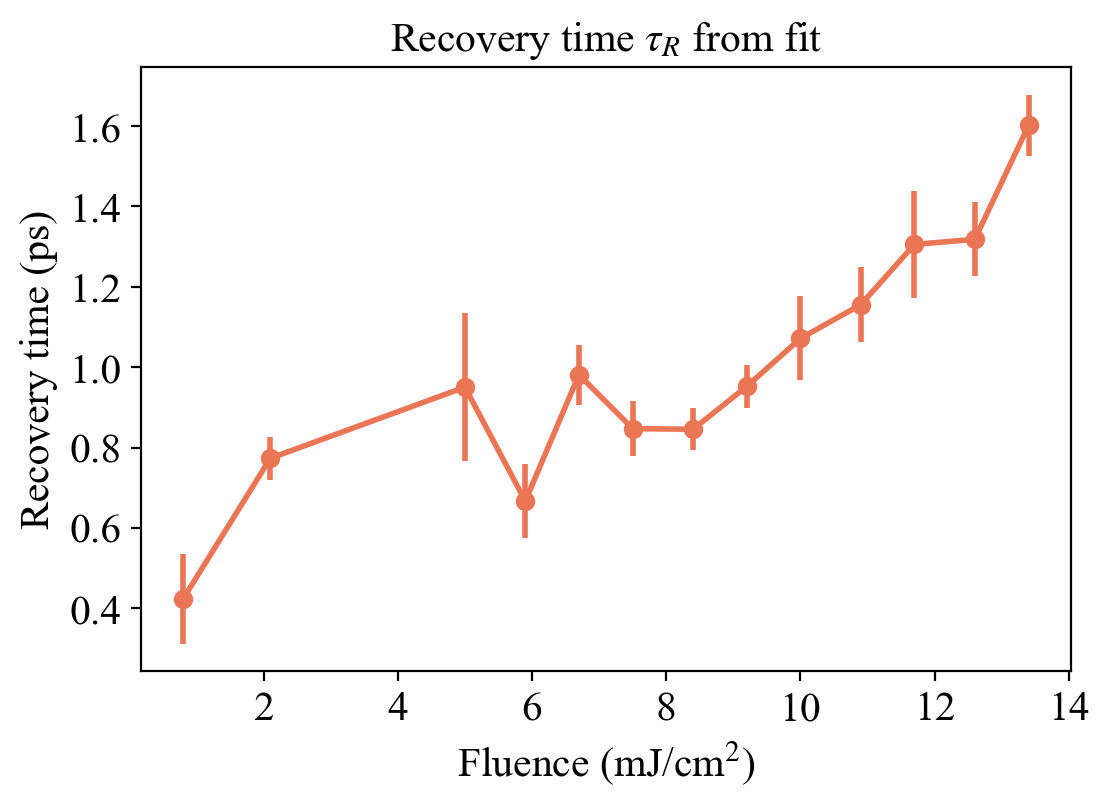

In [79]:
x = fluence_mj_cm
y_0_q = t_r_A0
y_error = dt_r_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 2.5])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Recovery time (ps)',fontsize=15)

plt.title('Recovery time $\u03C4_R$ from fit',fontsize=15)

plt.show()

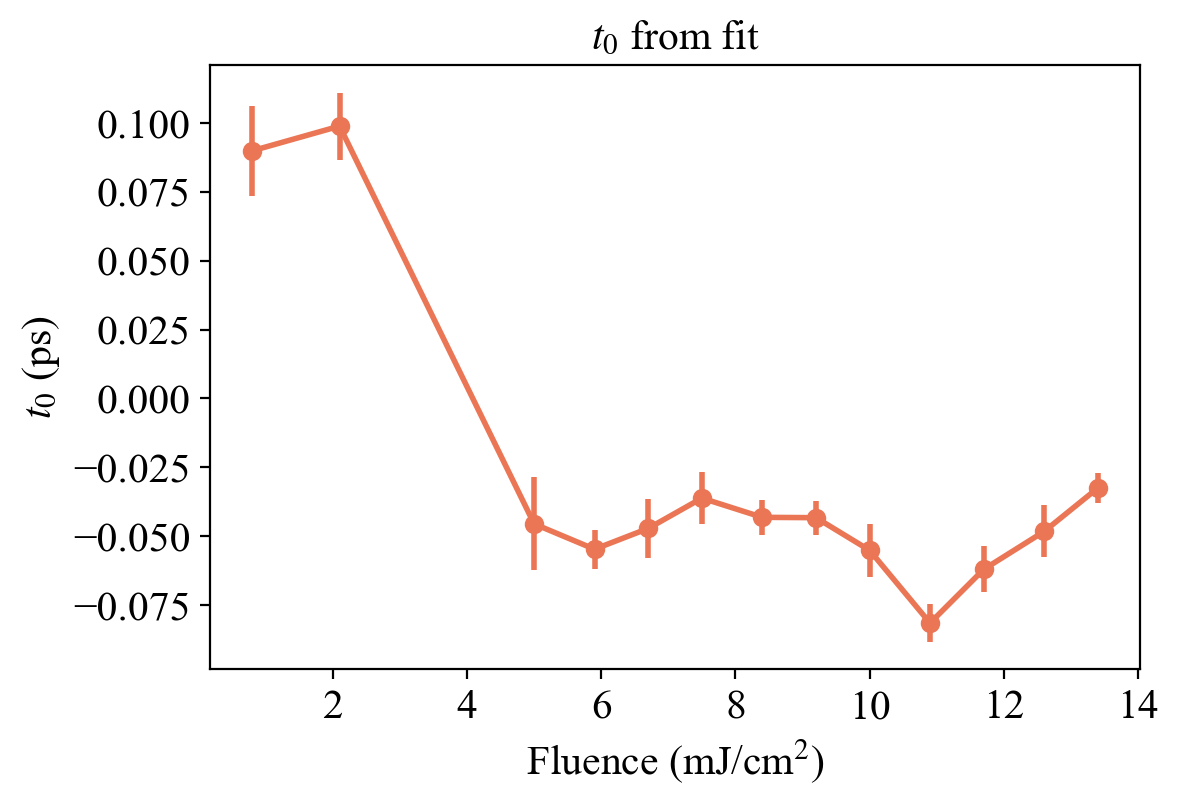

In [80]:
x = fluence_mj_cm
y_0_q = t_0_A0
y_error = dt_0_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('$t_0$ (ps)',fontsize=15)

plt.title('$t_0$ from fit',fontsize=15)

plt.show()

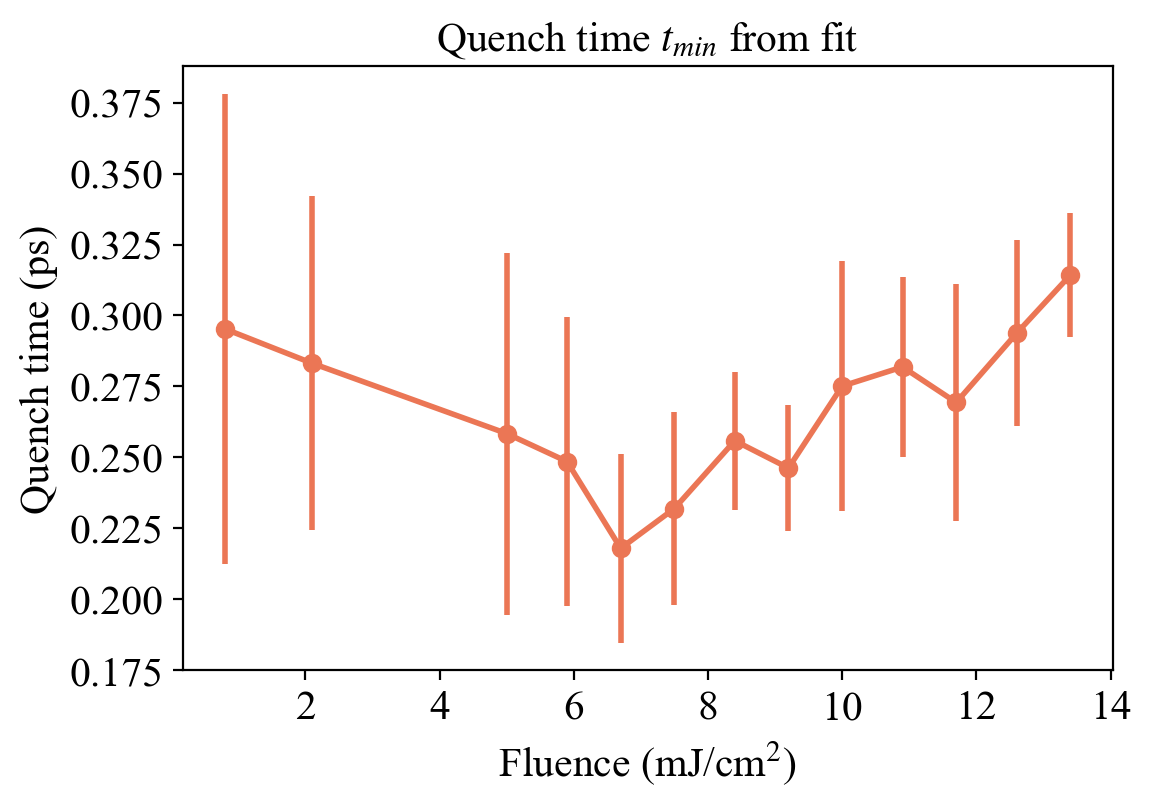

In [81]:
x = fluence_mj_cm
y_0_q = t_min_A0
y_error = dt_min_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.legend(['-2.3 ps', '0.4 ps'])
#plt.ylim([0, 0.5])
#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Quench time (ps)',fontsize=15)

plt.title('Quench time $t_{min}$ from fit',fontsize=15)

plt.show()

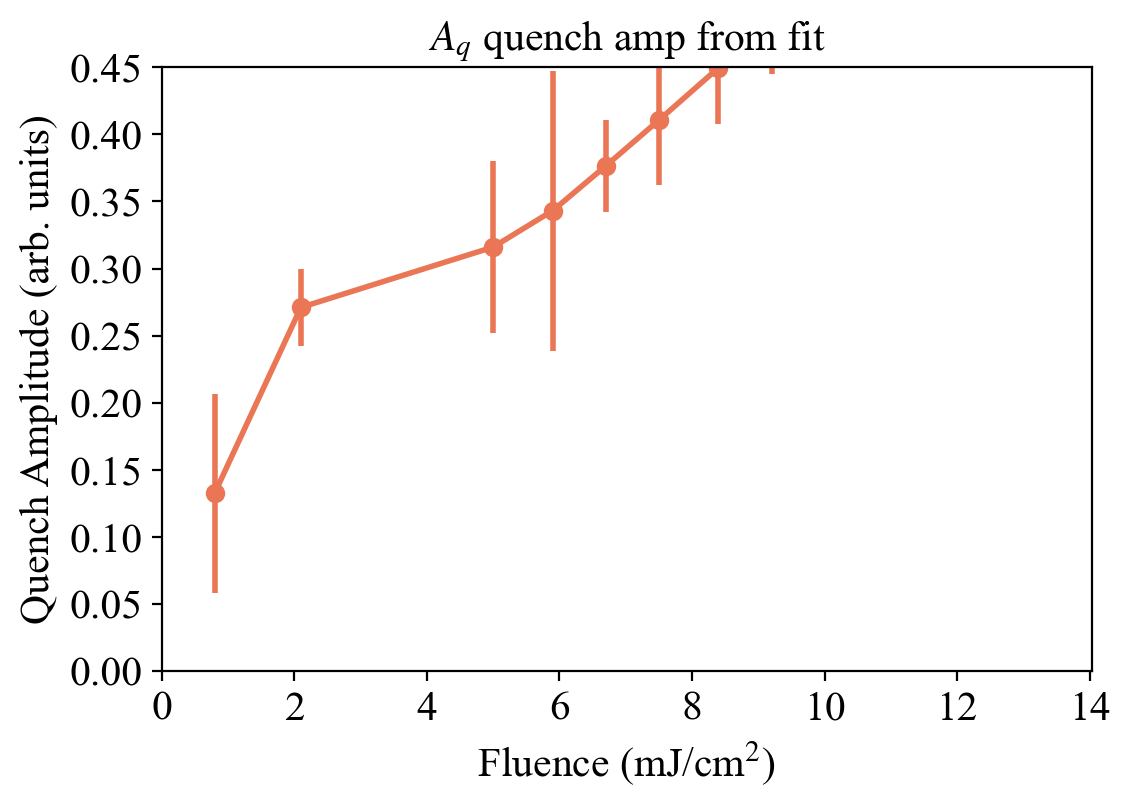

In [82]:
x = fluence_mj_cm
y_0_q = A_q_A0
y_error = dA_q_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.45])
plt.xlim(0,)
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Quench Amplitude (arb. units)',fontsize=15)

plt.title('$A_q$ quench amp from fit',fontsize=15)

plt.show()

# Fitting A_0

# Fitting in loop with Gaussian convaluation but fixed t_0

In [83]:
# def convolved_no_tr2(x, A, B, C, t0, tm, tr, sigma):
#     """
#     decay function (no tr2) convolved with Gaussian 
#     """
#     y = jumpdecay(x, A, B, C, t0, tm, tr)
#     result = vec_gaussian_convolution(x, y, sigma)
#     return result

In [84]:
# set the fit model 
model_gauss_no_tr2 = Model(RJ.convolved_no_tr2)
print('Gauss No tr2')
print('parameter names: {}'.format(model_gauss_no_tr2.param_names))
print('independent variables: {}'.format(model_gauss_no_tr2.independent_vars))

model_tr2 = Model(RJ.convolve_with_tr2)
print('With tr2')
print('parameter names: {}'.format(model_tr2.param_names))
print('independent variables: {}'.format(model_tr2.independent_vars))

model_binomial = Model(RJ.convolve_with_tr2_binomial)
print('With tr2 binomial')
print('parameter names: {}'.format(model_binomial.param_names))
print('independent variables: {}'.format(model_binomial.independent_vars))

Gauss No tr2
parameter names: ['A', 'B', 'C', 't0', 'tm', 'tr', 'sigma']
independent variables: ['x']
With tr2
parameter names: ['A', 'B', 'C', 't0', 'tm', 'tr', 'tr2', 'sigma']
independent variables: ['x']
With tr2 binomial
parameter names: ['A', 'B', 'C', 't0', 'tm', 'tr', 'tr2', 'sigma']
independent variables: ['x']


In [85]:
def full_fit(t, amp, noise, fit_func, algorithm, name_info, guess):
    if fit_func == 'Gauss No tr2':
        params_initial = model_gauss_no_tr2.make_params(A=guess[0], B=guess[1], C=guess[2], t0=guess[3], tm=guess[4], tr=guess[5], sigma=guess[6])
    # elif fit_func == 'with tr2 in sqrt':
    #     params_initial = model_tr2_noGauss.make_params(A=guess[0], B=guess[1], C=guess[2], t0=guess[3], tm=guess[4], tr=guess[5], tr2 = guess[6])
    # elif fit_func == 'with tr2 binomial':
    #     params_initial = model_binomial_noGauss.make_params(A=guess[0], B=guess[1], C=guess[2], t0=guess[3], tm=guess[4], tr=guess[5], tr2 = guess[6])
    params_initial['t0'].vary = True
    params_initial['A'].vary = True
    params_initial['B'].vary = True
    params_initial['C'].vary = True
    params_initial['tm'].vary = True
    params_initial['tr'].vary = True
    params_initial['sigma'].vary = False
    
    params_initial['A'].min = 0.00001
    params_initial['A'].max = 1.0

    params_initial['B'].min = 0.00001
    params_initial['B'].max = 1.0
    
    params_initial['C'].min = 0.9
    params_initial['C'].max = 1.1
    
    params_initial['t0'].min = -0.15
    params_initial['t0'].max = 0.15

    params_initial['tm'].min = 0.00001
    params_initial['tm'].max = 0.5

    params_initial['tr'].min = 0.1
    params_initial['tr'].max = 2.0
    
    params_initial['sigma'].min = 0.03
    params_initial['sigma'].max = 0.06
    
    result = model_gauss_no_tr2.fit(amp, params_initial, x=t, method=algorithm)

    print(result.fit_report())
    fit_error = np.std(result.residual)

    #filename = f'Time_constant_fit_results/fit_{fit_func}_{name_info}'
    # save fit report to a file:
    # with open(f'{filename}.txt', 'w') as fh:
    #     fh.write("True values\n")
    #     fh.write(f"{true}\n")
    #     fh.write(f'{result.fit_report()}\n')
    #     fh.write("Other values\n")
    #     fh.write('noise pre-pump = {:.3f}\n'.format(noise))
    #     fh.write('fit error = {:.3f}\n'.format(fit_error))
    return params_initial, result, fit_error

In [86]:
sigma_final = np.average(sigma_A0)

In [87]:
final_t_0 = t_0_A0
dfinal_t_0 = dt_0_A0

# Fitting A_0

## Fitting single scan to seed all other fits

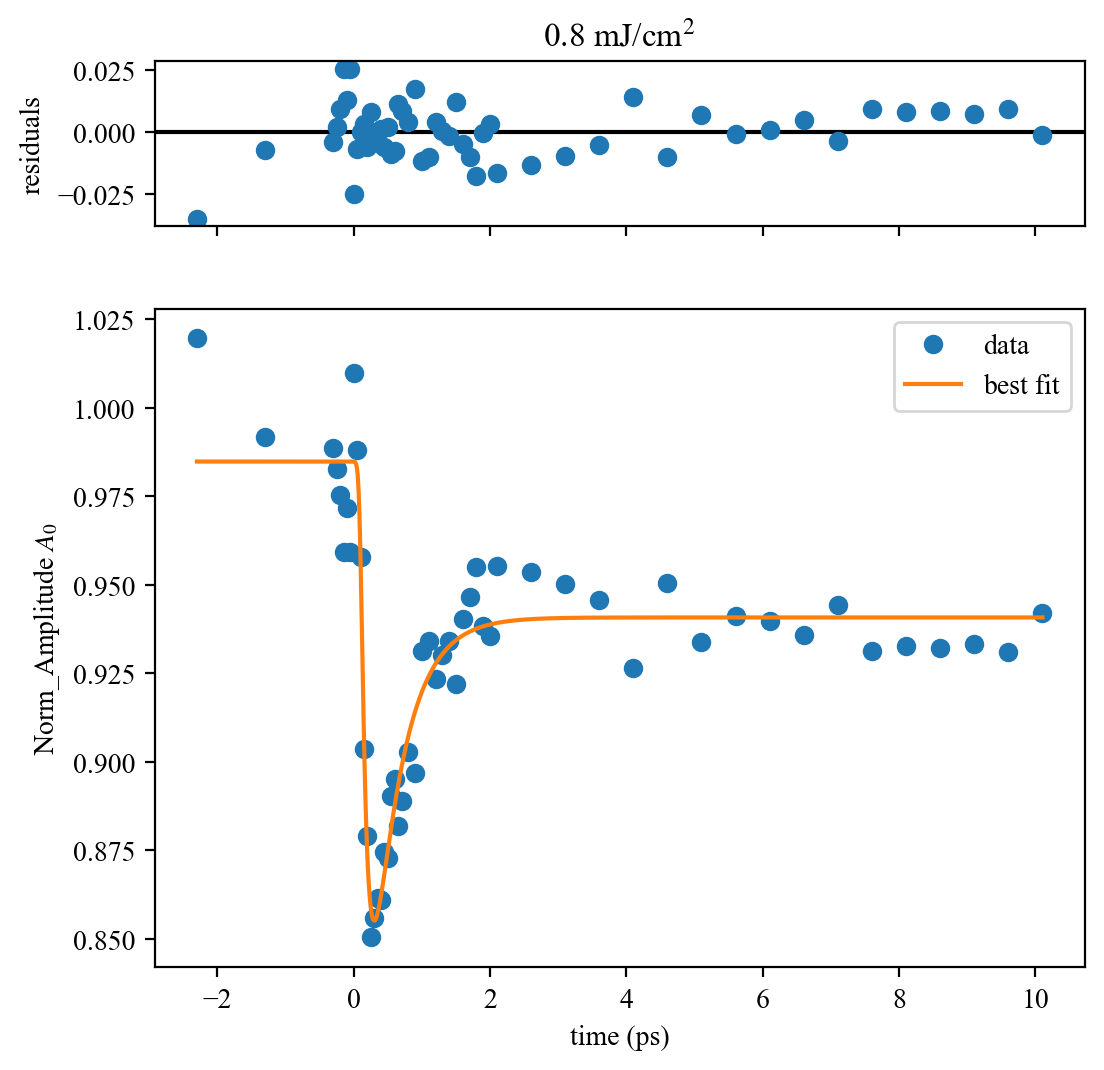

In [88]:
i = 0
fig_1 = (globals()['results_A0_%s' % i].plot(xlabel='time (ps)', ylabel='Norm_Amplitude $A_0$', numpoints = 1000, title=fluence_list[i]))
# plt.ylim(0.55,1.05)
# plt.xlim(-2.5, 10.5)
plt.show(fig_1)

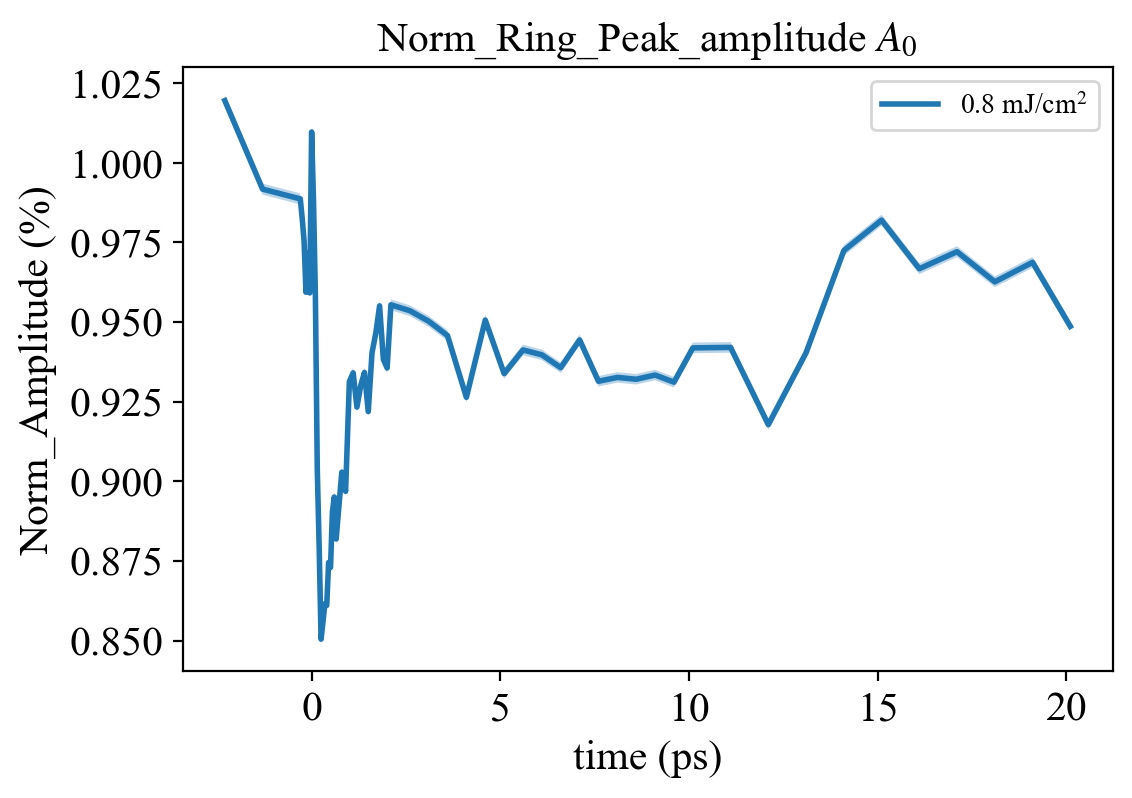

In [89]:
# Plotting Normalized Ring peak width Gamma_0
%matplotlib inline
plt.rcParams['figure.dpi']= 200
#index = 7
# for i in range (0, nb_file_BG):
#     plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3]/data_fit[i, 0, 3]*100, data_error[i, :, 3]/abs(data_fit[i, 0, 3])*100, linewidth=2, marker='o')
scans_to_plot2 = np.array([0])
for i in scans_to_plot2:
# for i in range (0, (nb_file_BG)):
#     if (i % 1) == 0:
        #plt.errorbar(data_fit[i, :, 0], data_fit[i, :, 3], data_error[i, :, 3], linewidth=2, marker='o')
        plot_errorbars(data_fit[i][ :, 0], data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))*1,\
                       data_error[i][ :, index]/abs(np.average(data_fit[i][ 0:3, index]))*1, linewidth=2, label = fluence_list[i])
        #plot_errorbars(data_fit[i, :, 0], data_fit[i, :, 3]-data_fit[i, 0, 3], data_error[i, :, 3], linewidth=2)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('time (ps)',fontsize=15)

plt.ylabel('Norm_Amplitude (%)',fontsize=15)

#plt.legend(['6 uJ', '7 uJ', '8 uJ', '9 uJ','10 uJ', '11 uJ', '12 uJ', '13 uJ', '14 uJ', '15 uJ','16 uJ'])

#plt.legend(['6 uJ', '8 uJ', '10 uJ', '12 uJ', '14 uJ','16 uJ'])
#plt.xlim(-2.5, 10)
plt.legend()

plt.title('Norm_Ring_Peak_amplitude $A_0$',fontsize=15)
plt.show()

In [90]:
t = data_fit[i][ :, 0]
amp = data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))
noise = abs(np.std(data_fit[i][ 0:3, index]))

#guess = [results_A0_12.values['A'], results_A0_12.values['B'], results_A0_12.values['C'], results_A0_12.values['t0'], results_A0_12.values['tm'], results_A0_12.values['tr'], sigma_final]

guess = [globals()['results_A0_%s' % i].values['A'], globals()['results_A0_%s' % i].values['B'], globals()['results_A0_%s' % i].values['C'],\
         globals()['results_A0_%s' % i].values['t0'], globals()['results_A0_%s' % i].values['tm'], globals()['results_A0_%s' % i].values['tr'], sigma_final]

algorithm = 'least_squares'
name_info = 'noise_' + str(noise) + '_all_fixed' #+ '_boundaries' #
fit_func = 'Gauss No tr2' #'No tr2' or 'with tr2 in sqrt' or 'with tr2 binomial'

params_initial, result, fit_error = full_fit(t[t<10.5], amp[t<10.5], noise, fit_func, algorithm, name_info, guess)

[[Model]]
    Model(convolved_no_tr2)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 24
    # data points      = 53
    # variables        = 6
    chi-square         = 0.00657395
    reduced chi-square = 1.3987e-04
    Akaike info crit   = -464.731452
    Bayesian info crit = -452.909700
[[Variables]]
    A:      0.20140234 +/- 0.04088896 (20.30%) (init = 0.22393)
    B:      0.15768322 +/- 0.03936322 (24.96%) (init = 0.1799142)
    C:      0.98464459 +/- 0.00388463 (0.39%) (init = 0.984799)
    t0:     0.10006922 +/- 0.01742434 (17.41%) (init = 0.08987279)
    tm:     0.06858603 +/- 0.02990217 (43.60%) (init = 0.09217976)
    tr:     0.44983776 +/- 0.09851483 (21.90%) (init = 0.4231945)
    sigma:  0.04614828 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)   = 0.994
    C(A, tr)  = -0.904
    C(B, tm)  = 0.899
    C(B, tr)  = -0.896
    C(A, tm)  = 0.896
    C(t0, tm) = -0.782
    C(tm, tr) = -0.706
    C(A, t0)  = -0.590


In [91]:
result

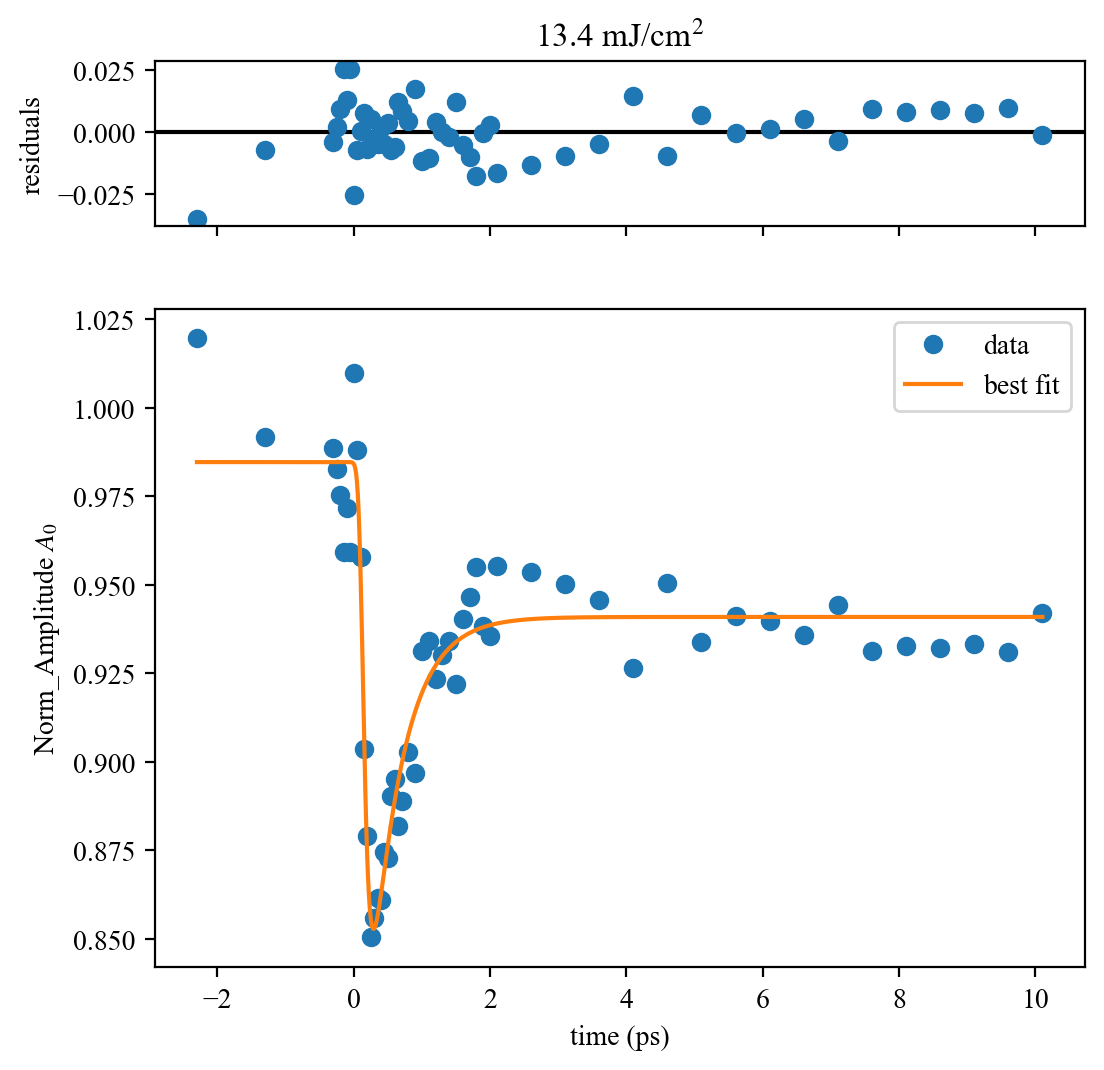

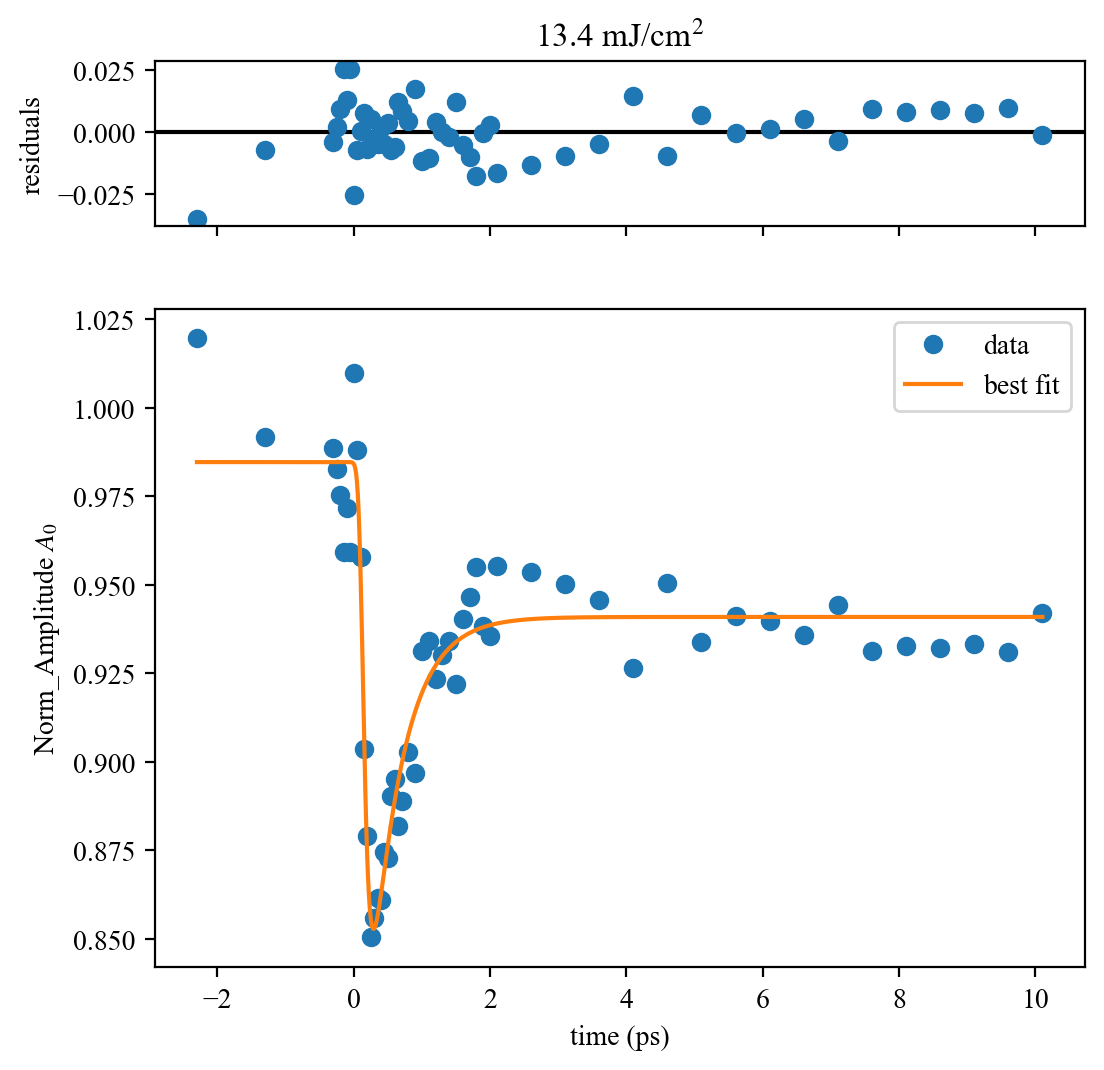

In [92]:
result.plot(xlabel='time (ps)', ylabel='Norm_Amplitude $A_0$', numpoints = 1000, title=fluence_list[12])

## Fitting in a loop final time!

In [93]:
#index = 7
savedir = 'Time_constant_fit_results/Fit_results_1/'
for i in range (0, (nb_file_BG)):
    if i == 0:
        
        # Creating empty np array to store the fit parameters
        A_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # A
        B_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # B
        C_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # C
        
        t_0_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # t_0
        A_1_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # A_1
        A_2_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # A_2
        t_m_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # tm
        t_r_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # tr
        A_q_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # Real quench A_q
        t_min_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # Real quench time t_min
        sigma_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # Sigma
        
        # Creating empty np array for errors
        dA_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA
        dB_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dB
        dC_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dC
        dt_0_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_0
        dt_m_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_m
        dt_r_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_r
        dA_1_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA_1
        dA_2_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA_2
        dt_min_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dt_min
        dA_q_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dA_q
        dsigma_A0 = np.empty((np.shape(fluence_mj_cm)), dtype = np.float32) # dSigma
        
        lmfit_results_A0 = []
    
    t = data_fit[i][ :, 0]
    amp = data_fit[i][ :, index]/(np.average(data_fit[i][ 0:3, index]))
    noise = abs(np.average(data_fit[i][ 0:3, index]))
    
    guess = [globals()['results_A0_%s' % i].values['A'], globals()['results_A0_%s' % i].values['B'], globals()['results_A0_%s' % i].values['C'],\
             globals()['results_A0_%s' % i].values['t0'], globals()['results_A0_%s' % i].values['tm'], globals()['results_A0_%s' % i].values['tr'], sigma_final]
    
    # guess = [globals()['results_%s' % i].values['A'], globals()['results_%s' % i].values['B'], globals()['results_%s' % i].values['C'],\
    #          globals()['results_%s' % i].values['t0'], globals()['results_%s' % i].values['tm'], globals()['results_%s' % i].values['tr'], 0.05]
    
    algorithm = 'least_squares'
    name_info = 'noise_' + str(noise) + '_all_fixed' #+ '_boundaries' #
    fit_func = 'Gauss No tr2' #'No tr2' or 'with tr2 in sqrt' or 'with tr2 binomial'

    params_initial, result, fit_error = full_fit(t[t<10.5], amp[t<10.5], noise, fit_func, algorithm, name_info, guess)
    
    #calculating things for plots
    A_A0[i] = result.values['A'] # A
    B_A0[i] = result.values['B'] # B
    C_A0[i] = result.values['C'] # C
    
    t_0_A0[i] = result.values['t0']
    A_1_A0[i] = result.values['A'] - result.values['B']*(result.values['tm']/result.values['tr'])
    A_2_A0[i] = result.values['A'] - result.values['B']
    t_m_A0[i] = result.values['tm']
    t_r_A0[i] = result.values['tr']
    # real_quench_amp_A0[i] = result.values['A']*(1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr']-result.values['tm'])))\
    # - result.values['B']*(1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr']-result.values['tm'])))
    
    t_min_A0[i] = result.values['t0'] - ((result.values['tm']*result.values['tr'])/(result.values['tr']-result.values['tm']))\
    *(math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))
    
    A_q_A0[i] = 1 - (result.values['C'] + result.values['A']*math.exp(-(t_min_A0[i]-result.values['t0'])/result.values['tm'])\
    - result.values['B']*math.exp(-(t_min_A0[i]-result.values['t0'])/result.values['tr']) + result.values['B'] - result.values['A'])/result.values['C']
    
    sigma_A0[i] = result.values['sigma'] #sigma
    
    dA_A0[i] = result.params['A'].stderr # dA
    dB_A0[i] = result.params['B'].stderr # dB
    dC_A0[i] = result.params['C'].stderr # dC
    dt_0_A0[i] = result.params['t0'].stderr # dt_0
    dt_m_A0[i] = result.params['tm'].stderr # dt_m
    dt_r_A0[i] = result.params['tr'].stderr # dt_r
    
    dA_1_A0[i] = math.sqrt(dA_A0[i]**2 + (dB_A0[i]*result.values['tm']/result.values['tr'])**2 + (dt_m_A0[i]*result.values['B']/result.values['tr'])**2\
                        + (dt_r_A0[i]*result.values['B']*result.values['tm']/(result.values['tr'])**2)**2) # dA_1
    dA_2_A0[i] = math.sqrt(dA_A0[i]**2 + dB_A0[i]**2) # dA_2
    
    
    dt_min_dA = (dA_A0[i]*result.values['tm']*result.values['tr'])/(result.values['A']*(result.values['tr']-result.values['tm']))
    dt_min_dB = (dB_A0[i]*result.values['tm']*result.values['tr'])/(result.values['B']*(result.values['tr']-result.values['tm']))
    
    dt_min_dtm = result.values['tr']/(result.values['tr']-result.values['tm'])*(1 + (result.values['tr']/(result.values['tr']-result.values['tm']))\
                                                                                *math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))*dt_m_A0[i]
    
    dt_min_dtr = result.values['tm']/(result.values['tr']-result.values['tm'])*(1 + (result.values['tm']/(result.values['tr']-result.values['tm']))\
                                                                                *math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))*dt_r_A0[i]
    
    # dt_min
    dt_min_A0[i] = math.sqrt(dt_0_A0[i]**2 + dt_min_dA**2 + dt_min_dtm**2 + dt_min_dtr**2) # dt_min
    
    dA_q_dA = (1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr']-result.values['tm'])))*dA_A0[i]
    
    dA_q_dB = (1-((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr']-result.values['tm'])))*dB_A0[i]
    
    dA_q_dtr = 1/(result.values['tr']*(result.values['tr'] - result.values['tm'])**2)*(result.values['A']*result.values['tr']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tm']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))\
                                                                                       - result.values['B']*result.values['tm']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tr']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))))*dt_r_A0[i]
    
    dA_q_dtm = 1/(result.values['tm']*(result.values['tr'] - result.values['tm'])**2)*(result.values['B']*result.values['tm']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tm']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tr']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr'])))\
                                                                                       - result.values['A']*result.values['tr']*((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))**(result.values['tr']/(result.values['tr'] - result.values['tm']))*(result.values['tr'] - result.values['tm'] + result.values['tm']*math.log((result.values['B']*result.values['tm'])/(result.values['A']*result.values['tr']))))*dt_m_A0[i]
    #dA_q
    dA_q_A0[i] = math.sqrt(dC_A0[i]**2 + dA_q_dA**2 + dA_q_dB**2 + dA_q_dtr**2 + dA_q_dtm**2) # dA_q
    
    #sigma error
    dsigma_A0[i] = result.params['sigma'].stderr # dsigma
    
    #saving model fits
    
    globals()['results_A0_%s' % i] = result
    #lmfit.model.save_modelresult(result, file_1)
    
    lmfit_results_A0.append(result)


[[Model]]
    Model(convolved_no_tr2)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 24
    # data points      = 53
    # variables        = 6
    chi-square         = 0.00657395
    reduced chi-square = 1.3987e-04
    Akaike info crit   = -464.731452
    Bayesian info crit = -452.909700
[[Variables]]
    A:      0.20140234 +/- 0.04088896 (20.30%) (init = 0.22393)
    B:      0.15768322 +/- 0.03936322 (24.96%) (init = 0.1799142)
    C:      0.98464459 +/- 0.00388463 (0.39%) (init = 0.984799)
    t0:     0.10006922 +/- 0.01742434 (17.41%) (init = 0.08987279)
    tm:     0.06858603 +/- 0.02990217 (43.60%) (init = 0.09217976)
    tr:     0.44983776 +/- 0.09851483 (21.90%) (init = 0.4231945)
    sigma:  0.04614828 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)   = 0.994
    C(A, tr)  = -0.904
    C(B, tm)  = 0.899
    C(B, tr)  = -0.896
    C(A, tm)  = 0.896
    C(t0, tm) = -0.782
    C(tm, tr) = -0.706
    C(A, t0)  = -0.590


In [94]:
# # Saving fit results
# file_1 = savedir + 'A_0_' + algorithm + '_' + 'lmfit_results' + '.pkl'
# df1 = pd.DataFrame(lmfit_results_A0)
# df1.to_pickle(file_1)

In [95]:
# Saving data
file_2 = savedir + 'A_0_' + algorithm + '_' + 'fluence_vs_params' + '.pkl'

fluence_vs_params_A0 = np.empty([nb_file_BG, 22], dtype = np.float32)

fluence_vs_params_A0[:, 0] = A_A0
fluence_vs_params_A0[:, 1] = dA_A0

fluence_vs_params_A0[:, 2] = B_A0
fluence_vs_params_A0[:, 3] = dB_A0

fluence_vs_params_A0[:, 4] = C_A0
fluence_vs_params_A0[:, 5] = dC_A0

fluence_vs_params_A0[:, 6] = t_0_A0
fluence_vs_params_A0[:, 7] = dt_0_A0

fluence_vs_params_A0[:, 8] = t_m_A0
fluence_vs_params_A0[:, 9] = dt_m_A0

fluence_vs_params_A0[:, 10] = t_r_A0
fluence_vs_params_A0[:, 11] = dt_r_A0

fluence_vs_params_A0[:, 12] = A_1_A0
fluence_vs_params_A0[:, 13] = dA_1_A0

fluence_vs_params_A0[:, 14] = A_2_A0
fluence_vs_params_A0[:, 15] = dA_2_A0

fluence_vs_params_A0[:, 16] = A_q_A0
fluence_vs_params_A0[:, 17] = dA_q_A0

fluence_vs_params_A0[:, 18] = t_min_A0
fluence_vs_params_A0[:, 19] = dt_min_A0

fluence_vs_params_A0[:, 20] = sigma_A0
fluence_vs_params_A0[:, 21] = dsigma_A0

column_labels = ['A', 'dA', 'B', 'dB', 'C', 'dC', 't_0', 'dt_0', 't_m', 'dt_m', 't_r', 'dt_r', 'A_1', 'dA_1', 'A_2', 'dA_2', 'A_q', 'dA_q', 't_min', 'dt_min', 'sigma', 'dsigma']

df2 = pd.DataFrame(fluence_vs_params_A0, columns=column_labels, index=fluence_list)
df2.to_pickle(file_2)

In [96]:
df2

A        dA         B        dB         C        dC  \
0.8 mJ/cm$^2$   0.201402  0.040889  0.157683  0.039363  0.984645  0.003885   
2.1 mJ/cm$^2$   0.351143  0.016028  0.274471  0.014969  0.993386  0.003019   
5.0 mJ/cm$^2$   0.455166  0.053874  0.388275  0.051496  1.000035  0.005089   
5.9 mJ/cm$^2$   0.588402  0.062200  0.529564  0.060554  1.002639  0.004297   
6.7 mJ/cm$^2$   0.533932  0.029808  0.485616  0.028451  1.002727  0.003245   
7.5 mJ/cm$^2$   0.644447  0.048269  0.585057  0.046925  1.003248  0.003427   
8.4 mJ/cm$^2$   0.707151  0.038089  0.631382  0.037017  0.996392  0.002655   
9.2 mJ/cm$^2$   0.694944  0.028283  0.619260  0.027097  0.999929  0.002813   
10.0 mJ/cm$^2$  0.776886  0.038861  0.652618  0.036711  0.997429  0.005636   
10.9 mJ/cm$^2$  0.818254  0.039529  0.675350  0.037120  0.999559  0.005020   
11.7 mJ/cm$^2$  0.762786  0.039224  0.678526  0.035529  1.001184  0.007439   
12.6 mJ/cm$^2$  0.833474  0.032926  0.765267  0.030199  1.005667  0.005329   
13.4 mJ/cm$^2$  0.806843  0.019039  0.698590  0.016967  1.000096  0.003538   

                     t_0      dt_0       t_m      dt_m  ...       A_1  \
0.8 mJ/cm$^2$   0.100069  0.017424  0.068586  0.029902  ...  0.177361   
2.1 mJ/cm$^2$   0.091583  0.005129  0.075859  0.010114  ...  0.323669   
5.0 mJ/cm$^2$  -0.043938  0.015857  0.115419  0.027699  ...  0.408306   
5.9 mJ/cm$^2$  -0.050035  0.004605  0.130485  0.016499  ...  0.490356   
6.7 mJ/cm$^2$  -0.049336  0.009598  0.104214  0.014230  ...  0.481843   
7.5 mJ/cm$^2$  -0.043496  0.007889  0.124027  0.015534  ...  0.555305   
8.4 mJ/cm$^2$  -0.044598  0.005631  0.129873  0.011371  ...  0.609152   
9.2 mJ/cm$^2$  -0.043353  0.005628  0.114004  0.009730  ...  0.620756   
10.0 mJ/cm$^2$ -0.054035  0.003563  0.123599  0.010810  ...  0.702067   
10.9 mJ/cm$^2$ -0.080630  0.005994  0.135987  0.012559  ...  0.739210   
11.7 mJ/cm$^2$ -0.059501  0.005885  0.114157  0.013144  ...  0.704416   
12.6 mJ/cm$^2$ -0.051167  0.003662  0.133516  0.009633  ...  0.754993   
13.4 mJ/cm$^2$ -0.034007  0.004475  0.119196  0.007644  ...  0.754552   

                    dA_1       A_2      dA_2       A_q      dA_q     t_min  \
0.8 mJ/cm$^2$   0.042959  0.043719  0.056757  0.136998  0.044553  0.272075   
2.1 mJ/cm$^2$   0.016607  0.076672  0.021931  0.264461  0.018055  0.306368   
5.0 mJ/cm$^2$   0.056076  0.066891  0.074527  0.316780  0.058538  0.254484   
5.9 mJ/cm$^2$   0.065352  0.058838  0.086808  0.345120  0.063865  0.236919   
6.7 mJ/cm$^2$   0.031036  0.048316  0.041207  0.375067  0.032787  0.222344   
7.5 mJ/cm$^2$   0.050586  0.059390  0.067319  0.405594  0.050842  0.245950   
8.4 mJ/cm$^2$   0.039896  0.075769  0.053114  0.448362  0.040055  0.259226   
9.2 mJ/cm$^2$   0.029432  0.075684  0.039169  0.477704  0.030553  0.246414   
10.0 mJ/cm$^2$  0.040114  0.124268  0.053459  0.552436  0.041673  0.272669   
10.9 mJ/cm$^2$  0.040879  0.142903  0.054226  0.580604  0.042544  0.279325   
11.7 mJ/cm$^2$  0.040290  0.084260  0.052923  0.570487  0.042901  0.261519   
12.6 mJ/cm$^2$  0.033936  0.068206  0.044678  0.589148  0.035315  0.300345   
13.4 mJ/cm$^2$  0.019523  0.108253  0.025502  0.626138  0.021110  0.318536   

                  dt_min     sigma  dsigma  
0.8 mJ/cm$^2$   0.059360  0.046148     0.0  
2.1 mJ/cm$^2$   0.021917  0.046148     0.0  
5.0 mJ/cm$^2$   0.057215  0.046148     0.0  
5.9 mJ/cm$^2$   0.031814  0.046148     0.0  
6.7 mJ/cm$^2$   0.028796  0.046148     0.0  
7.5 mJ/cm$^2$   0.028972  0.046148     0.0  
8.4 mJ/cm$^2$   0.021437  0.046148     0.0  
9.2 mJ/cm$^2$   0.019315  0.046148     0.0  
10.0 mJ/cm$^2$  0.023002  0.046148     0.0  
10.9 mJ/cm$^2$  0.026568  0.046148     0.0  
11.7 mJ/cm$^2$  0.028889  0.046148     0.0  
12.6 mJ/cm$^2$  0.020113  0.046148     0.0  
13.4 mJ/cm$^2$  0.017674  0.046148     0.0  

[13 rows x 22 columns]

# Plot all the data

## Saving fit figures and making a gif

In [97]:
# fig_name = []
# for i in range (0, (nb_file_BG)):
#     x = 'Norm_Amplitude_A_0_' + str(i)
#     fig_name.append(x)

In [98]:
# fig_save_dir = 'Time_constant_fit_results/'

# for i in range (0, (nb_file_BG)):
#     (globals()['results_A0_%s' % i].plot(xlabel='time (ps)', ylabel='Norm_Amplitude $A_0$', numpoints = 1000, title=fluence_list[i]))
#     plt.ylim(0.55,1.05)
#     plt.xlim(-2.5, 10.5)
#     plt.savefig(fig_save_dir+fig_name[i])
#     plt.clf()

In [105]:
# gif_save_dir = 'Time_constant_fit_results/'
# gif_name = 'A0.gif'
# RJ.gen_gif(fig_save_dir, gif_save_dir, gif_name, 3)

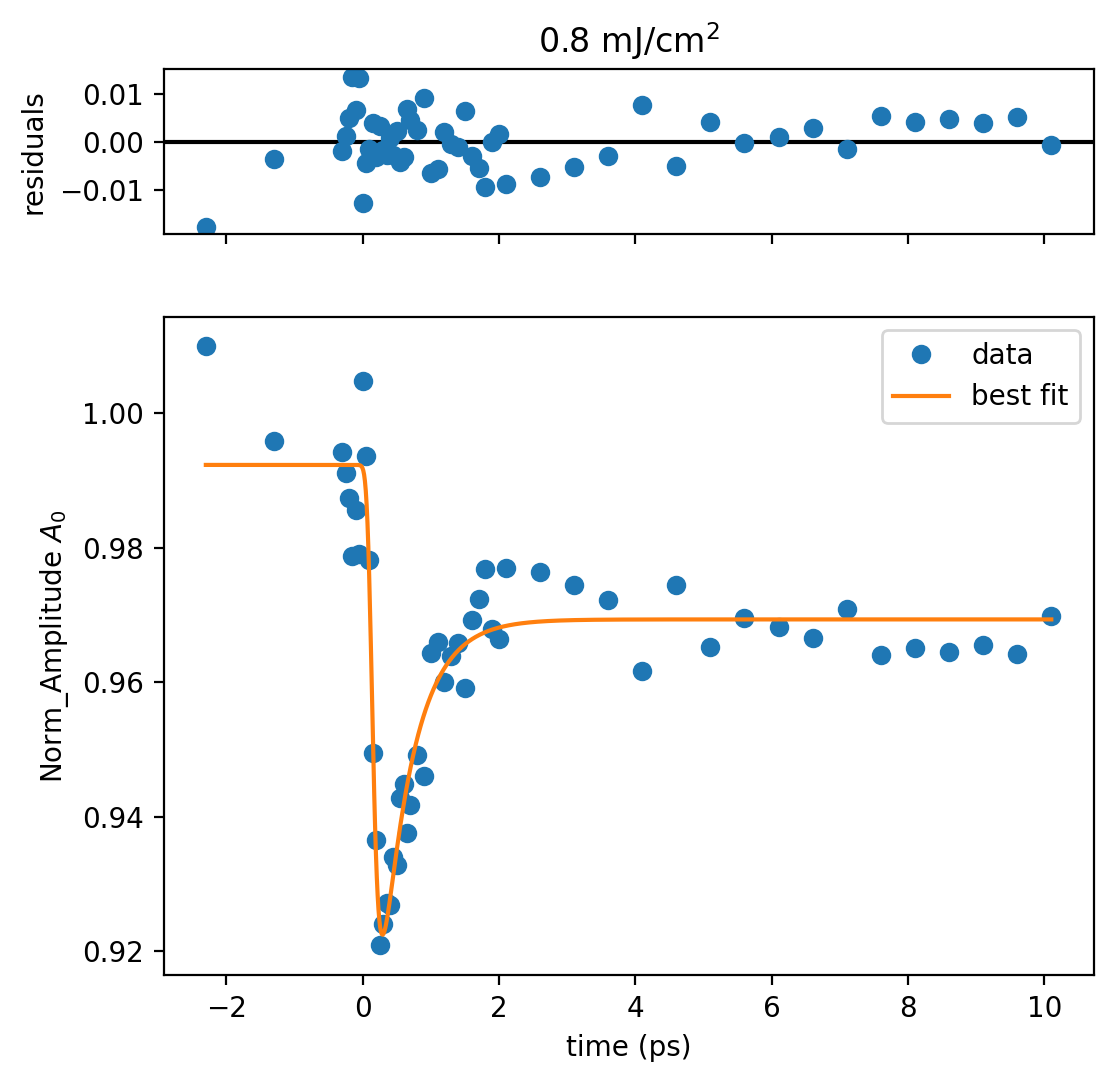

In [106]:
i = 0
fig_1 = (globals()['results_A0_%s' % i].plot(xlabel='time (ps)', ylabel='Norm_Amplitude $A_0$', numpoints = 1000, title=fluence_list[i]))
# plt.ylim(0.55,1.05)
# plt.xlim(-2.5, 10.5)
plt.show(fig_1)

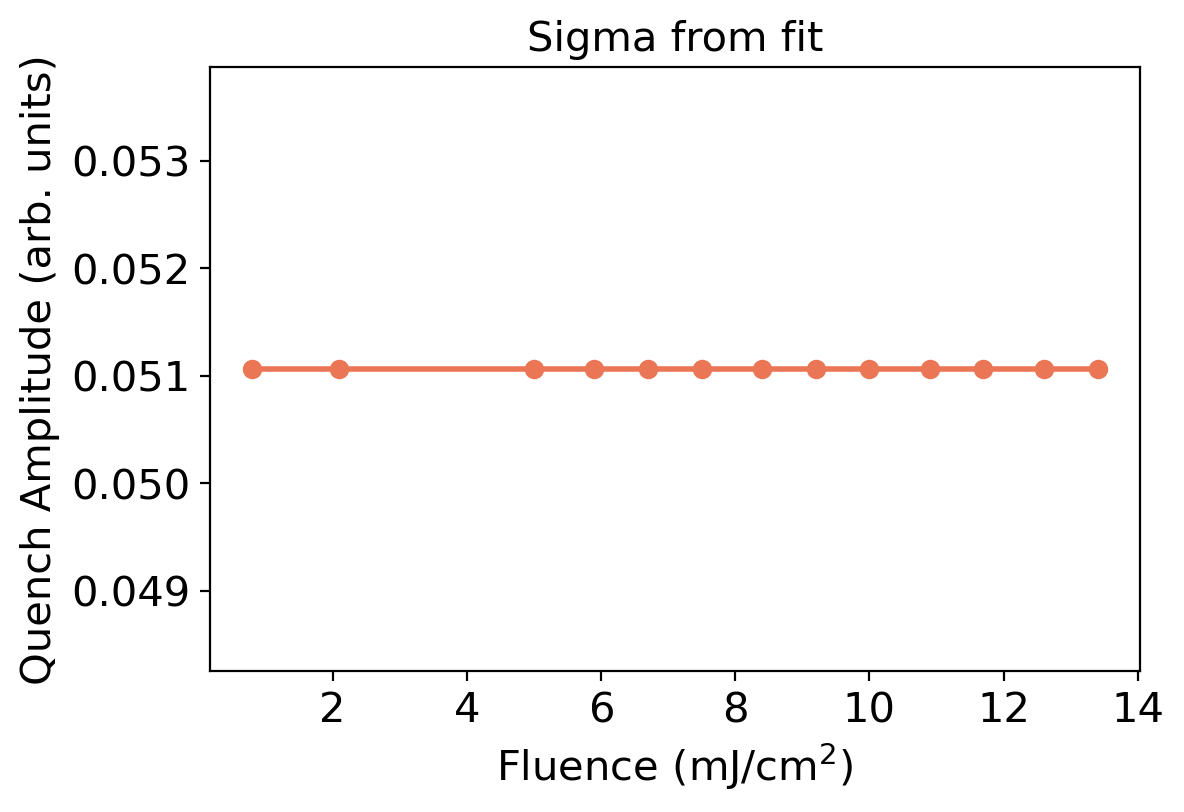

In [107]:
x = fluence_mj_cm
y_0_q = sigma_A0
y_error = dsigma_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 1])
#plt.legend(['-2.3 ps', '0.4 ps'])

plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.ylabel('Quench Amplitude (arb. units)',fontsize=15)

plt.title('Sigma from fit',fontsize=15)

plt.show()

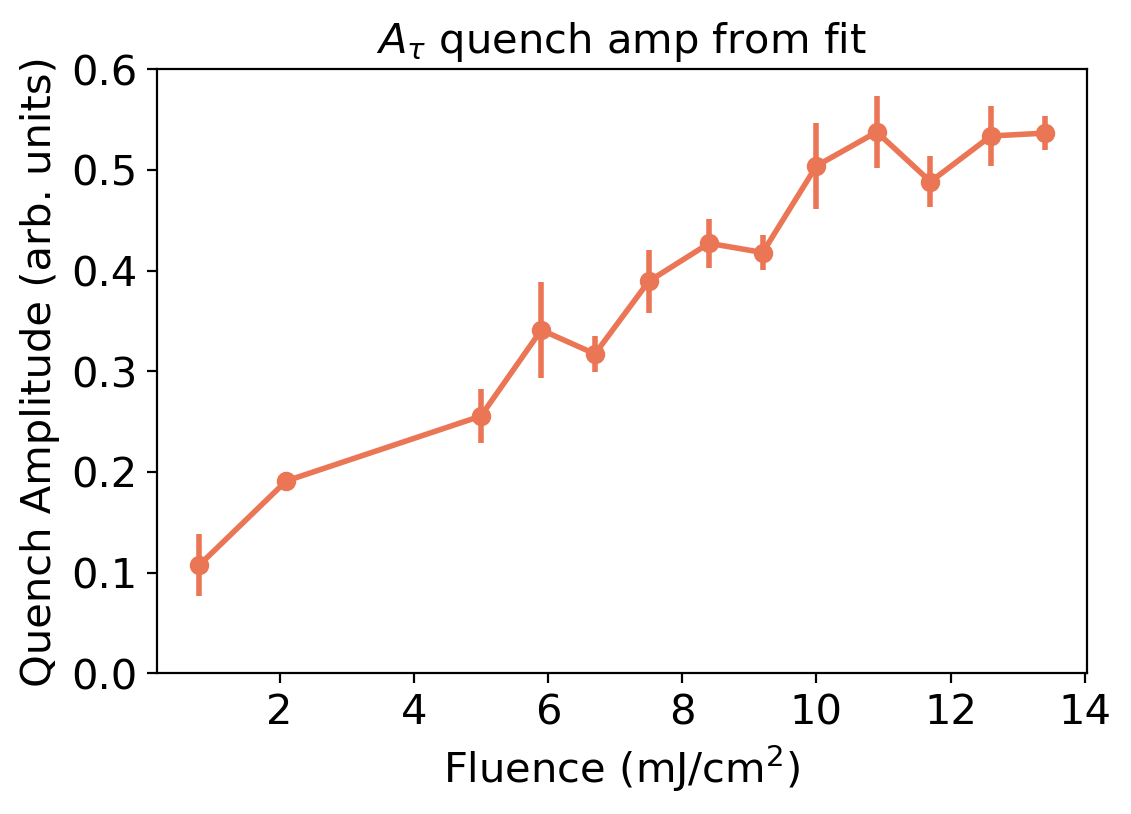

In [108]:
x = fluence_mj_cm
y_0_q = A_A0
y_error = dA_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.6])
#plt.legend(['-2.3 ps', '0.4 ps'])

plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.ylabel('Quench Amplitude (arb. units)',fontsize=15)

plt.title('$A_{\u03C4}$ quench amp from fit',fontsize=15)

plt.show()

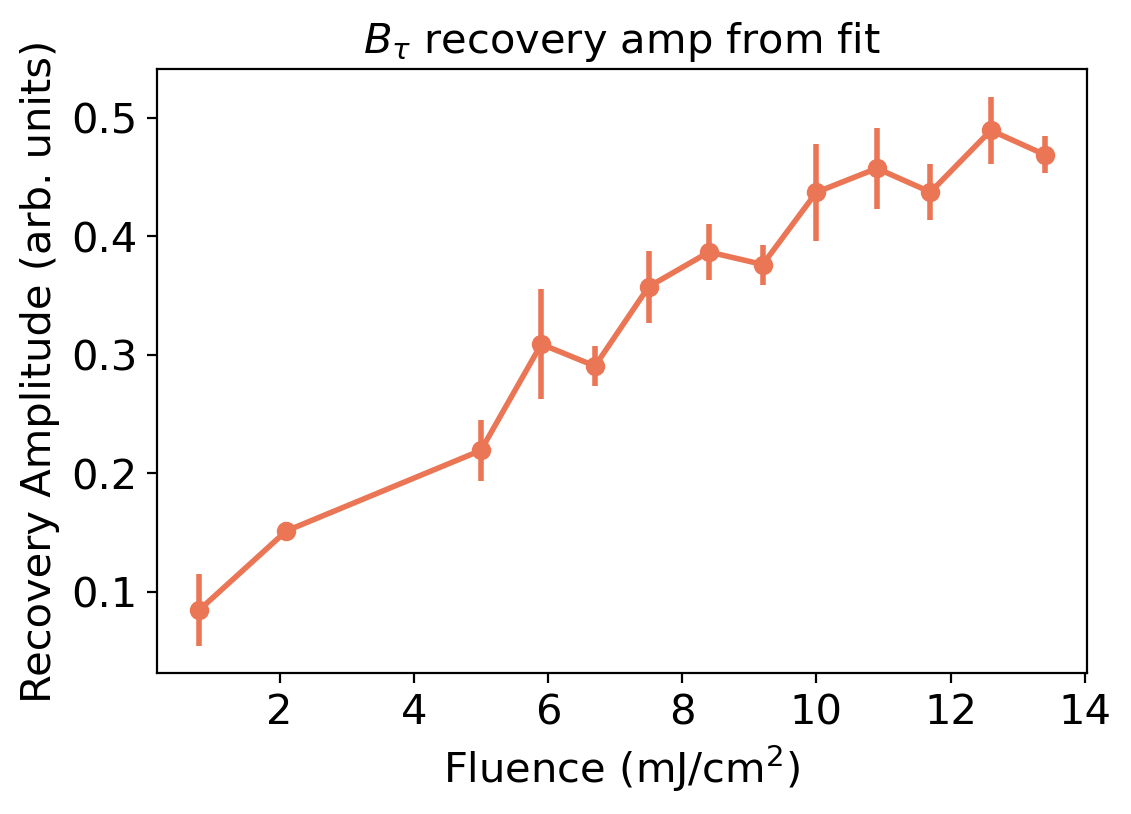

In [109]:
x = fluence_mj_cm
y_0_q = B_A0
y_error = dB_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 0.5])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Recovery Amplitude (arb. units)',fontsize=15)

plt.title('$B_{\u03C4}$ recovery amp from fit',fontsize=15)

plt.show()

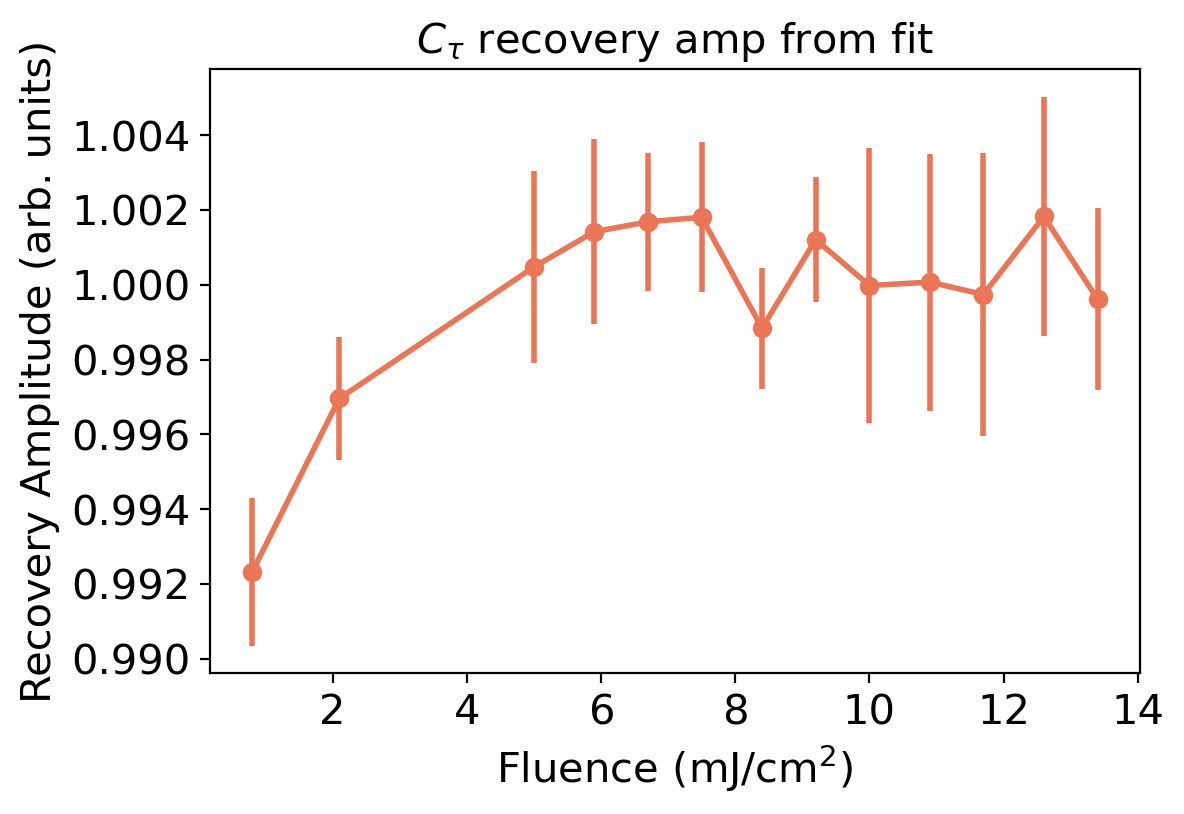

In [110]:
x = fluence_mj_cm
y_0_q = C_A0
y_error = dC_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 0.5])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Recovery Amplitude (arb. units)',fontsize=15)

plt.title('$C_{\u03C4}$ recovery amp from fit',fontsize=15)

plt.show()

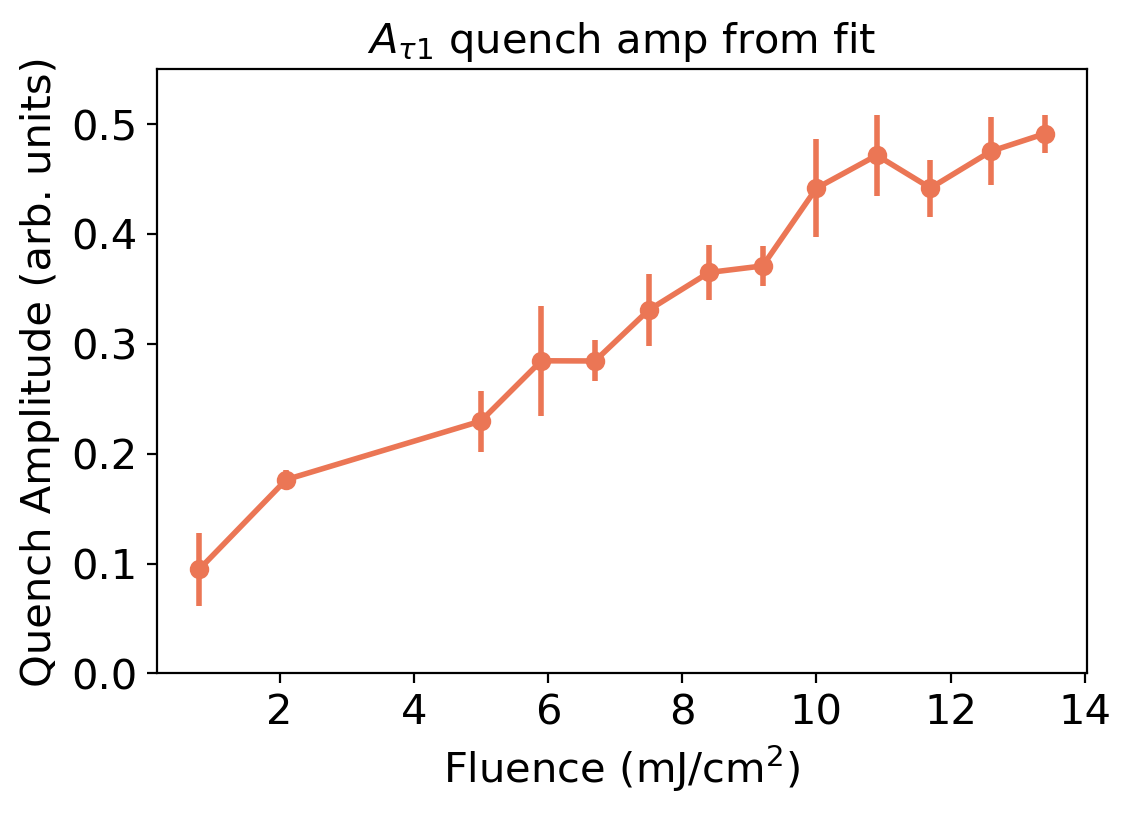

In [111]:
x = fluence_mj_cm
y_0_q = A_1_A0
y_error = dA_1_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.55])
#plt.legend(['-2.3 ps', '0.4 ps'])

plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.ylabel('Quench Amplitude (arb. units)',fontsize=15)

plt.title('$A_{\u03C41}$ quench amp from fit',fontsize=15)

plt.show()

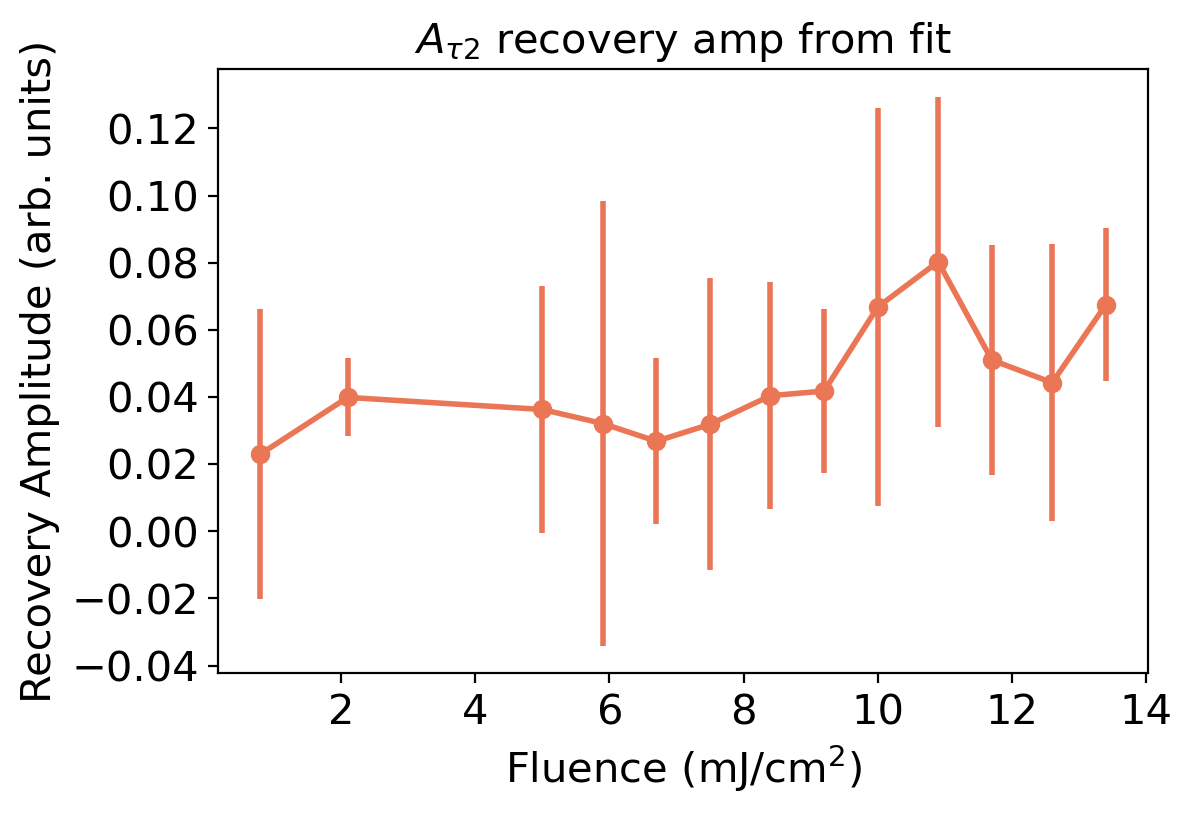

In [112]:
x = fluence_mj_cm
y_0_q = A_2_A0
y_error = dA_2_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 0.5])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Recovery Amplitude (arb. units)',fontsize=15)

plt.title('$A_{\u03C42}$ recovery amp from fit',fontsize=15)

plt.show()

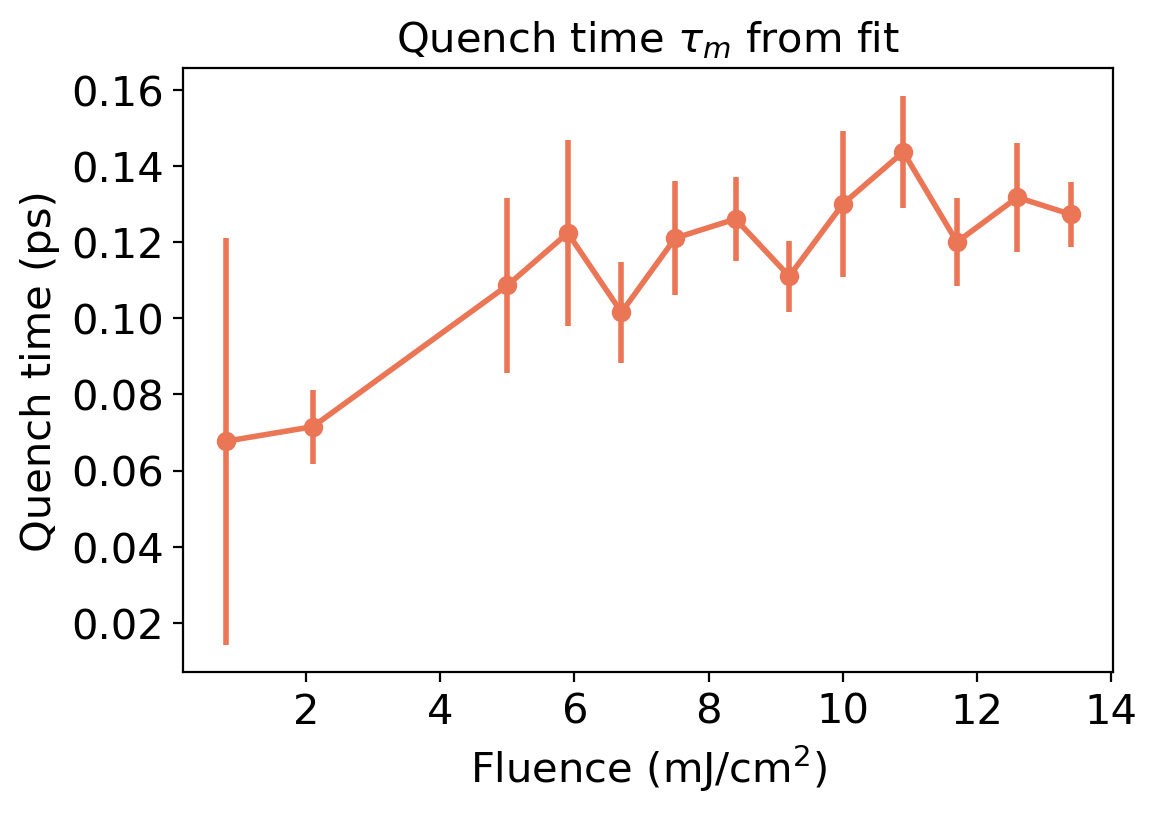

In [113]:
x = fluence_mj_cm
y_0_q = t_m_A0
y_error = dt_m_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 0.4])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Quench time (ps)',fontsize=15)

plt.title('Quench time $\u03C4_m$ from fit',fontsize=15)

plt.show()

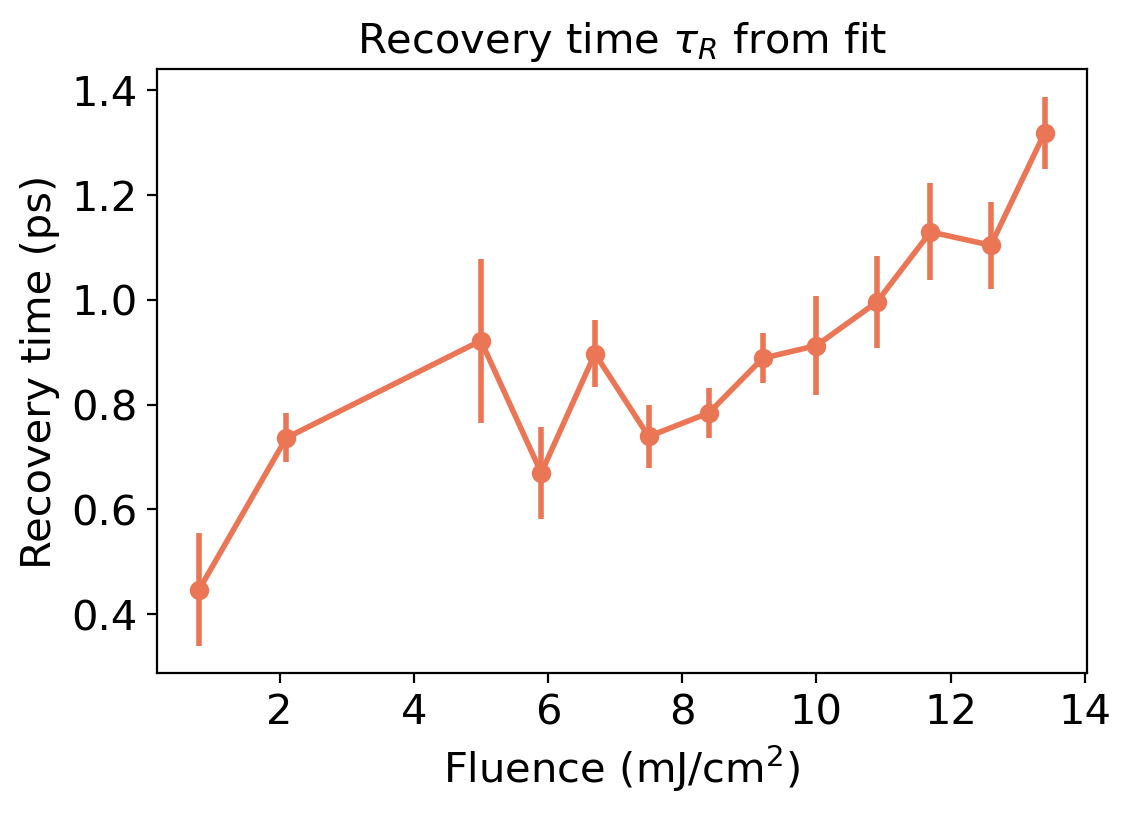

In [114]:
x = fluence_mj_cm
y_0_q = t_r_A0
y_error = dt_r_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim([0, 2.5])
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Recovery time (ps)',fontsize=15)

plt.title('Recovery time $\u03C4_R$ from fit',fontsize=15)

plt.show()

In [120]:
#np.save('t0_from_A0',y_0_q)

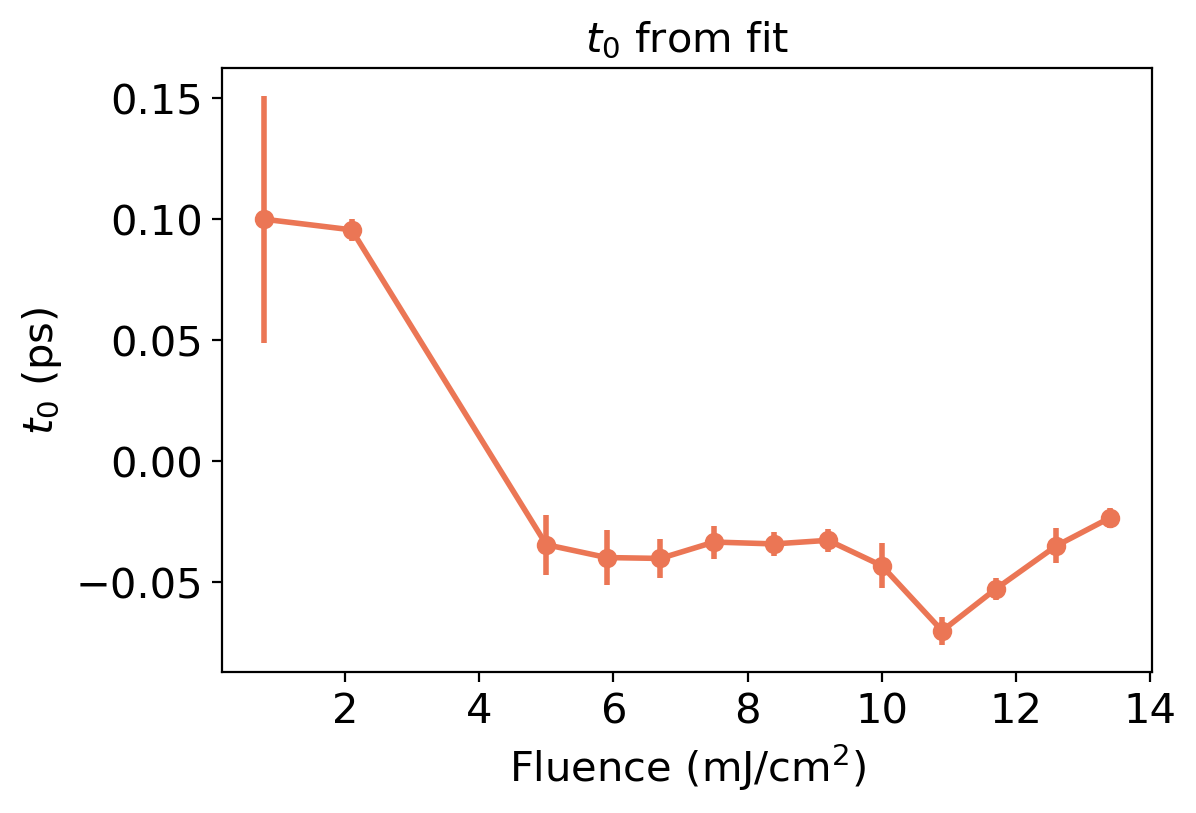

In [115]:
x = fluence_mj_cm
y_0_q = t_0_A0
y_error = dt_0_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('$t_0$ (ps)',fontsize=15)

plt.title('$t_0$ from fit',fontsize=15)

plt.show()

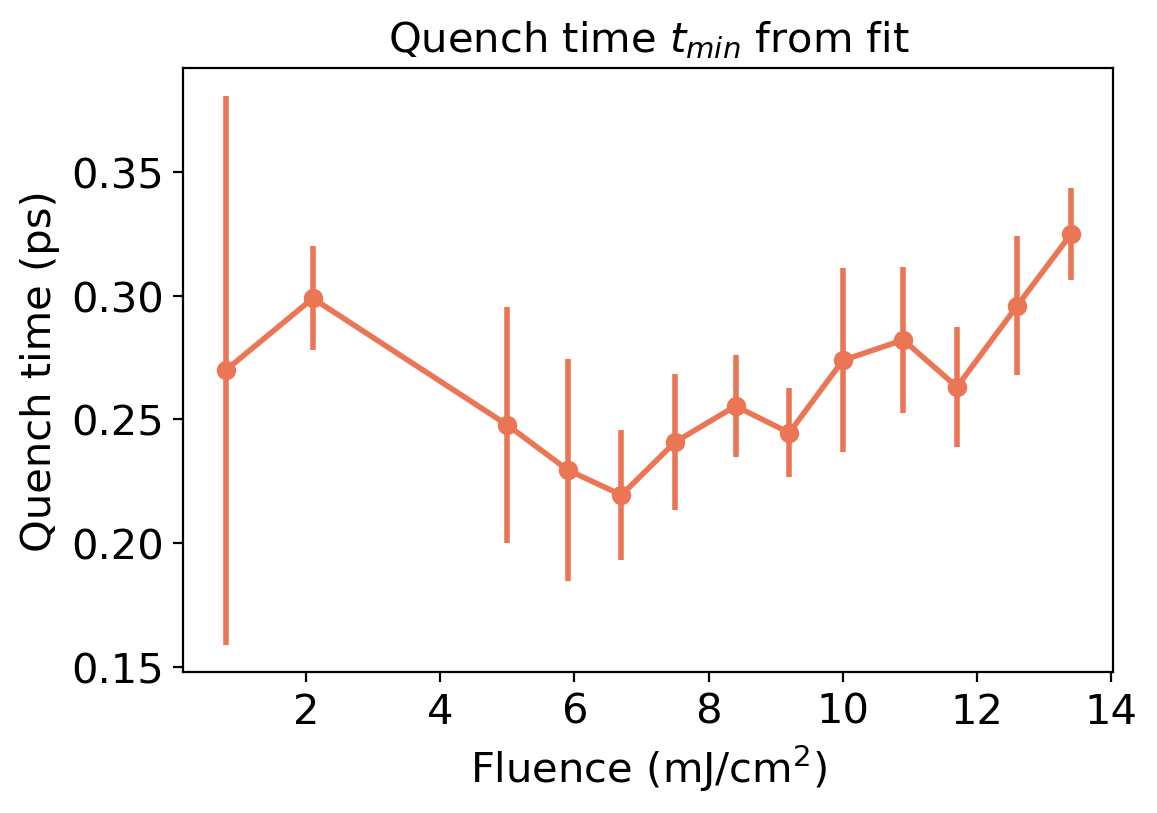

In [116]:
x = fluence_mj_cm
y_0_q = t_min_A0
y_error = dt_min_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.legend(['-2.3 ps', '0.4 ps'])
#plt.ylim([0, 0.5])
#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Quench time (ps)',fontsize=15)

plt.title('Quench time $t_{min}$ from fit',fontsize=15)

plt.show()

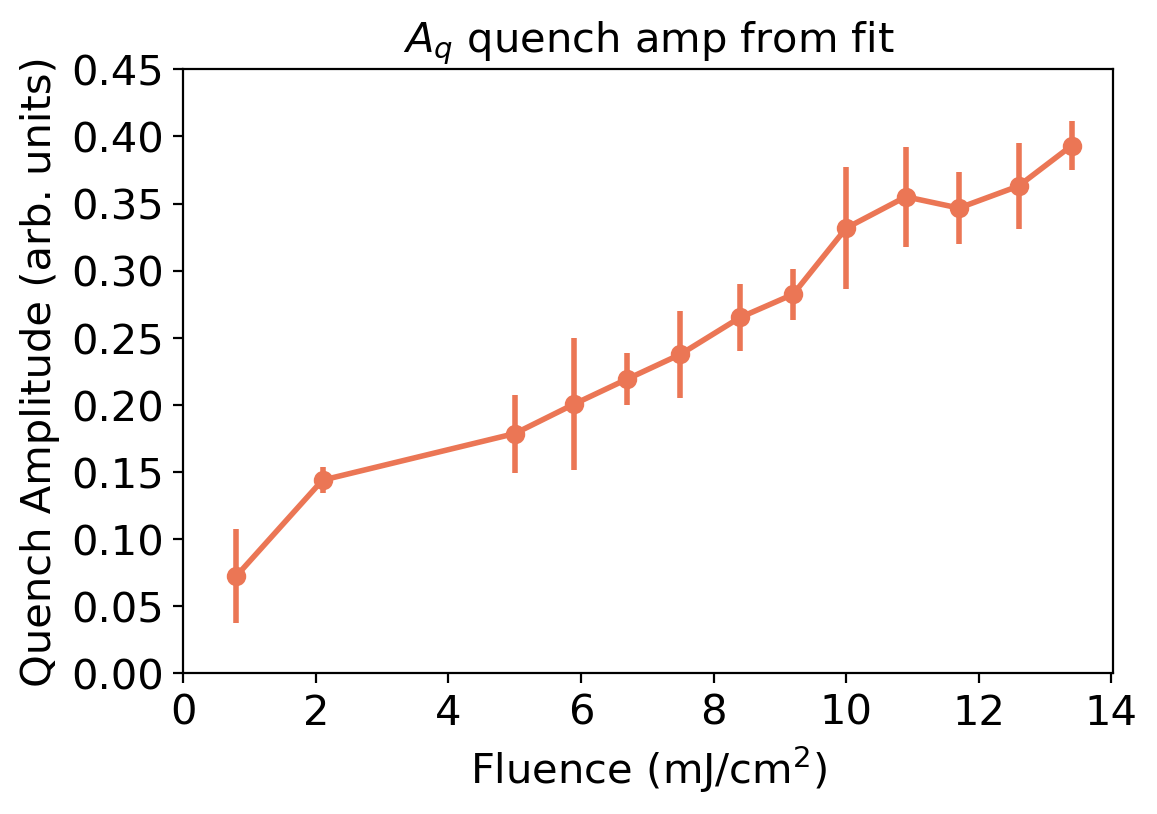

In [117]:
x = fluence_mj_cm
y_0_q = A_q_A0
y_error = dA_q_A0

cmap = plt.get_cmap('plasma')
counter1 = 3.5+7
color = cmap(float(counter1)/8/2)

plt.errorbar(x, y_0_q, yerr = y_error,linewidth=2,color = color, ecolor = color, marker = 'o')
plt.xlabel('Fluence (mJ/cm$^2$)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 0.45])
plt.xlim(0,)
#plt.legend(['-2.3 ps', '0.4 ps'])

#plt.xlabel('Fluence (uJ)',fontsize=15)

plt.ylabel('Quench Amplitude (arb. units)',fontsize=15)

plt.title('$A_q$ quench amp from fit',fontsize=15)

plt.show()

# End